In [150]:
#Locate the data, prepare for import of the MPT file
#Import necessary packaging
from utils.tools import *
import statistics as stat
path=r"C:\Users\cjang\Desktop\impedance_data\data\\"
data = ['DE_40_8_60.mpt']
ex_mpt = mpt_data(path,data)

In [151]:
import sys

def guesser(ex_mpt, Rs_guess = 1, R_guess = 1, n_guess = 0.8, fs_guess = 1, R2_guess = 1, n2_guess = 0.8, fs2_guess = 0.2):
    
    params = Parameters()
    guess_package = [Rs_guess, R_guess, n_guess, fs_guess, R2_guess, n2_guess, fs2_guess]
    #adding to the parameters package to send to the fitting function
    params.add('Rs', value=guess_package[0], min=guess_package[0]*.01, max=10**6)
    params.add('R', value=guess_package[1], min=guess_package[1]*.1, max=10**6)
    params.add('n', value=guess_package[2], min=.65, max=1)
    params.add('fs', value=guess_package[3], min=10**0.5, max=10**6)
    params.add('R2', value=guess_package[4], min=guess_package[4]*.1, max=10**6)
    params.add('n2', value=guess_package[5], min=.65, max=1)
    params.add('fs2', value=guess_package[6], min=10**-2, max=10**6)
    ex_mpt.mpt_fit(params, circuit = 'R-RQ-RQ')

    counter = 0

    
    
    
    while ex_mpt.low_error >= 100 and counter <= 100:
        
        try:
            counter += 1
            print('ITERATION NO. : ', counter)
            Rs_guess = ex_mpt.fit_Rs[0]

            R_guess = ex_mpt.fit_R[0]
            n_guess = ex_mpt.fit_n[0]
            fs_guess = ex_mpt.fit_fs[0]

            R2_guess = ex_mpt.fit_R2[0]
            n2_guess = ex_mpt.fit_n2[0]
            fs2_guess = ex_mpt.fit_fs2[0]

            guess_package = [Rs_guess, R_guess, n_guess, fs_guess, R2_guess, n2_guess, fs2_guess]
            #adding to the parameters package to send to the fitting function
            params = Parameters()
            params.add('Rs', value=guess_package[0], min=guess_package[0]*.01, max=guess_package[0]*100)
            params.add('R', value=guess_package[1], min=guess_package[1]*.1, max=guess_package[1]*10)
            params.add('n', value=guess_package[2], min=.65, max=1)
            params.add('fs', value=guess_package[3], min=10**0.5, max=10**6)
            params.add('R2', value=guess_package[4], min=guess_package[4]*.1, max=guess_package[4]*10)
            params.add('n2', value=guess_package[5], min=.65, max=1)
            params.add('fs2', value=guess_package[6], min=10**-2, max=10**1)
            ex_mpt.mpt_fit(params, circuit = 'R-RQ-RQ')

       
        except KeyboardInterrupt:
            print('Interrupted!!')
            print([ex_mpt.fit_Rs[0],ex_mpt.fit_R[0],ex_mpt.fit_n[0],ex_mpt.fit_Q[0],ex_mpt.fit_R2[0],ex_mpt.fit_n2[0],ex_mpt.fit_Q2[0]])
            
    ex_mpt.set_new_gph_dims(50,50)
    ex_mpt.mpt_plot(fitting = 'on')

No handles with labels found to put in legend.


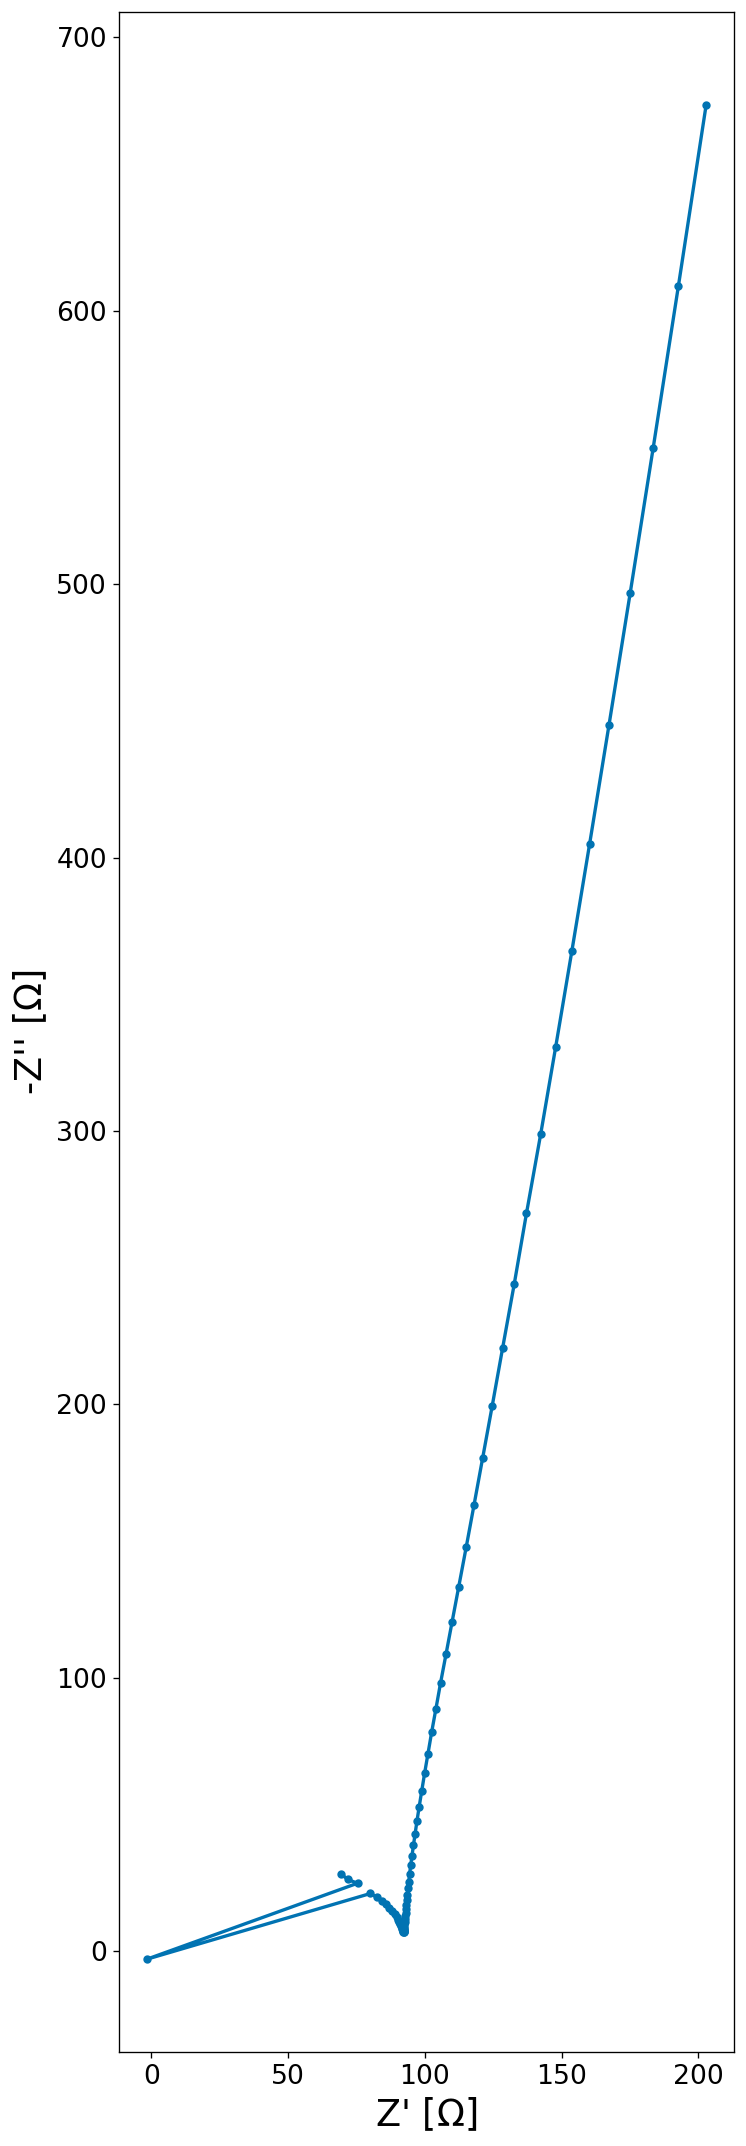

In [152]:
ex_mpt.set_new_gph_dims(50,50)
ex_mpt.mpt_plot()

In [187]:
skeleton = ex_mpt.df_raw.iloc[:,0:3]
re_mid, im_mid  = mean(skeleton['re']), mean(skeleton['im'])
a = skeleton[abs(skeleton['re']) <= re_mid]
b = skeleton[abs(skeleton['im']) <= im_mid]
c = pd.concat([a, b]).drop_duplicates()
for cols in c.columns.tolist()[1:]:
    c = c.ix[c[cols] > 20]
c

C:\Users\cjang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  import sys


,f,re,im
0,1.000019e+06,69.284988,28.320457
1,8.912467e+05,71.847214,26.239342
2,7.943327e+05,75.400620,24.872469
4,6.309568e+05,80.120186,21.121939
38,1.259093e+04,93.575752,20.729933
39,1.121771e+04,93.844681,22.975832
40,1.000223e+04,94.123863,25.468088
41,8.914930e+03,94.435959,28.251524
42,7.943998e+03,94.827850,31.360994
43,7.082233e+03,95.293663,34.816490


In [192]:
def masker(ex_mpt, num_bins = 5):
    
    skeleton = ex_mpt.df_raw.iloc[:,0:3]
    re_mid, im_mid  = mean(skeleton['re']), mean(skeleton['im'])
    a = skeleton[abs(skeleton['re']) <= re_mid * 1.25]
    b = skeleton[abs(skeleton['im']) <= im_mid * 1.25]
    c = pd.concat([a, b]).drop_duplicates()
    for cols in c.columns.tolist()[1:]:
        c = c.ix[c[cols] > 0]

    res = []
    ims = []
    
    for i in pd.cut(c['re'], num_bins):
        res.append(i)
    for i in pd.cut(c['im'], num_bins):
        ims.append(i)

    d = c[(c['re'] >=stat.mode(res).left) & (c['re'] <= stat.mode(res).right)]
    f = d[(d['im'] >=stat.mode(ims).left) & (d['im'] <= stat.mode(ims).right)]
    return [max(f['f']), min(f['f'])]

In [201]:
masker(ex_mpt, 2)

C:\Users\cjang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


[1000018.6, 4466.4292]

C:\Users\cjang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
No handles with labels found to put in legend.


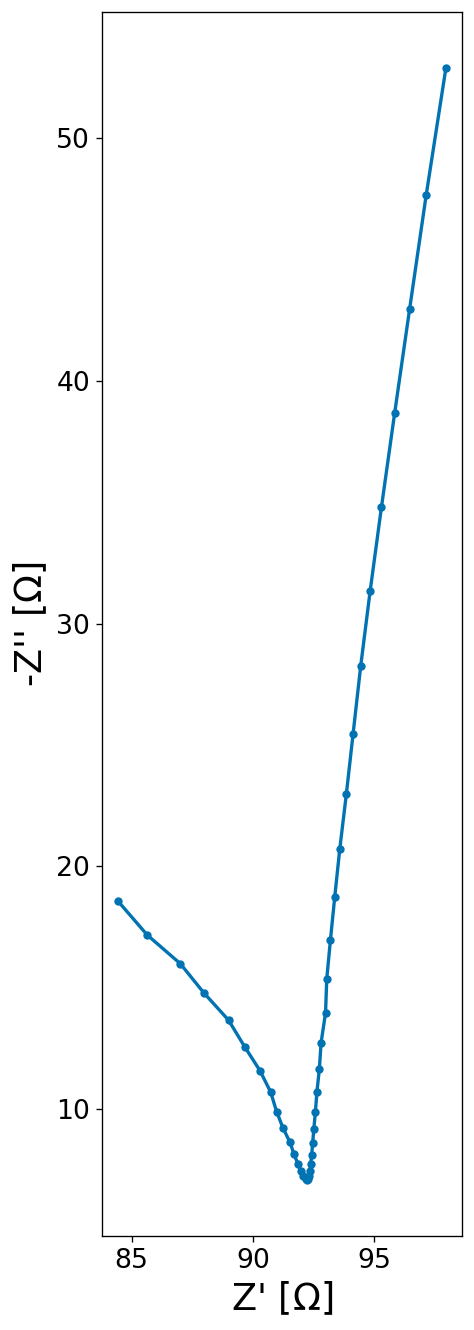

In [206]:
masked_mpt = mpt_data(path,data, mask = masker(ex_mpt, 4))
masked_mpt.set_new_gph_dims(30,30)
masked_mpt.mpt_plot()

ERROR:  3319383.952451964
ERROR:  3319383.952451964
ERROR:  3319383.952451964
ERROR:  3319383.6024385933
ERROR:  3319383.9469190664
ERROR:  3319383.9524524277
ERROR:  3319383.9524519565
ERROR:  3319383.9518407667
ERROR:  3319383.952452044
ERROR:  3319383.9513286436
ERROR:  198748044215525.75
ERROR:  21929020828500.746
ERROR:  38232576915.03301
ERROR:  38232576988.27992
ERROR:  38232575248.40959
ERROR:  38232576923.740486
ERROR:  38232577325.99959
ERROR:  38232583674.48628
ERROR:  38232576329.675766
ERROR:  38232580453.84869
ERROR:  2248252543.755275
ERROR:  2248252541.257493
ERROR:  2248252338.575259
ERROR:  2248252544.0481305
ERROR:  2248252575.2597113
ERROR:  2248253490.881626
ERROR:  2248251178.870708
ERROR:  2248252763.7091913
ERROR:  147392348.41486752
ERROR:  147392337.29909497
ERROR:  147392320.12898993
ERROR:  147392348.40295285
ERROR:  147392350.13507077
ERROR:  147392480.85966337
ERROR:  147392243.81827307
ERROR:  147392364.23283416
ERROR:  13397915.597337287
ERROR:  13397909

ERROR:  15951.332369237858
ERROR:  15943.898424953368
ERROR:  15943.875812507371
ERROR:  15943.828027221678
ERROR:  15943.898366564943
ERROR:  15944.722509441504
ERROR:  15943.917381551431
ERROR:  15943.772411523656
ERROR:  15943.58737623297
ERROR:  15917.087430425701
ERROR:  15917.064731497438
ERROR:  15917.017036250347
ERROR:  15917.087495830372
ERROR:  15917.910132381137
ERROR:  15917.106335302062
ERROR:  15916.961350264497
ERROR:  15916.776504268073
ERROR:  15911.85987959943
ERROR:  15911.837222076363
ERROR:  15911.78942381581
ERROR:  15911.859821306807
ERROR:  15912.684161164803
ERROR:  15911.878738530479
ERROR:  15911.73371951971
ERROR:  15911.549069673069
ERROR:  15888.905631926125
ERROR:  15888.882881514739
ERROR:  15888.835163931386
ERROR:  15888.905683537032
ERROR:  15889.728662625708
ERROR:  15888.92444548528
ERROR:  15888.779422551106
ERROR:  15888.594940676936
ERROR:  15881.103158244929
ERROR:  15881.080435109285
ERROR:  15881.032627210294
ERROR:  15881.103099580901
ERROR:

ERROR:  15477.06317264138
ERROR:  15477.039874544364
ERROR:  15476.99183377201
ERROR:  15477.063236026856
ERROR:  15477.889726077512
ERROR:  15477.080630614146
ERROR:  15476.935813762615
ERROR:  15476.75610432442
ERROR:  15470.58360548977
ERROR:  15470.56031720473
ERROR:  15470.512243725003
ERROR:  15470.583539120033
ERROR:  15471.410600083007
ERROR:  15470.601033073563
ERROR:  15470.4562361654
ERROR:  15470.27662542776
ERROR:  15459.266388324786
ERROR:  15459.243078196661
ERROR:  15459.195021178028
ERROR:  15459.266457601814
ERROR:  15460.093062909848
ERROR:  15459.283786573791
ERROR:  15459.139014119586
ERROR:  15458.959484710485
ERROR:  15454.514164786007
ERROR:  15454.490864683306
ERROR:  15454.442769862357
ERROR:  15454.514105854716
ERROR:  15455.3413596582
ERROR:  15454.531536592918
ERROR:  15454.38678269031
ERROR:  15454.207333008064
ERROR:  15443.656822754401
ERROR:  15443.63349217701
ERROR:  15443.585414719451
ERROR:  15443.656882960111
ERROR:  15444.483680185422
ERROR:  15443

ERROR:  15032.300413596422
ERROR:  15033.131611298651
ERROR:  15032.316321312064
ERROR:  15032.17401838327
ERROR:  15031.99797120534
ERROR:  15028.7426571827
ERROR:  15028.719236225606
ERROR:  15028.670456407122
ERROR:  15028.742709420214
ERROR:  15029.573812827397
ERROR:  15028.758490437944
ERROR:  15028.61622376616
ERROR:  15028.440197436219
ERROR:  15024.393784288655
ERROR:  15024.370365602173
ERROR:  15024.321577145245
ERROR:  15024.39372160779
ERROR:  15025.224961848231
ERROR:  15024.409601087227
ERROR:  15024.267375828982
ERROR:  15024.091374327843
ERROR:  15020.376567454834
ERROR:  15020.353154336697
ERROR:  15020.30435738376
ERROR:  15020.376629632843
ERROR:  15021.20777571933
ERROR:  15020.392369769237
ERROR:  15020.25018195398
ERROR:  15020.074196733336
ERROR:  15016.67564366756
ERROR:  15016.652233991099
ERROR:  15016.603426399459
ERROR:  15016.67558187545
ERROR:  15017.506916482489
ERROR:  15016.691431080078
ERROR:  15016.549280420699
ERROR:  15016.373320295952
ERROR:  1501

ERROR:  14802.352657305943
ERROR:  14800.228462287792
ERROR:  14800.20536935272
ERROR:  14800.15586605883
ERROR:  14800.22840187791
ERROR:  14801.062575789478
ERROR:  14800.24337433035
ERROR:  14800.104005999754
ERROR:  14799.928861815795
ERROR:  14798.298432898588
ERROR:  14798.27534615931
ERROR:  14798.225830935124
ERROR:  14798.298492349695
ERROR:  14799.132621173576
ERROR:  14798.313335436284
ERROR:  14798.174003741815
ERROR:  14797.998863561901
ERROR:  14795.924600323458
ERROR:  14795.901516680158
ERROR:  14795.85199401047
ERROR:  14795.924541725784
ERROR:  14796.758793146124
ERROR:  14795.939493442223
ERROR:  14795.800198382503
ERROR:  14795.625061419883
ERROR:  14793.997315403285
ERROR:  14793.974237844299
ERROR:  14793.924703477827
ERROR:  14793.997373083725
ERROR:  14794.831579293072
ERROR:  14794.012199105158
ERROR:  14793.872940583624
ERROR:  14793.697807454642
ERROR:  14791.665265635587
ERROR:  14791.642191395014
ERROR:  14791.592649428674
ERROR:  14791.66520877272
ERROR:  

ERROR:  14658.542286851845
ERROR:  14658.615089409202
ERROR:  14659.451701017893
ERROR:  14658.62942718115
ERROR:  14658.492787525418
ERROR:  14658.317677985695
ERROR:  14657.097267220386
ERROR:  14657.074634793069
ERROR:  14657.0244054935
ERROR:  14657.097321179474
ERROR:  14657.933832077171
ERROR:  14657.111542969793
ERROR:  14656.974936465554
ERROR:  14656.79982385077
ERROR:  14654.926240751836
ERROR:  14654.903617712083
ERROR:  14654.85338315438
ERROR:  14654.926174703753
ERROR:  14655.762767978254
ERROR:  14654.940509006014
ERROR:  14654.803937586268
ERROR:  14654.628822977495
ERROR:  14653.459863629938
ERROR:  14653.437252047188
ERROR:  14653.387007216192
ERROR:  14653.459927918208
ERROR:  14654.29644353426
ERROR:  14653.474125216198
ERROR:  14653.337585967318
ERROR:  14653.162469470892
ERROR:  14652.007192062347
ERROR:  14651.9845856848
ERROR:  14651.934332081913
ERROR:  14652.007129374855
ERROR:  14652.843798473988
ERROR:  14652.021446884337
ERROR:  14651.884938946092
ERROR:  1

ERROR:  14600.668170902933
ERROR:  14600.741192964446
ERROR:  14601.578773532174
ERROR:  14600.755141082536
ERROR:  14600.619882300694
ERROR:  14600.444646072065
ERROR:  14599.536396897507
ERROR:  14599.514042680024
ERROR:  14599.463433910321
ERROR:  14599.536335864392
ERROR:  14600.374051826804
ERROR:  14599.550402179957
ERROR:  14599.415174857291
ERROR:  14599.239933307937
ERROR:  14598.653009819087
ERROR:  14598.630661405976
ERROR:  14598.58004176178
ERROR:  14598.653069018439
ERROR:  14599.490723198029
ERROR:  14598.667009388955
ERROR:  14598.531813167554
ERROR:  14598.356567749728
ERROR:  14597.47732200479
ERROR:  14597.454977526519
ERROR:  14597.404349882927
ERROR:  14597.477264493593
ERROR:  14598.31504775515
ERROR:  14597.491315933967
ERROR:  14597.356150953317
ERROR:  14597.180900400937
ERROR:  14596.579628837826
ERROR:  14596.557290196928
ERROR:  14596.506651875858
ERROR:  14596.5796846346
ERROR:  14597.417409277798
ERROR:  14596.593617106799
ERROR:  14596.458483273209
ERROR:

ERROR:  14522.18978986486
ERROR:  14522.014209290011
ERROR:  14522.037909860472
ERROR:  14522.016049370166
ERROR:  14521.9647855042
ERROR:  14522.037844202354
ERROR:  14522.877351201536
ERROR:  14522.051524631008
ERROR:  14521.918528043472
ERROR:  14521.742945179303
ERROR:  14520.695588148194
ERROR:  14520.673728701155
ERROR:  14520.622461365921
ERROR:  14520.695651307113
ERROR:  14521.53497327182
ERROR:  14520.709198435365
ERROR:  14520.576227337837
ERROR:  14520.400641171855
ERROR:  14520.602325419653
ERROR:  14520.580474703223
ERROR:  14520.529192496473
ERROR:  14520.602264536734
ERROR:  14521.441834382764
ERROR:  14520.615931219825
ERROR:  14520.482988847369
ERROR:  14520.307397538701
ERROR:  14519.392228685681
ERROR:  14519.370378726213
ERROR:  14519.319092480513
ERROR:  14519.392287269162
ERROR:  14520.23168819707
ERROR:  14519.405830142256
ERROR:  14519.272915224621
ERROR:  14519.097316929438
ERROR:  14519.238740551828
ERROR:  14519.216898591538
ERROR:  14519.165598229254
ERROR:

ERROR:  14491.516387017504
ERROR:  14492.356669498166
ERROR:  14491.529896292393
ERROR:  14491.397920873582
ERROR:  14491.222144862886
ERROR:  14490.05306125106
ERROR:  14490.031444418582
ERROR:  14489.979861446569
ERROR:  14490.053129936123
ERROR:  14490.893216435376
ERROR:  14490.066507939879
ERROR:  14489.934559778016
ERROR:  14489.75877685857
ERROR:  14489.516246810028
ERROR:  14489.494641688772
ERROR:  14489.443047297496
ERROR:  14489.51618070195
ERROR:  14490.356478215897
ERROR:  14489.529689431221
ERROR:  14489.397766628372
ERROR:  14489.221980359518
ERROR:  14488.692867402853
ERROR:  14488.67126569795
ERROR:  14488.619664290134
ERROR:  14488.692930921952
ERROR:  14489.533100677709
ERROR:  14488.706305982247
ERROR:  14488.574407409436
ERROR:  14488.398618274006
ERROR:  14488.366701768617
ERROR:  14488.345106188184
ERROR:  14488.2934935416
ERROR:  14488.366640620938
ERROR:  14489.207002217268
ERROR:  14488.380136383306
ERROR:  14488.248264840357
ERROR:  14488.072469458719
ERROR: 

ERROR:  14462.020504196347
ERROR:  14461.968583398888
ERROR:  14462.04180333537
ERROR:  14462.882877602471
ERROR:  14462.055150335462
ERROR:  14461.924238709733
ERROR:  14461.748244880848
ERROR:  14460.800051903956
ERROR:  14460.778702414285
ERROR:  14460.726777839085
ERROR:  14460.800121285127
ERROR:  14461.641014147659
ERROR:  14460.813336439802
ERROR:  14460.68245050006
ERROR:  14460.506449776012
ERROR:  14460.2479646214
ERROR:  14460.226626083573
ERROR:  14460.174691370372
ERROR:  14460.24789810503
ERROR:  14461.088985020877
ERROR:  14460.261245517235
ERROR:  14460.130383186657
ERROR:  14459.954379038873
ERROR:  14459.662873044355
ERROR:  14459.641538421476
ERROR:  14459.589595643018
ERROR:  14459.662936709366
ERROR:  14460.503913559156
ERROR:  14459.676150302555
ERROR:  14459.545310620979
ERROR:  14459.369303959345
ERROR:  14459.350551242258
ERROR:  14459.329221734228
ERROR:  14459.277268838083
ERROR:  14459.350490194
ERROR:  14460.191642147884
ERROR:  14459.36382496982
ERROR:  14

ERROR:  14436.028374584097
ERROR:  14436.101646949182
ERROR:  14436.94344241024
ERROR:  14436.114855730088
ERROR:  14435.984944527687
ERROR:  14435.80873423025
ERROR:  14435.60366983734
ERROR:  14435.582586025594
ERROR:  14435.530326123153
ERROR:  14435.603733330478
ERROR:  14436.445417170617
ERROR:  14435.6168084958
ERROR:  14435.486918242595
ERROR:  14435.310706010834
ERROR:  14435.42714983103
ERROR:  14435.406070875426
ERROR:  14435.35380066844
ERROR:  14435.427089384088
ERROR:  14436.268951961516
ERROR:  14435.440285300025
ERROR:  14435.310419580997
ERROR:  14435.134200302997
ERROR:  14435.00739952136
ERROR:  14434.986323346951
ERROR:  14434.934045255912
ERROR:  14435.007456980195
ERROR:  14435.849217733157
ERROR:  14435.0205318305
ERROR:  14434.890689612748
ERROR:  14434.714463764409
ERROR:  14433.742730904592
ERROR:  14433.721663202843
ERROR:  14433.669382377135
ERROR:  14433.742660539428
ERROR:  14434.584479539957
ERROR:  14433.755859691095
ERROR:  14433.626041695374
ERROR:  144

ERROR:  14415.061326248415
ERROR:  14415.040485790658
ERROR:  14414.987912653802
ERROR:  14415.061383802364
ERROR:  14415.903780852259
ERROR:  14415.074338907245
ERROR:  14414.945347255023
ERROR:  14414.76893145578
ERROR:  14413.674626653057
ERROR:  14413.653793745747
ERROR:  14413.60121978959
ERROR:  14413.674555650909
ERROR:  14414.51698273768
ERROR:  14413.687636101953
ERROR:  14413.55866713812
ERROR:  14413.382243941498
ERROR:  14413.445445740064
ERROR:  14413.424625590524
ERROR:  14413.372039956608
ERROR:  14413.445512845941
ERROR:  14414.287890562697
ERROR:  14413.458452149116
ERROR:  14413.329503998126
ERROR:  14413.15307881407
ERROR:  14412.909434191859
ERROR:  14412.88861612069
ERROR:  14412.836023884865
ERROR:  14412.909370655158
ERROR:  14413.751878238343
ERROR:  14412.922437618989
ERROR:  14412.793508755585
ERROR:  14412.617081689415
ERROR:  14412.957526695987
ERROR:  14412.936713966292
ERROR:  14412.884110284982
ERROR:  14412.957586770377
ERROR:  14413.80004550249
ERROR:  

ERROR:  14396.188555981738
ERROR:  14396.135690400119
ERROR:  14396.209089962616
ERROR:  14397.052163551758
ERROR:  14396.22205321441
ERROR:  14396.09388558285
ERROR:  14395.917286054006
ERROR:  14396.140415054588
ERROR:  14396.119821299082
ERROR:  14396.066946075389
ERROR:  14396.140475053518
ERROR:  14396.983471787993
ERROR:  14396.153312009737
ERROR:  14396.025166903113
ERROR:  14395.848560156443
ERROR:  14394.94278604747
ERROR:  14394.922198560376
ERROR:  14394.869322067716
ERROR:  14394.94271478304
ERROR:  14395.78575420335
ERROR:  14394.955680127587
ERROR:  14394.827555999655
ERROR:  14394.650942141912
ERROR:  14394.790801592877
ERROR:  14394.770225906683
ERROR:  14394.717338017326
ERROR:  14394.790869177994
ERROR:  14395.633854536905
ERROR:  14394.803692877273
ERROR:  14394.675588976053
ERROR:  14394.498972664194
ERROR:  14394.317806986262
ERROR:  14394.2972333123
ERROR:  14394.244338937991
ERROR:  14394.31774277614
ERROR:  14395.160858222993
ERROR:  14394.330695542374
ERROR:  1

ERROR:  14380.269418670472
ERROR:  14380.343000815934
ERROR:  14381.186559767862
ERROR:  14380.355735053952
ERROR:  14380.228352339285
ERROR:  14380.051572512482
ERROR:  14379.821135337275
ERROR:  14379.800772786286
ERROR:  14379.747610183662
ERROR:  14379.821076986136
ERROR:  14380.664726475788
ERROR:  14379.83392852898
ERROR:  14379.706565740102
ERROR:  14379.529778828526
ERROR:  14378.9343099166
ERROR:  14378.913957517503
ERROR:  14378.86079088382
ERROR:  14378.934382058294
ERROR:  14379.777859731501
ERROR:  14378.947100347734
ERROR:  14378.819758376894
ERROR:  14378.642965290272
ERROR:  14378.42795780533
ERROR:  14378.407615635311
ERROR:  14378.354441091982
ERROR:  14378.427890017654
ERROR:  14379.27153925261
ERROR:  14378.440745681419
ERROR:  14378.313421626659
ERROR:  14378.136626595282
ERROR:  14378.397371243092
ERROR:  14378.377032947163
ERROR:  14378.32384841762
ERROR:  14378.39743484362
ERROR:  14379.241009471567
ERROR:  14378.410156531943
ERROR:  14378.282849859024
ERROR:  1

ERROR:  14364.890110274504
ERROR:  14364.763451183506
ERROR:  14364.586503680464
ERROR:  14365.32004553976
ERROR:  14365.299920207584
ERROR:  14365.246481434406
ERROR:  14365.319977236923
ERROR:  14366.164169896561
ERROR:  14365.332744565792
ERROR:  14365.206104606557
ERROR:  14365.02915631631
ERROR:  14364.49845255023
ERROR:  14364.47832575703
ERROR:  14364.424884923561
ERROR:  14364.498517093498
ERROR:  14365.342505325563
ERROR:  14364.51114929605
ERROR:  14364.38452507641
ERROR:  14364.207573715907
ERROR:  14365.116447943252
ERROR:  14365.096328767166
ERROR:  14365.042872942486
ERROR:  14365.11638682005
ERROR:  14365.960637462158
ERROR:  14365.129142322594
ERROR:  14365.0025396377
ERROR:  14364.825582951737
ERROR:  14363.442623664729
ERROR:  14363.422507114092
ERROR:  14363.369055673731
ERROR:  14363.442695879463
ERROR:  14364.286636800933
ERROR:  14363.455315690328
ERROR:  14363.328730694247
ERROR:  14363.15176634423
ERROR:  14363.908183129513
ERROR:  14363.888081452838
ERROR:  143

ERROR:  14351.79489032416
ERROR:  14351.774999875994
ERROR:  14351.721277212066
ERROR:  14351.794821856734
ERROR:  14352.639523164265
ERROR:  14351.807497370071
ERROR:  14351.681580725217
ERROR:  14351.504470326905
ERROR:  14350.955185422536
ERROR:  14350.935292336177
ERROR:  14350.881568375376
ERROR:  14350.955249538914
ERROR:  14351.799735329556
ERROR:  14350.967790364892
ERROR:  14350.841888026811
ERROR:  14350.664775157773
ERROR:  14351.738848365
ERROR:  14351.718962953288
ERROR:  14351.66522316094
ERROR:  14351.738788189748
ERROR:  14352.583550347948
ERROR:  14351.751451102435
ERROR:  14351.625569989692
ERROR:  14351.448451628257
ERROR:  14349.915936714064
ERROR:  14349.896053582468
ERROR:  14349.842319872154
ERROR:  14349.916009763292
ERROR:  14350.760435451473
ERROR:  14349.928537273365
ERROR:  14349.802672647187
ERROR:  14349.625546622072
ERROR:  14350.513359791748
ERROR:  14350.4934926456
ERROR:  14350.439741972194
ERROR:  14350.51329130993
ERROR:  14351.358041291325
ERROR:  1

ERROR:  14337.379429468308
ERROR:  14338.346550661372
ERROR:  14338.326914891692
ERROR:  14338.272887246516
ERROR:  14338.34648204294
ERROR:  14339.19169969144
ERROR:  14338.359063602391
ERROR:  14338.233901205607
ERROR:  14338.056625342793
ERROR:  14337.541398114914
ERROR:  14337.521758785133
ERROR:  14337.467730079723
ERROR:  14337.541461729115
ERROR:  14338.386460912065
ERROR:  14337.5539091168
ERROR:  14337.428759581293
ERROR:  14337.251482001573
ERROR:  14337.51475385059
ERROR:  14337.495125312182
ERROR:  14337.441087279114
ERROR:  14337.514681002955
ERROR:  14338.359866860479
ERROR:  14337.527262699114
ERROR:  14337.402133238413
ERROR:  14337.22484923945
ERROR:  14335.60773933756
ERROR:  14335.588120236262
ERROR:  14335.534087480131
ERROR:  14335.607822535856
ERROR:  14336.452679006925
ERROR:  14335.620246120645
ERROR:  14335.495128970466
ERROR:  14335.317842194807
ERROR:  14340.852456733224
ERROR:  14340.832848308983
ERROR:  14340.77876234016
ERROR:  14340.85246668625
ERROR:  14

ERROR:  14327.411624087139
ERROR:  14327.467268119544
ERROR:  14327.447854197539
ERROR:  14327.393539542274
ERROR:  14327.467218490132
ERROR:  14328.312884274714
ERROR:  14327.479697513556
ERROR:  14327.355221365782
ERROR:  14327.177794856634
ERROR:  14327.142370836344
ERROR:  14327.122964706907
ERROR:  14327.068643823022
ERROR:  14327.142431645923
ERROR:  14327.987982483015
ERROR:  14327.154798208368
ERROR:  14327.030341467738
ERROR:  14326.852907624012
ERROR:  14326.59776329693
ERROR:  14326.578364561556
ERROR:  14326.52403859805
ERROR:  14326.597704622563
ERROR:  14327.443364743518
ERROR:  14326.61018879076
ERROR:  14326.485746592472
ERROR:  14326.30830998142
ERROR:  14326.653631343303
ERROR:  14326.634238407665
ERROR:  14326.579903090887
ERROR:  14326.65368788243
ERROR:  14327.499288392202
ERROR:  14326.666054860309
ERROR:  14326.541627121234
ERROR:  14326.36419035296
ERROR:  14326.349927138035
ERROR:  14326.330537349259
ERROR:  14326.276196409537
ERROR:  14326.349872580027
ERROR: 

ERROR:  14317.446316772413
ERROR:  14317.268762496871
ERROR:  14317.218375603417
ERROR:  14317.199191138525
ERROR:  14317.1446058871
ERROR:  14317.218428076874
ERROR:  14318.064399168132
ERROR:  14317.230728721235
ERROR:  14317.106885444573
ERROR:  14316.929326626712
ERROR:  14317.37827436638
ERROR:  14317.359095485885
ERROR:  14317.304500718681
ERROR:  14317.37822384538
ERROR:  14318.224354822563
ERROR:  14317.390625701892
ERROR:  14317.26679881585
ERROR:  14317.089236201908
ERROR:  14316.30210399534
ERROR:  14316.28293111089
ERROR:  14316.228336393946
ERROR:  14316.302165353743
ERROR:  14317.148084701837
ERROR:  14316.314453459154
ERROR:  14316.190641152602
ERROR:  14316.013073919046
ERROR:  14316.349135946295
ERROR:  14316.329974383298
ERROR:  14316.27536935878
ERROR:  14316.349076919698
ERROR:  14317.195196205888
ERROR:  14316.36148352745
ERROR:  14316.237685668091
ERROR:  14316.06011834226
ERROR:  14315.900865754793
ERROR:  14315.881706398952
ERROR:  14315.827097046094
ERROR:  143

ERROR:  14308.053598238046
ERROR:  14307.87592897871
ERROR:  14308.045227267754
ERROR:  14308.026264984388
ERROR:  14307.971420905433
ERROR:  14308.045280005026
ERROR:  14308.891635278227
ERROR:  14308.057510259809
ERROR:  14307.934252992718
ERROR:  14307.75657970772
ERROR:  14308.045750831183
ERROR:  14308.026792856926
ERROR:  14307.97194109485
ERROR:  14308.045700077324
ERROR:  14308.892187528285
ERROR:  14308.058032169953
ERROR:  14307.934790302465
ERROR:  14307.757113018417
ERROR:  14307.140619137193
ERROR:  14307.121668216605
ERROR:  14307.066815223936
ERROR:  14307.140681036906
ERROR:  14307.986978687413
ERROR:  14307.152898689274
ERROR:  14307.029670980017
ERROR:  14306.851989784594
ERROR:  14307.053532020698
ERROR:  14307.034591494972
ERROR:  14306.979729693532
ERROR:  14307.053472691552
ERROR:  14307.899948438037
ERROR:  14307.065809809952
ERROR:  14306.94259548518
ERROR:  14306.764914318139
ERROR:  14306.782098861768
ERROR:  14306.763161239938
ERROR:  14306.708293807485
ERROR

ERROR:  14298.38510049155
ERROR:  14298.329988884187
ERROR:  14298.403763701972
ERROR:  14299.250543546808
ERROR:  14298.416037859319
ERROR:  14298.293380767245
ERROR:  14298.115594988418
ERROR:  14298.244473098444
ERROR:  14298.225756667905
ERROR:  14298.17063738143
ERROR:  14298.24453274877
ERROR:  14299.091229431993
ERROR:  14298.256683310128
ERROR:  14298.134038870316
ERROR:  14297.956252818934
ERROR:  14298.102174877282
ERROR:  14298.083461879074
ERROR:  14298.028336100484
ERROR:  14298.102117672108
ERROR:  14298.948943112278
ERROR:  14298.114383480519
ERROR:  14297.991750971638
ERROR:  14297.813964736291
ERROR:  14298.155379333775
ERROR:  14298.1366706588
ERROR:  14298.081537021812
ERROR:  14298.155434117898
ERROR:  14299.002179911608
ERROR:  14298.16758638685
ERROR:  14298.044969011735
ERROR:  14297.867178600762
ERROR:  14298.073093693713
ERROR:  14298.054388136832
ERROR:  14297.999247955038
ERROR:  14298.073041154163
ERROR:  14298.919905090697
ERROR:  14298.085299219729
ERROR: 

ERROR:  14290.92483204422
ERROR:  14290.47386836758
ERROR:  14290.455358945466
ERROR:  14290.400001033431
ERROR:  14290.473805439031
ERROR:  14291.320898171127
ERROR:  14290.486017706076
ERROR:  14290.363892720157
ERROR:  14290.186014053521
ERROR:  14290.325034653806
ERROR:  14290.306534718213
ERROR:  14290.251169114083
ERROR:  14290.325094531821
ERROR:  14291.17210570765
ERROR:  14290.337182418472
ERROR:  14290.21506933813
ERROR:  14290.037190952029
ERROR:  14290.217452718342
ERROR:  14290.198955898211
ERROR:  14290.143583777932
ERROR:  14290.217395652166
ERROR:  14291.064537197995
ERROR:  14290.229598952716
ERROR:  14290.10749697119
ERROR:  14289.929618969061
ERROR:  14290.312247977705
ERROR:  14290.293755198869
ERROR:  14290.238375203044
ERROR:  14290.312302289272
ERROR:  14291.159366120482
ERROR:  14290.324392749517
ERROR:  14290.202305571896
ERROR:  14290.024423358434
ERROR:  14290.26749830276
ERROR:  14290.249008311697
ERROR:  14290.19362179618
ERROR:  14290.267446540376
ERROR:  

ERROR:  14283.935832519412
ERROR:  14283.100523043631
ERROR:  14282.978930284105
ERROR:  14282.800968391262
ERROR:  14283.114381662548
ERROR:  14283.096100451909
ERROR:  14283.04047887133
ERROR:  14283.114433464427
ERROR:  14283.961797530043
ERROR:  14283.126467298163
ERROR:  14283.004887882918
ERROR:  14282.826922574095
ERROR:  14282.305576280216
ERROR:  14282.287302236833
ERROR:  14282.231679600625
ERROR:  14282.305512775058
ERROR:  14283.152918419275
ERROR:  14282.317660414643
ERROR:  14282.196093599847
ERROR:  14282.018124818618
ERROR:  14282.220062529695
ERROR:  14282.201798411825
ERROR:  14282.146167709183
ERROR:  14282.220122679517
ERROR:  14283.067454562319
ERROR:  14282.232145156875
ERROR:  14282.110589695634
ERROR:  14281.9326217255
ERROR:  14282.103378065516
ERROR:  14282.08511651037
ERROR:  14282.029479715678
ERROR:  14282.10332100348
ERROR:  14282.950778203407
ERROR:  14282.115459250359
ERROR:  14281.993914072405
ERROR:  14281.815946751241
ERROR:  14282.271200180065
ERROR:

ERROR:  14269.922428157282
ERROR:  14269.744340382007
ERROR:  14270.129703295475
ERROR:  14270.111824896241
ERROR:  14270.055760639332
ERROR:  14270.129757192466
ERROR:  14270.977595893484
ERROR:  14270.141683942515
ERROR:  14270.021007662475
ERROR:  14269.842915649524
ERROR:  14269.427611072992
ERROR:  14269.409738861494
ERROR:  14269.35367332843
ERROR:  14269.427546965318
ERROR:  14270.275435916657
ERROR:  14269.43959038545
ERROR:  14269.318925437383
ERROR:  14269.14083040817
ERROR:  14269.38303031943
ERROR:  14269.36516740797
ERROR:  14269.309094078408
ERROR:  14269.383091053522
ERROR:  14270.230902992189
ERROR:  14269.395008249256
ERROR:  14269.274354269466
ERROR:  14269.096260050552
ERROR:  14269.307032471206
ERROR:  14269.28917189991
ERROR:  14269.233092563129
ERROR:  14269.306974841436
ERROR:  14270.154913682312
ERROR:  14269.319009090279
ERROR:  14269.198364599288
ERROR:  14269.020270848561
ERROR:  14269.494407206379
ERROR:  14269.476550428913
ERROR:  14269.420463159415
ERROR: 

ERROR:  14264.222591676547
ERROR:  14264.166311993344
ERROR:  14264.240325891411
ERROR:  14265.088385585983
ERROR:  14264.252202700887
ERROR:  14264.1319517031
ERROR:  14263.953808728716
ERROR:  14263.410991799512
ERROR:  14263.393317393962
ERROR:  14263.337037817055
ERROR:  14263.410927397052
ERROR:  14264.259017198841
ERROR:  14263.42292200322
ERROR:  14263.302681385132
ERROR:  14263.12453529361
ERROR:  14263.515271577853
ERROR:  14263.497607115474
ERROR:  14263.441318598761
ERROR:  14263.515332587958
ERROR:  14264.363364733748
ERROR:  14263.527200427658
ERROR:  14263.40697076586
ERROR:  14263.228825927567
ERROR:  14263.333375328115
ERROR:  14263.31571234714
ERROR:  14263.259418998423
ERROR:  14263.333317443019
ERROR:  14264.181458457668
ERROR:  14263.345302944617
ERROR:  14263.22508210452
ERROR:  14263.04693762631
ERROR:  14263.641134725567
ERROR:  14263.623476129691
ERROR:  14263.56717396482
ERROR:  14263.641189573213
ERROR:  14264.4892725368
ERROR:  14263.653061110837
ERROR:  1426

ERROR:  14257.325207525248
ERROR:  14257.399111019959
ERROR:  14258.247393771091
ERROR:  14257.411056501725
ERROR:  14257.291244953602
ERROR:  14257.113053438212
ERROR:  14257.620120771615
ERROR:  14257.602663358404
ERROR:  14257.546153267827
ERROR:  14257.620181997965
ERROR:  14258.468423483242
ERROR:  14257.632000083537
ERROR:  14257.512199366975
ERROR:  14257.334009439935
ERROR:  14257.368562862777
ERROR:  14257.351106110578
ERROR:  14257.294592009977
ERROR:  14257.368504965722
ERROR:  14258.21684213418
ERROR:  14257.38044101122
ERROR:  14257.260648373423
ERROR:  14257.082458951987
ERROR:  14257.784362197788
ERROR:  14257.766910171365
ERROR:  14257.710386543342
ERROR:  14257.784416876912
ERROR:  14258.632709511861
ERROR:  14257.796239154139
ERROR:  14257.67646012432
ERROR:  14257.498267484872
ERROR:  14256.818337482458
ERROR:  14256.80088995504
ERROR:  14256.744367846986
ERROR:  14256.818272574876
ERROR:  14257.666574065222
ERROR:  14256.830213274307
ERROR:  14256.710443725042
ERROR

ERROR:  14252.72205417401
ERROR:  14252.66533515311
ERROR:  14252.739376013087
ERROR:  14253.587839371641
ERROR:  14252.751156189177
ERROR:  14252.631748263713
ERROR:  14252.453522388198
ERROR:  14251.702454370798
ERROR:  14251.685191095472
ERROR:  14251.62847435752
ERROR:  14251.702388887417
ERROR:  14252.55085031419
ERROR:  14251.71428740277
ERROR:  14251.594888472562
ERROR:  14251.416659355018
ERROR:  14251.948465724072
ERROR:  14251.931213647837
ERROR:  14251.87448686999
ERROR:  14251.948527055576
ERROR:  14252.796952465696
ERROR:  14251.960297463425
ERROR:  14251.84090896552
ERROR:  14251.6626822148
ERROR:  14251.720815935769
ERROR:  14251.70356401042
ERROR:  14251.646833265158
ERROR:  14251.720758406069
ERROR:  14252.569279496318
ERROR:  14251.732646560784
ERROR:  14251.613265432043
ERROR:  14251.435039582599
ERROR:  14252.190114702868
ERROR:  14252.172867234223
ERROR:  14252.116126772045
ERROR:  14252.190168599289
ERROR:  14253.038649928818
ERROR:  14252.20194418931
ERROR:  1425

ERROR:  14247.878789360122
ERROR:  14247.041944451088
ERROR:  14246.922913455168
ERROR:  14246.744660399994
ERROR:  14246.829069052124
ERROR:  14246.812000354948
ERROR:  14246.755078401922
ERROR:  14246.829011852276
ERROR:  14247.677682374768
ERROR:  14246.8408584336
ERROR:  14246.721834196673
ERROR:  14246.543582616909
ERROR:  14247.338985329634
ERROR:  14247.321920822147
ERROR:  14247.26498903705
ERROR:  14247.339038538215
ERROR:  14248.187672587135
ERROR:  14247.350773617665
ERROR:  14247.231763052692
ERROR:  14247.053507656256
ERROR:  14246.231077289507
ERROR:  14246.214017511296
ERROR:  14246.157088731528
ERROR:  14246.231011186308
ERROR:  14247.079632623681
ERROR:  14246.242864505171
ERROR:  14246.123862424498
ERROR:  14245.945604208047
ERROR:  14246.493475052883
ERROR:  14246.476426969828
ERROR:  14246.419487996836
ERROR:  14246.493536477043
ERROR:  14247.342125965399
ERROR:  14246.505261005806
ERROR:  14246.38626897508
ERROR:  14246.208013351257
ERROR:  14246.295633635858
ERROR

ERROR:  14242.326718581511
ERROR:  14242.148440756597
ERROR:  14240.891441369327
ERROR:  14240.8745780186
ERROR:  14240.81744701478
ERROR:  14240.891502378083
ERROR:  14241.74011496764
ERROR:  14240.903185381881
ERROR:  14240.784556088769
ERROR:  14240.606277186684
ERROR:  14242.464645070504
ERROR:  14242.447792054985
ERROR:  14242.390641152557
ERROR:  14242.464595103535
ERROR:  14243.313567829482
ERROR:  14242.476387794466
ERROR:  14242.357771282255
ERROR:  14242.179495866167
ERROR:  14241.720632630691
ERROR:  14241.703771644796
ERROR:  14241.646623284585
ERROR:  14241.720677360527
ERROR:  14242.56941596814
ERROR:  14241.73237460768
ERROR:  14241.613766636267
ERROR:  14241.435484766762
ERROR:  14242.219750623892
ERROR:  14242.202900760516
ERROR:  14242.145741808316
ERROR:  14242.219696090178
ERROR:  14243.068625316742
ERROR:  14242.23149138099
ERROR:  14242.112898866144
ERROR:  14241.934613088973
ERROR:  14241.23990872667
ERROR:  14241.223061621702
ERROR:  14241.16590430745
ERROR:  14

ERROR:  14237.041317068506
ERROR:  14236.863017983345
ERROR:  14237.10495895088
ERROR:  14237.088295298716
ERROR:  14237.030951571549
ERROR:  14237.105011779226
ERROR:  14237.953908844318
ERROR:  14237.11666047054
ERROR:  14236.998404250884
ERROR:  14236.820107387106
ERROR:  14236.940987625718
ERROR:  14236.924327048167
ERROR:  14236.866978750295
ERROR:  14236.940936690426
ERROR:  14237.789931377147
ERROR:  14236.952688106583
ERROR:  14236.83443902848
ERROR:  14236.656143679704
ERROR:  14237.069165284673
ERROR:  14237.052509351048
ERROR:  14236.995154282205
ERROR:  14237.069214333278
ERROR:  14237.91813955336
ERROR:  14237.080864738014
ERROR:  14236.962626236309
ERROR:  14236.784329374812
ERROR:  14236.97472731696
ERROR:  14236.958074323069
ERROR:  14236.900714481562
ERROR:  14236.974680029734
ERROR:  14237.823697529297
ERROR:  14236.986425788038
ERROR:  14236.86819654786
ERROR:  14236.689898139999
ERROR:  14237.073761830943
ERROR:  14237.057113168607
ERROR:  14236.999746798716
ERROR: 

ERROR:  14232.450742050292
ERROR:  14232.272437643443
ERROR:  14232.684740584838
ERROR:  14232.668271094928
ERROR:  14232.610725692153
ERROR:  14232.684785558062
ERROR:  14233.533838563817
ERROR:  14232.696401122572
ERROR:  14232.578499696898
ERROR:  14232.400194049507
ERROR:  14231.946414558275
ERROR:  14231.929951449161
ERROR:  14231.872405831076
ERROR:  14231.946359209007
ERROR:  14232.795437668297
ERROR:  14231.95807405352
ERROR:  14231.840180560206
ERROR:  14231.66187423301
ERROR:  14231.922577842688
ERROR:  14231.90612391596
ERROR:  14231.84857149978
ERROR:  14231.922630891357
ERROR:  14232.771643468262
ERROR:  14231.934236245976
ERROR:  14231.81635073308
ERROR:  14231.638047044362
ERROR:  14231.754994432595
ERROR:  14231.738543257436
ERROR:  14231.680986499196
ERROR:  14231.754943523028
ERROR:  14232.604051810136
ERROR:  14231.766651834709
ERROR:  14231.648772857241
ERROR:  14231.47047100389
ERROR:  14231.922015574422
ERROR:  14231.905568974813
ERROR:  14231.848005264746
ERROR: 

ERROR:  14227.237443360162
ERROR:  14227.17970694256
ERROR:  14227.253762320117
ERROR:  14228.102850946587
ERROR:  14227.2653296666
ERROR:  14227.147766831196
ERROR:  14226.969463794418
ERROR:  14227.22663460863
ERROR:  14227.210372444333
ERROR:  14227.15263059168
ERROR:  14227.226583431508
ERROR:  14228.075787723947
ERROR:  14227.23825426868
ERROR:  14227.12069837938
ERROR:  14226.94239712481
ERROR:  14227.282010159448
ERROR:  14227.26575177129
ERROR:  14227.208004082395
ERROR:  14227.28205923097
ERROR:  14228.131179129781
ERROR:  14227.293628880423
ERROR:  14227.176082820766
ERROR:  14226.997779914196
ERROR:  14227.29966392653
ERROR:  14227.283408800202
ERROR:  14227.225655685144
ERROR:  14227.29961681669
ERROR:  14228.148842534827
ERROR:  14227.311281718261
ERROR:  14227.193744699774
ERROR:  14227.015440881907
ERROR:  14226.77380853345
ERROR:  14226.757559868078
ERROR:  14226.69980508081
ERROR:  14226.7738640817
ERROR:  14227.622938312088
ERROR:  14226.78542532176
ERROR:  14226.6678

ERROR:  14223.056136626707
ERROR:  14223.040059047267
ERROR:  14222.982134623771
ERROR:  14223.056089559603
ERROR:  14223.905383429441
ERROR:  14223.06771974648
ERROR:  14222.950478300323
ERROR:  14222.77218049148
ERROR:  14222.523405406479
ERROR:  14222.507334421975
ERROR:  14222.44940849405
ERROR:  14222.523461318546
ERROR:  14223.3726023118
ERROR:  14222.534987547544
ERROR:  14222.417754205213
ERROR:  14222.23945591225
ERROR:  14222.413020117487
ERROR:  14222.396957063575
ERROR:  14222.339025517284
ERROR:  14222.412966549744
ERROR:  14223.262241274784
ERROR:  14222.424601254439
ERROR:  14222.307375092627
ERROR:  14222.129079165385
ERROR:  14222.375064317112
ERROR:  14222.359004474169
ERROR:  14222.301067736737
ERROR:  14222.375115568608
ERROR:  14223.224293410083
ERROR:  14222.386644500624
ERROR:  14222.269424923052
ERROR:  14222.09113087941
ERROR:  14222.4640762585
ERROR:  14222.448020199807
ERROR:  14222.390077493917
ERROR:  14222.464027158705
ERROR:  14223.313324627936
ERROR:  14

ERROR:  14218.460036233942
ERROR:  14218.444154784727
ERROR:  14218.386043617716
ERROR:  14218.459989765448
ERROR:  14219.309347388702
ERROR:  14218.471581902391
ERROR:  14218.354658425145
ERROR:  14218.176373078904
ERROR:  14217.880713457955
ERROR:  14217.864838830445
ERROR:  14217.806726605788
ERROR:  14217.880769840878
ERROR:  14218.729968545696
ERROR:  14217.892258171587
ERROR:  14217.775342504809
ERROR:  14217.597056517956
ERROR:  14217.767455360896
ERROR:  14217.7515889835
ERROR:  14217.693471170795
ERROR:  14217.767401633038
ERROR:  14218.616736321408
ERROR:  14217.778999090428
ERROR:  14217.662090228263
ERROR:  14217.483807171815
ERROR:  14217.748459945986
ERROR:  14217.732596553356
ERROR:  14217.6744735251
ERROR:  14217.748511074218
ERROR:  14218.59775014996
ERROR:  14217.760002747025
ERROR:  14217.643100021382
ERROR:  14217.464819381225
ERROR:  14217.859431787034
ERROR:  14217.843571973688
ERROR:  14217.785442979566
ERROR:  14217.859383068635
ERROR:  14218.708742143874
ERROR:

ERROR:  14213.914953311672
ERROR:  14213.856664512374
ERROR:  14213.930690824975
ERROR:  14214.779992921342
ERROR:  14213.94215366121
ERROR:  14213.825529556892
ERROR:  14213.647262593418
ERROR:  14213.410953702176
ERROR:  14213.395270380985
ERROR:  14213.336980136242
ERROR:  14213.410897023641
ERROR:  14214.26025475311
ERROR:  14213.42246290439
ERROR:  14213.305846431795
ERROR:  14213.127579323122
ERROR:  14213.274890761577
ERROR:  14213.259215288112
ERROR:  14213.200919824903
ERROR:  14213.274944676272
ERROR:  14214.12421236078
ERROR:  14213.286399011378
ERROR:  14213.169789047737
ERROR:  14212.991524836487
ERROR:  14213.294422376179
ERROR:  14213.278750007095
ERROR:  14213.220449122251
ERROR:  14213.294371019072
ERROR:  14214.143757745507
ERROR:  14213.305929719698
ERROR:  14213.189325852683
ERROR:  14213.011063905135
ERROR:  14213.383886987594
ERROR:  14213.36821795585
ERROR:  14213.309911412598
ERROR:  14213.383935844444
ERROR:  14214.233238188936
ERROR:  14213.395393482722
ERROR:

ERROR:  14209.946175665642
ERROR:  14209.10829785058
ERROR:  14208.991962687483
ERROR:  14208.81372150204
ERROR:  14209.064497650334
ERROR:  14209.049005641406
ERROR:  14208.990539882372
ERROR:  14209.064549356128
ERROR:  14209.913855785151
ERROR:  14209.075972219758
ERROR:  14208.959642857246
ERROR:  14208.781403759192
ERROR:  14209.195640790653
ERROR:  14209.18015243339
ERROR:  14209.121680734163
ERROR:  14209.195591405762
ERROR:  14210.045020996286
ERROR:  14209.20711452033
ERROR:  14209.090794449556
ERROR:  14208.912554081902
ERROR:  14209.210206616825
ERROR:  14209.194720968244
ERROR:  14209.13624435668
ERROR:  14209.210253723251
ERROR:  14210.059591085159
ERROR:  14209.221679534494
ERROR:  14209.105367526641
ERROR:  14208.927126204202
ERROR:  14208.64509403906
ERROR:  14208.629615314449
ERROR:  14208.571137790528
ERROR:  14208.645036935988
ERROR:  14209.494423730686
ERROR:  14208.65656605377
ERROR:  14208.54026132257
ERROR:  14208.362019883563
ERROR:  14208.52430686327
ERROR:  14

ERROR:  14204.594080977364
ERROR:  14204.535446175094
ERROR:  14204.60932753333
ERROR:  14205.45872752777
ERROR:  14204.620825983333
ERROR:  14204.504780256713
ERROR:  14204.326565265575
ERROR:  14204.482977825337
ERROR:  14204.467682133341
ERROR:  14204.409042061605
ERROR:  14204.483032014792
ERROR:  14205.332345324183
ERROR:  14204.494417839363
ERROR:  14204.378378065707
ERROR:  14204.200166696852
ERROR:  14204.52913645266
ERROR:  14204.513843372206
ERROR:  14204.455197893241
ERROR:  14204.529085322301
ERROR:  14205.37851871028
ERROR:  14204.540575605846
ERROR:  14204.424541184191
ERROR:  14204.246332815994
ERROR:  14204.665021017718
ERROR:  14204.649730962023
ERROR:  14204.591079730475
ERROR:  14204.665069199684
ERROR:  14205.514421811025
ERROR:  14204.676459373655
ERROR:  14204.560434301395
ERROR:  14204.382224024033
ERROR:  14204.098053911199
ERROR:  14204.082769684566
ERROR:  14204.024117884888
ERROR:  14204.097996633092
ERROR:  14204.947394358158
ERROR:  14204.109491421856
ERROR

ERROR:  14199.911347424902
ERROR:  14200.334197617507
ERROR:  14200.319096116102
ERROR:  14200.260278065543
ERROR:  14200.334149576247
ERROR:  14201.183601175988
ERROR:  14200.345603131336
ERROR:  14200.229849664414
ERROR:  14200.051673666894
ERROR:  14199.749813653249
ERROR:  14199.734718120046
ERROR:  14199.675899716769
ERROR:  14199.749871270587
ERROR:  14200.599154467025
ERROR:  14199.761218341435
ERROR:  14199.64547132586
ERROR:  14199.467295230703
ERROR:  14199.693731958996
ERROR:  14199.678644699017
ERROR:  14199.619820667263
ERROR:  14199.693677464953
ERROR:  14200.543104013508
ERROR:  14199.705135741922
ERROR:  14199.589395198851
ERROR:  14199.411222326906
ERROR:  14199.69965115855
ERROR:  14199.68456620211
ERROR:  14199.625737240847
ERROR:  14199.699702627691
ERROR:  14200.54903061583
ERROR:  14199.711054119438
ERROR:  14199.595318661624
ERROR:  14199.41714828748
ERROR:  14199.870811424751
ERROR:  14199.855729726758
ERROR:  14199.796894803541
ERROR:  14199.87076274781
ERROR: 

ERROR:  14191.735164570944
ERROR:  14191.809080619543
ERROR:  14192.65840567468
ERROR:  14191.820374610625
ERROR:  14191.705133855341
ERROR:  14191.527039771148
ERROR:  14191.14569845475
ERROR:  14191.13097388521
ERROR:  14191.071837159303
ERROR:  14191.145640302331
ERROR:  14191.994996967758
ERROR:  14191.157040483904
ERROR:  14191.041805371897
ERROR:  14190.863711127775
ERROR:  14191.171702466323
ERROR:  14191.15698650373
ERROR:  14191.097843657826
ERROR:  14191.171757269112
ERROR:  14192.02104341663
ERROR:  14191.183043607547
ERROR:  14191.067814934857
ERROR:  14190.889724393131
ERROR:  14191.132335059463
ERROR:  14191.117620829602
ERROR:  14191.05847368152
ERROR:  14191.132283342584
ERROR:  14191.981674363467
ERROR:  14191.143675430707
ERROR:  14191.028451288745
ERROR:  14190.850363123005
ERROR:  14191.371106324983
ERROR:  14191.356395521783
ERROR:  14191.29724201037
ERROR:  14191.371155068238
ERROR:  14192.220477499724
ERROR:  14191.38244593638
ERROR:  14191.267231044785
ERROR:  1

ERROR:  14187.324440492128
ERROR:  14187.14639510452
ERROR:  14186.713950453952
ERROR:  14186.699417657968
ERROR:  14186.640120575677
ERROR:  14186.713891826173
ERROR:  14187.563209652919
ERROR:  14186.725260947209
ERROR:  14186.610280907309
ERROR:  14186.432235660468
ERROR:  14186.739060104534
ERROR:  14186.724536264983
ERROR:  14186.66523302385
ERROR:  14186.73911496745
ERROR:  14187.588364078341
ERROR:  14186.75036971648
ERROR:  14186.63539590057
ERROR:  14186.457354599643
ERROR:  14186.725396551643
ERROR:  14186.71087412741
ERROR:  14186.651566477381
ERROR:  14186.725345140496
ERROR:  14187.574700866142
ERROR:  14186.73670541118
ERROR:  14186.62173574219
ERROR:  14186.44369716934
ERROR:  14186.989555566777
ERROR:  14186.975036312571
ERROR:  14186.915722266174
ERROR:  14186.989603683473
ERROR:  14187.838892843247
ERROR:  14187.000863689167
ERROR:  14186.885903405866
ERROR:  14186.707863151725
ERROR:  14186.270493448428
ERROR:  14186.255979815354
ERROR:  14186.196666850807
ERROR:  14

ERROR:  14183.021623147088
ERROR:  14182.962167513957
ERROR:  14183.036017859376
ERROR:  14183.885266093559
ERROR:  14183.047250600212
ERROR:  14182.932513429734
ERROR:  14182.754521442428
ERROR:  14182.274859046178
ERROR:  14182.260517701794
ERROR:  14182.201063552948
ERROR:  14182.27479995847
ERROR:  14183.124066721519
ERROR:  14182.286138621168
ERROR:  14182.17140658354
ERROR:  14181.993414560919
ERROR:  14182.295718204485
ERROR:  14182.28138614292
ERROR:  14182.221925874479
ERROR:  14182.295773119567
ERROR:  14183.144972466976
ERROR:  14182.306996904008
ERROR:  14182.19227087998
ERROR:  14182.014283174922
ERROR:  14182.310035228304
ERROR:  14182.295704288917
ERROR:  14182.236239501643
ERROR:  14182.309984119198
ERROR:  14183.159292202192
ERROR:  14182.321313190601
ERROR:  14182.20659095172
ERROR:  14182.028606469878
ERROR:  14182.595838833575
ERROR:  14182.581510801356
ERROR:  14182.522039610923
ERROR:  14182.595886342038
ERROR:  14183.445129396801
ERROR:  14182.60711608138
ERROR: 

ERROR:  14177.092297725421
ERROR:  14178.006211260603
ERROR:  14177.992090507789
ERROR:  14177.932451867233
ERROR:  14178.006166241266
ERROR:  14178.855466896706
ERROR:  14178.01745582249
ERROR:  14177.903003092544
ERROR:  14177.725079994616
ERROR:  14177.570211484584
ERROR:  14177.556090610731
ERROR:  14177.496451844916
ERROR:  14177.570259827964
ERROR:  14178.41939389722
ERROR:  14177.581455432146
ERROR:  14177.467008096293
ERROR:  14177.289083502263
ERROR:  14177.557582126352
ERROR:  14177.543470048897
ERROR:  14177.483826322929
ERROR:  14177.557530155578
ERROR:  14178.406789256878
ERROR:  14177.568825261429
ERROR:  14177.454386259902
ERROR:  14177.276462261267
ERROR:  14176.867041608995
ERROR:  14176.852935252415
ERROR:  14176.793291923013
ERROR:  14176.867097384467
ERROR:  14177.716183757504
ERROR:  14176.878283993357
ERROR:  14176.763847175735
ERROR:  14176.585927103839
ERROR:  14177.54103068907
ERROR:  14177.526929373325
ERROR:  14177.467275579696
ERROR:  14177.540986259392
ERRO

ERROR:  14173.594086717269
ERROR:  14173.479864648747
ERROR:  14173.301994599879
ERROR:  14173.479178765578
ERROR:  14173.465245454998
ERROR:  14173.405458684498
ERROR:  14173.479131331242
ERROR:  14174.328324615028
ERROR:  14173.490393829357
ERROR:  14173.376176842203
ERROR:  14173.198310717513
ERROR:  14173.389136357804
ERROR:  14173.375206318946
ERROR:  14173.315415755138
ERROR:  14173.389181974104
ERROR:  14174.238279861798
ERROR:  14173.400350690797
ERROR:  14173.286137829706
ERROR:  14173.108274717331
ERROR:  14173.45645417858
ERROR:  14173.442528212268
ERROR:  14173.382732788872
ERROR:  14173.456410261504
ERROR:  14174.305612537148
ERROR:  14173.467667798399
ERROR:  14173.353462183408
ERROR:  14173.175599378199
ERROR:  14173.417825942157
ERROR:  14173.40390315601
ERROR:  14173.344103801714
ERROR:  14173.417868172279
ERROR:  14174.266982730549
ERROR:  14173.429038875665
ERROR:  14173.314839380393
ERROR:  14173.136977114733
ERROR:  14173.463962669772
ERROR:  14173.450043760888
ERR

ERROR:  14169.505924753597
ERROR:  14170.355051036327
ERROR:  14169.517154735782
ERROR:  14169.403153680583
ERROR:  14169.225349461194
ERROR:  14169.509491577326
ERROR:  14169.495738914415
ERROR:  14169.435807183725
ERROR:  14169.509532487324
ERROR:  14170.358580366741
ERROR:  14169.520678357307
ERROR:  14169.406683826779
ERROR:  14169.228880093746
ERROR:  14168.994461750648
ERROR:  14168.980715678328
ERROR:  14168.920783355527
ERROR:  14168.994412154245
ERROR:  14169.843501262014
ERROR:  14169.005647776983
ERROR:  14168.891658297096
ERROR:  14168.713856222248
ERROR:  14168.857502422175
ERROR:  14168.843763904162
ERROR:  14168.783827392188
ERROR:  14168.85754999457
ERROR:  14169.706556802734
ERROR:  14168.868687665094
ERROR:  14168.754702961898
ERROR:  14168.5769047298
ERROR:  14168.806917109567
ERROR:  14168.793181932499
ERROR:  14168.73324140026
ERROR:  14168.806871425793
ERROR:  14169.655974251109
ERROR:  14168.818101629704
ERROR:  14168.704121017345
ERROR:  14168.526326100702
ERROR

ERROR:  14165.127703157912
ERROR:  14165.976651724153
ERROR:  14165.138820506541
ERROR:  14165.025035443186
ERROR:  14164.84729892715
ERROR:  14164.679681806236
ERROR:  14164.66611650047
ERROR:  14164.606048225029
ERROR:  14164.679632062867
ERROR:  14165.528629659893
ERROR:  14164.690840614818
ERROR:  14164.577060892354
ERROR:  14164.399325703653
ERROR:  14164.548463028706
ERROR:  14164.534904833967
ERROR:  14164.474832525246
ERROR:  14164.548510794877
ERROR:  14165.397423511131
ERROR:  14164.559621076041
ERROR:  14164.445846075574
ERROR:  14164.268114643903
ERROR:  14164.51050934594
ERROR:  14164.496954538517
ERROR:  14164.436878180359
ERROR:  14164.510463425184
ERROR:  14165.359473627097
ERROR:  14164.521666682613
ERROR:  14164.407895923798
ERROR:  14164.230167600645
ERROR:  14164.54972699828
ERROR:  14164.536175926543
ERROR:  14164.476095100854
ERROR:  14164.549771091195
ERROR:  14165.398700635928
ERROR:  14164.560883655351
ERROR:  14164.44711976786
ERROR:  14164.269391549838
ERROR:

ERROR:  14160.363355453308
ERROR:  14160.185693190884
ERROR:  14160.475105407222
ERROR:  14160.461727931446
ERROR:  14160.401516983246
ERROR:  14160.475063230817
ERROR:  14161.323986450814
ERROR:  14160.486236045406
ERROR:  14160.372672361884
ERROR:  14160.195010688205
ERROR:  14160.012888979876
ERROR:  14159.999517848028
ERROR:  14159.939306123892
ERROR:  14160.012938997043
ERROR:  14160.861725446459
ERROR:  14160.024018896518
ERROR:  14159.910460402636
ERROR:  14159.732800262056
ERROR:  14159.877223920688
ERROR:  14159.863859987872
ERROR:  14159.803644298345
ERROR:  14159.877175980042
ERROR:  14160.726073118807
ERROR:  14159.888353084234
ERROR:  14159.77479913866
ERROR:  14159.597142908693
ERROR:  14159.851394776731
ERROR:  14159.838034125101
ERROR:  14159.777814353834
ERROR:  14159.851440669398
ERROR:  14160.700248809277
ERROR:  14159.862523240776
ERROR:  14159.748973361628
ERROR:  14159.571320349625
ERROR:  14159.898208565766
ERROR:  14159.884851523842
ERROR:  14159.824627356738
ER

ERROR:  14155.181899824354
ERROR:  14155.004320068052
ERROR:  14155.270925236699
ERROR:  14155.257753729864
ERROR:  14155.197397167927
ERROR:  14155.270971013597
ERROR:  14156.119661465069
ERROR:  14155.282025950331
ERROR:  14155.168686388315
ERROR:  14154.991110044974
ERROR:  14155.332339004584
ERROR:  14155.31917096039
ERROR:  14155.258810004276
ERROR:  14155.332295344295
ERROR:  14156.18108527386
ERROR:  14155.343439067361
ERROR:  14155.230106413093
ERROR:  14155.052530095403
ERROR:  14155.355327905458
ERROR:  14155.342162891155
ERROR:  14155.281797805776
ERROR:  14155.355369497785
ERROR:  14156.204078479006
ERROR:  14155.366427328932
ERROR:  14155.253100611506
ERROR:  14155.075524808413
ERROR:  14154.849863154848
ERROR:  14154.836704701698
ERROR:  14154.776339261189
ERROR:  14154.84981270722
ERROR:  14155.698564033373
ERROR:  14154.860961864468
ERROR:  14154.747640161553
ERROR:  14154.570066035692
ERROR:  14154.706241593127
ERROR:  14154.69309062879
ERROR:  14154.63272128615
ERROR:

ERROR:  14150.367023912204
ERROR:  14150.646572519612
ERROR:  14150.633590028086
ERROR:  14150.573099683143
ERROR:  14150.646618175168
ERROR:  14151.495180726743
ERROR:  14150.65764586137
ERROR:  14150.54451183477
ERROR:  14150.36701553864
ERROR:  14150.721745182344
ERROR:  14150.708766008596
ERROR:  14150.648271223072
ERROR:  14150.72170184361
ERROR:  14151.57036400219
ERROR:  14150.732817886259
ERROR:  14150.619690836107
ERROR:  14150.442194553938
ERROR:  14150.757956746134
ERROR:  14150.74498044618
ERROR:  14150.684481540211
ERROR:  14150.75799783751
ERROR:  14151.606580517662
ERROR:  14150.769028824772
ERROR:  14150.655907669125
ERROR:  14150.478411646915
ERROR:  14150.21305165056
ERROR:  14150.200082112551
ERROR:  14150.139583226115
ERROR:  14150.213000858519
ERROR:  14151.061621079569
ERROR:  14150.224123021162
ERROR:  14150.111006725016
ERROR:  14149.933512499993
ERROR:  14150.062882277689
ERROR:  14150.049920484296
ERROR:  14149.98941775697
ERROR:  14150.06293041011
ERROR:  141

ERROR:  14146.190136940435
ERROR:  14146.129522333185
ERROR:  14146.202985677068
ERROR:  14147.05141649273
ERROR:  14146.213987691983
ERROR:  14146.101044625064
ERROR:  14145.923627068689
ERROR:  14146.287911771717
ERROR:  14146.275111936
ERROR:  14146.214492902549
ERROR:  14146.287868524338
ERROR:  14147.136399438434
ERROR:  14146.298958823336
ERROR:  14146.186022732076
ERROR:  14146.008605091083
ERROR:  14145.824566515952
ERROR:  14145.811772371282
ERROR:  14145.751152933935
ERROR:  14145.824617204687
ERROR:  14146.673005991457
ERROR:  14145.835612901159
ERROR:  14145.722681321855
ERROR:  14145.545265314002
ERROR:  14145.721753041536
ERROR:  14145.708966109687
ERROR:  14145.64834266891
ERROR:  14145.721704635673
ERROR:  14146.570208575697
ERROR:  14145.732798695932
ERROR:  14145.619871819537
ERROR:  14145.442459587844
ERROR:  14145.696890902884
ERROR:  14145.684106906054
ERROR:  14145.623479632992
ERROR:  14145.696937069908
ERROR:  14146.545349291195
ERROR:  14145.70793589867
ERROR: 

ERROR:  14138.120273664777
ERROR:  14137.283072879982
ERROR:  14137.170506944422
ERROR:  14136.993254531415
ERROR:  14136.792325598131
ERROR:  14136.779889862795
ERROR:  14136.719030320917
ERROR:  14136.7923767967
ERROR:  14137.640473114056
ERROR:  14136.803321605305
ERROR:  14136.69075999951
ERROR:  14136.513509326145
ERROR:  14136.675717347174
ERROR:  14136.663288941189
ERROR:  14136.602425614794
ERROR:  14136.675668732903
ERROR:  14137.523880251578
ERROR:  14136.686712634884
ERROR:  14136.574155464408
ERROR:  14136.396908862967
ERROR:  14136.68026517617
ERROR:  14136.66783951945
ERROR:  14136.606972262936
ERROR:  14136.680311278451
ERROR:  14137.528433826566
ERROR:  14136.69125982
ERROR:  14136.578706024571
ERROR:  14136.401462789418
ERROR:  14136.763603545147
ERROR:  14136.751181129513
ERROR:  14136.69030956207
ERROR:  14136.763559776213
ERROR:  14137.6117830591
ERROR:  14136.774597575008
ERROR:  14136.662050571009
ERROR:  14136.48480742397
ERROR:  14136.297734075091
ERROR:  14136.

ERROR:  14131.464069674079
ERROR:  14131.403075185248
ERROR:  14131.47634406448
ERROR:  14132.324278205851
ERROR:  14131.487262672817
ERROR:  14131.374908382651
ERROR:  14131.197759770406
ERROR:  14131.499198416239
ERROR:  14131.486975273163
ERROR:  14131.4259767937
ERROR:  14131.499152424207
ERROR:  14132.347188674772
ERROR:  14131.51016505686
ERROR:  14131.397813949752
ERROR:  14131.22066896683
ERROR:  14131.593185563921
ERROR:  14131.580965485908
ERROR:  14131.519962726858
ERROR:  14131.593228974476
ERROR:  14132.441186757955
ERROR:  14131.604151603382
ERROR:  14131.491807364115
ERROR:  14131.314662087685
ERROR:  14131.099819493482
ERROR:  14131.087605252578
ERROR:  14131.026602504733
ERROR:  14131.099768013588
ERROR:  14131.94776883702
ERROR:  14131.110784893048
ERROR:  14130.998444778746
ERROR:  14130.821301248918
ERROR:  14130.991107394748
ERROR:  14130.97890053396
ERROR:  14130.917894003853
ERROR:  14130.991156120648
ERROR:  14131.839073413292
ERROR:  14131.002072079382
ERROR:  

ERROR:  14126.513476143518
ERROR:  14126.586675887014
ERROR:  14127.43443392649
ERROR:  14126.597568530204
ERROR:  14126.485398807796
ERROR:  14126.308344056926
ERROR:  14126.586384620372
ERROR:  14126.574349860795
ERROR:  14126.513232574662
ERROR:  14126.586338253483
ERROR:  14127.434195568949
ERROR:  14126.597325511308
ERROR:  14126.485159009033
ERROR:  14126.308107745208
ERROR:  14126.682991219079
ERROR:  14126.67095967248
ERROR:  14126.609838114264
ERROR:  14126.683035156788
ERROR:  14127.530814299225
ERROR:  14126.693931509591
ERROR:  14126.58177172193
ERROR:  14126.404720449658
ERROR:  14126.192307560175
ERROR:  14126.18028174089
ERROR:  14126.119160241167
ERROR:  14126.19225595462
ERROR:  14127.040078887321
ERROR:  14126.203247221503
ERROR:  14126.091091427737
ERROR:  14125.914042077977
ERROR:  14126.094510600848
ERROR:  14126.082492085789
ERROR:  14126.021366817004
ERROR:  14126.094559476795
ERROR:  14126.942299376497
ERROR:  14126.105449553974
ERROR:  14125.99329812019
ERROR: 

ERROR:  14121.12931335546
ERROR:  14121.068072064325
ERROR:  14121.141192447014
ERROR:  14121.988746142028
ERROR:  14121.152057012134
ERROR:  14121.040086641664
ERROR:  14120.863137796758
ERROR:  14121.164547297052
ERROR:  14121.152719454902
ERROR:  14121.091474286051
ERROR:  14121.164501201594
ERROR:  14122.012156086792
ERROR:  14121.175460158389
ERROR:  14121.063492768237
ERROR:  14120.886547550841
ERROR:  14121.278372317069
ERROR:  14121.266547461542
ERROR:  14121.20529798735
ERROR:  14121.278415706045
ERROR:  14122.125993745918
ERROR:  14121.289284592076
ERROR:  14121.177324078672
ERROR:  14121.000378698433
ERROR:  14120.74820851193
ERROR:  14120.736389578813
ERROR:  14120.675140580588
ERROR:  14120.748156512711
ERROR:  14121.595773440695
ERROR:  14120.759120163359
ERROR:  14120.647163497986
ERROR:  14120.470219761617
ERROR:  14120.642466035342
ERROR:  14120.630654686776
ERROR:  14120.569401948145
ERROR:  14120.642514950068
ERROR:  14121.49004955047
ERROR:  14120.653376977025
ERROR

ERROR:  14111.569996198468
ERROR:  14111.458361174973
ERROR:  14111.281601734325
ERROR:  14111.627463159431
ERROR:  14111.615992861327
ERROR:  14111.554534363413
ERROR:  14111.62741755348
ERROR:  14112.474698727765
ERROR:  14111.638328245976
ERROR:  14111.526695800167
ERROR:  14111.349940334014
ERROR:  14111.76702458598
ERROR:  14111.755556856964
ERROR:  14111.694094061033
ERROR:  14111.767067018645
ERROR:  14112.614273095094
ERROR:  14111.777889108977
ERROR:  14111.6662638329
ERROR:  14111.489507577473
ERROR:  14111.172498801126
ERROR:  14111.161037364749
ERROR:  14111.099575644463
ERROR:  14111.172446143959
ERROR:  14112.01968328662
ERROR:  14111.183362708496
ERROR:  14111.071741045502
ERROR:  14110.894986667277
ERROR:  14111.048460546048
ERROR:  14111.037007164101
ERROR:  14110.975541815915
ERROR:  14111.04850950661
ERROR:  14111.89566494339
ERROR:  14111.059323741356
ERROR:  14110.947706071904
ERROR:  14110.770956903947
ERROR:  14111.119237140192
ERROR:  14111.107785664271
ERROR:  

ERROR:  14106.991079001671
ERROR:  14107.063896642052
ERROR:  14107.911008862837
ERROR:  14107.07477366968
ERROR:  14106.96332988489
ERROR:  14106.786673964894
ERROR:  14106.687302937733
ERROR:  14106.676027757945
ERROR:  14106.614449561435
ERROR:  14106.687340240504
ERROR:  14107.534330992108
ERROR:  14106.698141481304
ERROR:  14106.586700868847
ERROR:  14106.41004638725
ERROR:  14106.842522784049
ERROR:  14106.831253296477
ERROR:  14106.769670160586
ERROR:  14106.842486082847
ERROR:  14107.68958495078
ERROR:  14106.85336066713
ERROR:  14106.74192572938
ERROR:  14106.5652740958
ERROR:  14106.549713844866
ERROR:  14106.538447420178
ERROR:  14106.476863123353
ERROR:  14106.549749912201
ERROR:  14107.39674209456
ERROR:  14106.560551174001
ERROR:  14106.449119721136
ERROR:  14106.272469788182
ERROR:  14106.63476198602
ERROR:  14106.623500866877
ERROR:  14106.561912240431
ERROR:  14106.634726511238
ERROR:  14107.481813698563
ERROR:  14106.645598672127
ERROR:  14106.534172616679
ERROR:  141

ERROR:  14101.90278869613
ERROR:  14101.89169591348
ERROR:  14101.83001332609
ERROR:  14101.902753229124
ERROR:  14102.749631634972
ERROR:  14101.913603342779
ERROR:  14101.802328184009
ERROR:  14101.625775007882
ERROR:  14101.819330412753
ERROR:  14101.808241936138
ERROR:  14101.746556455117
ERROR:  14101.819365232208
ERROR:  14102.666171197066
ERROR:  14101.830144460127
ERROR:  14101.718873799993
ERROR:  14101.542322685995
ERROR:  14101.724870486494
ERROR:  14101.713786257931
ERROR:  14101.652097998898
ERROR:  14101.724836277586
ERROR:  14102.571707537336
ERROR:  14101.735683937934
ERROR:  14101.624417687315
ERROR:  14101.44786894957
ERROR:  14101.63750080717
ERROR:  14101.62642089204
ERROR:  14101.564729815225
ERROR:  14101.637534382553
ERROR:  14102.484335299356
ERROR:  14101.64831366051
ERROR:  14101.537051864634
ERROR:  14101.360505374174
ERROR:  14101.54228428618
ERROR:  14101.531208647524
ERROR:  14101.4695147717
ERROR:  14101.542251309298
ERROR:  14102.389115104459
ERROR:  141

ERROR:  14091.937761853296
ERROR:  14092.010341123947
ERROR:  14092.856789905012
ERROR:  14092.021143793476
ERROR:  14091.910181929945
ERROR:  14091.733832182332
ERROR:  14091.921227042567
ERROR:  14091.910494051619
ERROR:  14091.848615121595
ERROR:  14091.921260353593
ERROR:  14092.76763808353
ERROR:  14091.931995032954
ERROR:  14091.82103752067
ERROR:  14091.644689759483
ERROR:  14091.512960525646
ERROR:  14091.502233985724
ERROR:  14091.440354508706
ERROR:  14091.512920612593
ERROR:  14092.359336978157
ERROR:  14091.52372786675
ERROR:  14091.412773886856
ERROR:  14091.236429691271
ERROR:  14091.315491509557
ERROR:  14091.304771591662
ERROR:  14091.242889695695
ERROR:  14091.315530500473
ERROR:  14092.161867717874
ERROR:  14091.326258202334
ERROR:  14091.215307527133
ERROR:  14091.038967698558
ERROR:  14091.206324950504
ERROR:  14091.195609172295
ERROR:  14091.133724597112
ERROR:  14091.206286827311
ERROR:  14092.05269824818
ERROR:  14091.217091035076
ERROR:  14091.106143331468
ERROR

ERROR:  14086.493740131687
ERROR:  14087.339860953289
ERROR:  14086.504446095449
ERROR:  14086.393640434584
ERROR:  14086.217399504902
ERROR:  14086.385680920757
ERROR:  14086.37513409476
ERROR:  14086.313161444905
ERROR:  14086.385642751451
ERROR:  14087.231838114996
ERROR:  14086.396425387531
ERROR:  14086.285622532494
ERROR:  14086.109385725222
ERROR:  14086.31836363988
ERROR:  14086.307821055118
ERROR:  14086.245845600279
ERROR:  14086.318400851032
ERROR:  14087.16451976028
ERROR:  14086.329107522755
ERROR:  14086.21830946231
ERROR:  14086.042074586421
ERROR:  14086.241073597354
ERROR:  14086.230534990716
ERROR:  14086.168556785768
ERROR:  14086.241037291158
ERROR:  14087.08722685499
ERROR:  14086.25181690367
ERROR:  14086.141023038455
ERROR:  14085.964790404785
ERROR:  14086.171477257874
ERROR:  14086.160942757646
ERROR:  14086.098961753061
ERROR:  14086.171512643785
ERROR:  14087.017628806037
ERROR:  14086.182219982751
ERROR:  14086.071430651085
ERROR:  14085.895200116285
ERROR: 

ERROR:  14080.660945139745
ERROR:  14080.83112911157
ERROR:  14080.820774730486
ERROR:  14080.758704190266
ERROR:  14080.831167285607
ERROR:  14081.67703300975
ERROR:  14080.841849106266
ERROR:  14080.73120905373
ERROR:  14080.555087003946
ERROR:  14080.773017881611
ERROR:  14080.762667688625
ERROR:  14080.700594319402
ERROR:  14080.772980725867
ERROR:  14081.61892148741
ERROR:  14080.783737297133
ERROR:  14080.673102068085
ERROR:  14080.496981805141
ERROR:  14080.69764553125
ERROR:  14080.687299228719
ERROR:  14080.625223193434
ERROR:  14080.69768165684
ERROR:  14081.543546007888
ERROR:  14080.708364377066
ERROR:  14080.597733316952
ERROR:  14080.421615303034
ERROR:  14080.635126452053
ERROR:  14080.624784209847
ERROR:  14080.56270536454
ERROR:  14080.63509130062
ERROR:  14081.481025799698
ERROR:  14080.645844721384
ERROR:  14080.535218200368
ERROR:  14080.359102151697
ERROR:  14080.557037844825
ERROR:  14080.546699590492
ERROR:  14080.484618076536
ERROR:  14080.55707201322
ERROR:  14

ERROR:  14075.566704908571
ERROR:  14075.556533081663
ERROR:  14075.494371309742
ERROR:  14075.566667769039
ERROR:  14076.412367180828
ERROR:  14075.577401778177
ERROR:  14075.466915484425
ERROR:  14075.290902824016
ERROR:  14075.49792229741
ERROR:  14075.487754336431
ERROR:  14075.425589885395
ERROR:  14075.49795834615
ERROR:  14076.343582078001
ERROR:  14075.508618600794
ERROR:  14075.398136492302
ERROR:  14075.22212610506
ERROR:  14075.435155646157
ERROR:  14075.424991682034
ERROR:  14075.362824489082
ERROR:  14075.43512062895
ERROR:  14076.280813939187
ERROR:  14075.445851378283
ERROR:  14075.335373769718
ERROR:  14075.159365372958
ERROR:  14075.361659351056
ERROR:  14075.351499349163
ERROR:  14075.289329491588
ERROR:  14075.36169333139
ERROR:  14076.20731485906
ERROR:  14075.372354515745
ERROR:  14075.261881211816
ERROR:  14075.085874869452
ERROR:  14074.949817814208
ERROR:  14074.939664188489
ERROR:  14074.877494038785
ERROR:  14074.949777248668
ERROR:  14075.795437623066
ERROR: 

ERROR:  14069.822907842998
ERROR:  14069.89510257804
ERROR:  14070.740533295935
ERROR:  14069.905815306485
ERROR:  14069.79548410423
ERROR:  14069.619586114939
ERROR:  14069.805138132268
ERROR:  14069.795159437177
ERROR:  14069.732905118159
ERROR:  14069.805176354344
ERROR:  14070.650527827715
ERROR:  14069.81581078788
ERROR:  14069.705482288726
ERROR:  14069.529588397992
ERROR:  14069.751623702014
ERROR:  14069.741649036954
ERROR:  14069.679391996018
ERROR:  14069.751586668728
ERROR:  14070.597012735469
ERROR:  14069.762295790093
ERROR:  14069.651972114129
ERROR:  14069.476079834576
ERROR:  14069.689350383018
ERROR:  14069.679379508092
ERROR:  14069.617119787092
ERROR:  14069.689386225964
ERROR:  14070.534737331876
ERROR:  14069.700021910787
ERROR:  14069.589702402835
ERROR:  14069.413812413044
ERROR:  14069.630491041735
ERROR:  14069.620524091737
ERROR:  14069.558261672186
ERROR:  14069.63045632401
ERROR:  14070.47587656839
ERROR:  14069.641162003863
ERROR:  14069.530847002894
ERROR:

ERROR:  14064.765054919022
ERROR:  14064.589265678605
ERROR:  14064.795266818703
ERROR:  14064.785463460767
ERROR:  14064.72312334409
ERROR:  14064.795300402657
ERROR:  14065.640422515167
ERROR:  14064.805917261881
ERROR:  14064.695736598955
ERROR:  14064.519949466507
ERROR:  14064.346032908787
ERROR:  14064.336236170584
ERROR:  14064.273896104569
ERROR:  14064.345991934339
ERROR:  14065.191149151367
ERROR:  14064.356682719637
ERROR:  14064.246505334937
ERROR:  14064.070721718012
ERROR:  14064.137401001139
ERROR:  14064.12761113255
ERROR:  14064.065268936825
ERROR:  14064.137440569903
ERROR:  14064.98251761566
ERROR:  14064.148050173737
ERROR:  14064.037875823244
ERROR:  14063.862097003097
ERROR:  14064.054879510986
ERROR:  14064.045093451017
ERROR:  14063.982748609034
ERROR:  14064.054841265228
ERROR:  14064.899995351698
ERROR:  14064.065528096326
ERROR:  14063.955356367687
ERROR:  14063.77958175953
ERROR:  14064.004321063081
ERROR:  14063.99453895288
ERROR:  14063.932191393424
ERROR:

ERROR:  14058.800505091105
ERROR:  14058.790892943074
ERROR:  14058.728468514306
ERROR:  14058.800543401954
ERROR:  14059.645367140693
ERROR:  14058.811132059333
ERROR:  14058.701100226397
ERROR:  14058.52543435696
ERROR:  14058.75485903156
ERROR:  14058.74525081237
ERROR:  14058.682823709401
ERROR:  14058.75482202749
ERROR:  14059.59972081361
ERROR:  14058.765485440515
ERROR:  14058.655458442496
ERROR:  14058.479794359882
ERROR:  14058.697422756923
ERROR:  14058.687818228012
ERROR:  14058.625388512653
ERROR:  14058.697458460425
ERROR:  14059.542282517326
ERROR:  14058.708048614511
ERROR:  14058.59802575715
ERROR:  14058.422363670763
ERROR:  14058.643750428031
ERROR:  14058.634149750676
ERROR:  14058.571717392526
ERROR:  14058.643715952832
ERROR:  14059.488608984924
ERROR:  14058.65437572779
ERROR:  14058.544357354553
ERROR:  14058.368697303504
ERROR:  14058.21902880053
ERROR:  14058.20943443063
ERROR:  14058.147002042697
ERROR:  14058.219069922066
ERROR:  14059.063849540884
ERROR:  14

ERROR:  14053.900580492533
ERROR:  14053.066616339245
ERROR:  14052.956736000418
ERROR:  14052.781186110824
ERROR:  14052.85461737989
ERROR:  14052.845199011059
ERROR:  14052.782689161575
ERROR:  14052.85457759281
ERROR:  14053.699186448011
ERROR:  14052.865220496504
ERROR:  14052.75534323436
ERROR:  14052.579798228613
ERROR:  14052.780288336071
ERROR:  14052.770873623194
ERROR:  14052.70836117028
ERROR:  14052.780326602866
ERROR:  14053.624856883389
ERROR:  14052.790890875247
ERROR:  14052.681016165321
ERROR:  14052.505475244
ERROR:  14052.739985218413
ERROR:  14052.730574342335
ERROR:  14052.668059225041
ERROR:  14052.739948382554
ERROR:  14053.584553551991
ERROR:  14052.75058720397
ERROR:  14052.640717390497
ERROR:  14052.465178033242
ERROR:  14052.690998374077
ERROR:  14052.681591104534
ERROR:  14052.619073359112
ERROR:  14052.6910337947
ERROR:  14053.535565285165
ERROR:  14052.70159981361
ERROR:  14052.591734145335
ERROR:  14052.416196775583
ERROR:  14052.641359114186
ERROR:  1405

ERROR:  14047.41366362575
ERROR:  14047.485528117768
ERROR:  14048.329803388122
ERROR:  14047.496073532628
ERROR:  14047.386341287358
ERROR:  14047.210911859464
ERROR:  14047.084627824584
ERROR:  14047.075395876253
ERROR:  14047.012804579344
ERROR:  14047.084586383933
ERROR:  14047.928902205895
ERROR:  14047.095207810438
ERROR:  14046.985479098217
ERROR:  14046.810052803397
ERROR:  14046.89438685167
ERROR:  14046.885161434508
ERROR:  14046.822568050246
ERROR:  14046.894426744971
ERROR:  14047.738661772193
ERROR:  14046.904966215563
ERROR:  14046.795240589881
ERROR:  14046.61981882907
ERROR:  14046.823354859962
ERROR:  14046.814133106665
ERROR:  14046.751537168238
ERROR:  14046.823316421298
ERROR:  14047.66762933192
ERROR:  14046.833933649923
ERROR:  14046.724210757317
ERROR:  14046.548793096614
ERROR:  14046.779250274129
ERROR:  14046.77003233607
ERROR:  14046.707433789856
ERROR:  14046.779287270478
ERROR:  14047.623524027764
ERROR:  14046.789828514102
ERROR:  14046.680110417343
ERROR:

ERROR:  14042.623799334855
ERROR:  14041.79033093933
ERROR:  14041.680741853514
ERROR:  14041.505430603092
ERROR:  14041.362841206988
ERROR:  14041.35379275466
ERROR:  14041.291124106872
ERROR:  14041.362882819323
ERROR:  14042.206829889854
ERROR:  14041.373398694774
ERROR:  14041.263813078667
ERROR:  14041.088505003103
ERROR:  14041.169608520344
ERROR:  14041.16056669813
ERROR:  14041.097896034218
ERROR:  14041.169568528367
ERROR:  14042.013598135993
ERROR:  14041.180165385067
ERROR:  14041.070582808028
ERROR:  14040.895279563654
ERROR:  14041.103966121216
ERROR:  14041.09492787826
ERROR:  14041.032254649943
ERROR:  14041.104004513167
ERROR:  14041.947955697287
ERROR:  14041.114522415359
ERROR:  14041.00494248556
ERROR:  14040.829643107605
ERROR:  14041.066050576932
ERROR:  14041.057016076138
ERROR:  14040.99434023882
ERROR:  14041.066013689564
ERROR:  14041.91003975358
ERROR:  14041.07660632563
ERROR:  14040.967031245076
ERROR:  14040.791733448039
ERROR:  14041.021613852303
ERROR:  1

ERROR:  14035.775048650114
ERROR:  14035.599853892269
ERROR:  14035.680517927398
ERROR:  14035.67165034085
ERROR:  14035.608908268441
ERROR:  14035.680557986741
ERROR:  14036.524231521646
ERROR:  14035.691053522765
ERROR:  14035.581605395757
ERROR:  14035.40641517659
ERROR:  14035.619540174013
ERROR:  14035.610676134727
ERROR:  14035.547931493864
ERROR:  14035.61950171653
ERROR:  14036.46325410632
ERROR:  14035.630075201632
ERROR:  14035.520629728926
ERROR:  14035.345443697313
ERROR:  14035.581943617455
ERROR:  14035.573083271618
ERROR:  14035.510336054958
ERROR:  14035.581980496521
ERROR:  14036.425656943922
ERROR:  14035.592478103139
ERROR:  14035.483037469938
ERROR:  14035.3078528603
ERROR:  14035.540813790944
ERROR:  14035.531956978179
ERROR:  14035.469207238119
ERROR:  14035.540778397099
ERROR:  14036.384526246478
ERROR:  14035.551347739132
ERROR:  14035.441911252208
ERROR:  14035.266728509503
ERROR:  14035.12774490207
ERROR:  14035.118894275449
ERROR:  14035.05614468418
ERROR:  1

ERROR:  14025.169743712899
ERROR:  14024.33709404512
ERROR:  14024.227922826893
ERROR:  14024.052970130066
ERROR:  14024.299576847265
ERROR:  14024.291072881264
ERROR:  14024.228183983618
ERROR:  14024.29961161313
ERROR:  14025.142718050442
ERROR:  14024.31006791698
ERROR:  14024.200900873318
ERROR:  14024.025950137246
ERROR:  14023.840839138189
ERROR:  14023.832341640395
ERROR:  14023.76945329921
ERROR:  14023.840796944347
ERROR:  14024.683938226633
ERROR:  14023.851329604106
ERROR:  14023.742165873648
ERROR:  14023.567218270038
ERROR:  14023.634853855623
ERROR:  14023.626363255342
ERROR:  14023.563473071004
ERROR:  14023.634894031957
ERROR:  14024.477954412388
ERROR:  14023.64534369667
ERROR:  14023.536182851454
ERROR:  14023.361240457018
ERROR:  14023.59137672366
ERROR:  14023.582889451756
ERROR:  14023.519996649877
ERROR:  14023.591338432369
ERROR:  14024.434479227542
ERROR:  14023.60186600231
ERROR:  14023.492707598867
ERROR:  14023.31776930321
ERROR:  14023.56802545516
ERROR:  14

ERROR:  14017.658578519911
ERROR:  14017.7298043853
ERROR:  14018.572630550523
ERROR:  14017.740314485323
ERROR:  14017.631292842232
ERROR:  14017.456470340463
ERROR:  14017.516231751935
ERROR:  14017.507929877736
ERROR:  14017.444968749987
ERROR:  14017.516271974855
ERROR:  14018.359017373554
ERROR:  14017.526698812473
ERROR:  14017.417679988412
ERROR:  14017.242862886214
ERROR:  14017.48259671302
ERROR:  14017.474298044213
ERROR:  14017.411334254259
ERROR:  14017.482558529022
ERROR:  14018.325385203061
ERROR:  14017.493063213577
ERROR:  14017.384046707
ERROR:  14017.20923383363
ERROR:  14017.466844581753
ERROR:  14017.45854930445
ERROR:  14017.395582989757
ERROR:  14017.466880790793
ERROR:  14018.309633187642
ERROR:  14017.477310555845
ERROR:  14017.368299156278
ERROR:  14017.193487404784
ERROR:  14017.450553382332
ERROR:  14017.442261356722
ERROR:  14017.379292440675
ERROR:  14017.450519018636
ERROR:  14018.293342675584
ERROR:  14017.46101883387
ERROR:  14017.352011635565
ERROR:  14

ERROR:  14005.957987542579
ERROR:  14005.950041707098
ERROR:  14005.886949989566
ERROR:  14005.958024373187
ERROR:  14006.80017714098
ERROR:  14005.968411552665
ERROR:  14005.859659757012
ERROR:  14005.6850823899
ERROR:  14005.93181544806
ERROR:  14005.92387298185
ERROR:  14005.86077881002
ERROR:  14005.931780297937
ERROR:  14006.774005252777
ERROR:  14005.942238935073
ERROR:  14005.833491271585
ERROR:  14005.658915936998
ERROR:  14005.457969010855
ERROR:  14005.450033067878
ERROR:  14005.386939737957
ERROR:  14005.458011631006
ERROR:  14006.300115225256
ERROR:  14005.46839189987
ERROR:  14005.359647417672
ERROR:  14005.185075506191
ERROR:  14005.251864670725
ERROR:  14005.243935681367
ERROR:  14005.180840593825
ERROR:  14005.251824271907
ERROR:  14006.09401297254
ERROR:  14005.262286936242
ERROR:  14005.153545290359
ERROR:  14004.97897845754
ERROR:  14005.223951071679
ERROR:  14005.216025196374
ERROR:  14005.152927497656
ERROR:  14005.22398932282
ERROR:  14006.06610235554
ERROR:  1400

ERROR:  13999.141114789574
ERROR:  13999.077956603061
ERROR:  13999.148904173791
ERROR:  13999.990678419896
ERROR:  13999.159261825855
ERROR:  13999.050655969004
ERROR:  13998.876212448135
ERROR:  13998.946681950321
ERROR:  13998.938941897202
ERROR:  13998.875782035888
ERROR:  13998.946641435032
ERROR:  13999.788499262388
ERROR:  13998.957081617984
ERROR:  13998.848478916696
ERROR:  13998.674040118509
ERROR:  13998.920711170393
ERROR:  13998.912974287494
ERROR:  13998.849811856111
ERROR:  13998.920749631123
ERROR:  13999.76253178929
ERROR:  13998.931110289173
ERROR:  13998.822510002665
ERROR:  13998.648075252058
ERROR:  13998.899013878214
ERROR:  13998.891280324275
ERROR:  13998.828115492983
ERROR:  13998.89897733655
ERROR:  13999.74083368283
ERROR:  13998.909412475281
ERROR:  13998.80081723079
ERROR:  13998.626383669918
ERROR:  13998.883294774434
ERROR:  13998.875564476471
ERROR:  13998.812397159458
ERROR:  13998.883329456232
ERROR:  13999.72511545719
ERROR:  13998.893692853726
ERROR:

ERROR:  13991.95744609605
ERROR:  13992.79893559379
ERROR:  13991.96786145812
ERROR:  13991.859410900157
ERROR:  13991.685113467134
ERROR:  13991.947536031665
ERROR:  13991.940006834628
ERROR:  13991.876775265724
ERROR:  13991.947574108992
ERROR:  13992.788989512923
ERROR:  13991.95791036207
ERROR:  13991.849462022994
ERROR:  13991.675168710304
ERROR:  13991.94984681662
ERROR:  13991.94232073594
ERROR:  13991.879086688105
ERROR:  13991.949810972605
ERROR:  13992.791301026347
ERROR:  13991.960220634897
ERROR:  13991.851777579526
ERROR:  13991.677485168391
ERROR:  13991.517168383187
ERROR:  13991.509648393425
ERROR:  13991.44641501299
ERROR:  13991.517211224742
ERROR:  13992.358582092476
ERROR:  13991.52754162455
ERROR:  13991.419101594667
ERROR:  13991.244812329174
ERROR:  13991.30974814874
ERROR:  13991.302234963152
ERROR:  13991.238999949011
ERROR:  13991.309707583729
ERROR:  13992.151162488233
ERROR:  13991.320120771707
ERROR:  13991.211683856283
ERROR:  13991.037399445813
ERROR:  13

ERROR:  13985.182187050075
ERROR:  13985.11888954739
ERROR:  13985.189478345752
ERROR:  13986.03060943426
ERROR:  13985.199864681816
ERROR:  13985.091565721781
ERROR:  13984.917409256512
ERROR:  13984.766582128537
ERROR:  13984.759260804742
ERROR:  13984.695963923576
ERROR:  13984.766625066815
ERROR:  13985.60763802307
ERROR:  13984.776931760585
ERROR:  13984.668635832433
ERROR:  13984.49448255677
ERROR:  13984.555817807104
ERROR:  13984.548503210513
ERROR:  13984.485204785342
ERROR:  13984.555777166792
ERROR:  13985.39687355321
ERROR:  13984.566166823337
ERROR:  13984.45787397619
ERROR:  13984.28372572223
ERROR:  13984.547144859294
ERROR:  13984.539833307446
ERROR:  13984.476532267847
ERROR:  13984.547183282244
ERROR:  13985.38820559103
ERROR:  13984.557493331096
ERROR:  13984.44920287437
ERROR:  13984.2750585512
ERROR:  13984.529690126508
ERROR:  13984.522381738683
ERROR:  13984.459078373695
ERROR:  13984.52965376868
ERROR:  13985.370749629772
ERROR:  13984.540038084939
ERROR:  13984

ERROR:  13977.940418804494
ERROR:  13977.76640557053
ERROR:  13977.626071177816
ERROR:  13977.61895803973
ERROR:  13977.555596977887
ERROR:  13977.626114188552
ERROR:  13978.466746669274
ERROR:  13977.636396135806
ERROR:  13977.528250280127
ERROR:  13977.354240129793
ERROR:  13977.415536717253
ERROR:  13977.408430214786
ERROR:  13977.345067675822
ERROR:  13977.415495990239
ERROR:  13978.256211557
ERROR:  13977.425861063111
ERROR:  13977.317718264985
ERROR:  13977.143713112
ERROR:  13977.40865049942
ERROR:  13977.401547042096
ERROR:  13977.338181885762
ERROR:  13977.408689021328
ERROR:  13978.249330486438
ERROR:  13977.418974302227
ERROR:  13977.310833950414
ERROR:  13977.136832845417
ERROR:  13977.388786646863
ERROR:  13977.381686329503
ERROR:  13977.318318919093
ERROR:  13977.38875017934
ERROR:  13978.229465061948
ERROR:  13977.39910993863
ERROR:  13977.290974654796
ERROR:  13977.116974468616
ERROR:  13976.97450400679
ERROR:  13976.967409778055
ERROR:  13976.904043000286
ERROR:  13976

ERROR:  13971.432940230818
ERROR:  13971.259056746683
ERROR:  13971.518525620411
ERROR:  13971.51159543373
ERROR:  13971.4481771561
ERROR:  13971.518489493172
ERROR:  13972.358889813486
ERROR:  13971.528828768023
ERROR:  13971.420815864562
ERROR:  13971.246933292998
ERROR:  13971.084427612099
ERROR:  13971.077503657807
ERROR:  13971.01408619988
ERROR:  13971.084470848698
ERROR:  13971.924751904418
ERROR:  13971.094730184457
ERROR:  13970.986720293848
ERROR:  13970.812840951145
ERROR:  13970.8642463135
ERROR:  13970.857329164075
ERROR:  13970.793910302558
ERROR:  13970.864205586338
ERROR:  13971.704570065143
ERROR:  13970.874548269629
ERROR:  13970.766541385734
ERROR:  13970.59266705241
ERROR:  13970.874626054385
ERROR:  13970.867711794432
ERROR:  13970.80429023465
ERROR:  13970.874664375806
ERROR:  13971.714956635707
ERROR:  13970.884927470177
ERROR:  13970.776922932215
ERROR:  13970.60305259003
ERROR:  13970.86334007479
ERROR:  13970.856428797253
ERROR:  13970.793004972325
ERROR:  139

ERROR:  13958.291865969693
ERROR:  13958.228342300547
ERROR:  13958.298458175179
ERROR:  13959.138074407034
ERROR:  13958.308679192447
ERROR:  13958.200931308005
ERROR:  13958.027311359918
ERROR:  13958.301755370296
ERROR:  13958.295203778223
ERROR:  13958.231677836162
ERROR:  13958.301719994357
ERROR:  13959.141407853183
ERROR:  13958.312013830842
ERROR:  13958.204271404851
ERROR:  13958.030651829464
ERROR:  13957.825541607352
ERROR:  13957.818996579856
ERROR:  13957.755471855113
ERROR:  13957.825585280782
ERROR:  13958.665149915905
ERROR:  13957.835799487752
ERROR:  13957.728060005486
ERROR:  13957.554443637355
ERROR:  13957.584340460642
ERROR:  13957.577802577813
ERROR:  13957.514276625647
ERROR:  13957.58429974611
ERROR:  13958.423948189768
ERROR:  13957.594597717329
ERROR:  13957.486861136507
ERROR:  13957.313250270898
ERROR:  13957.630670755352
ERROR:  13957.624135451184
ERROR:  13957.560606583218
ERROR:  13957.630708670884
ERROR:  13958.470288871116
ERROR:  13957.640927475833
ER

ERROR:  13951.886919082559
ERROR:  13951.057927021377
ERROR:  13950.95033569755
ERROR:  13950.776864500003
ERROR:  13948.017897866199
ERROR:  13951.202698172852
ERROR:  13951.196366735694
ERROR:  13951.132775748909
ERROR:  13951.202731814805
ERROR:  13952.041983076511
ERROR:  13951.212930444031
ERROR:  13951.10535800496
ERROR:  13950.931882925146
ERROR:  13949.984996592473
ERROR:  13949.978670360748
ERROR:  13949.915085566709
ERROR:  13949.984958830775
ERROR:  13950.8241589654
ERROR:  13949.995228349751
ERROR:  13949.887647454489
ERROR:  13949.714183462253
ERROR:  13950.353284381526
ERROR:  13950.346966929745
ERROR:  13950.283376202056
ERROR:  13950.353318961257
ERROR:  13951.192528004836
ERROR:  13950.363515369736
ERROR:  13950.255941589576
ERROR:  13950.08248335787
ERROR:  13949.960086809859
ERROR:  13949.953769466898
ERROR:  13949.890179566133
ERROR:  13949.96005512384
ERROR:  13950.799272452135
ERROR:  13949.970317419833
ERROR:  13949.862743484411
ERROR:  13949.689287391975
ERROR: 

ERROR:  13943.370979595267
ERROR:  13942.542395638928
ERROR:  13942.434965870525
ERROR:  13942.261654793108
ERROR:  13942.337072730512
ERROR:  13942.330968461449
ERROR:  13942.26732612298
ERROR:  13942.33703481827
ERROR:  13943.175852684513
ERROR:  13942.347278740159
ERROR:  13942.239852206458
ERROR:  13942.06654480956
ERROR:  13942.136863820328
ERROR:  13942.130764556323
ERROR:  13942.06712122737
ERROR:  13942.136902076196
ERROR:  13942.97563245381
ERROR:  13942.147069269138
ERROR:  13942.039645812649
ERROR:  13941.866342120655
ERROR:  13941.940919312117
ERROR:  13941.934825086415
ERROR:  13941.871180755543
ERROR:  13941.940880679776
ERROR:  13942.77967725138
ERROR:  13941.951124197378
ERROR:  13941.843703906454
ERROR:  13941.670403757378
ERROR:  13941.741549866863
ERROR:  13941.735460657546
ERROR:  13941.671815327822
ERROR:  13941.74158883268
ERROR:  13942.580296594817
ERROR:  13941.751754190573
ERROR:  13941.644337011405
ERROR:  13941.471040560236
ERROR:  13941.545252330121
ERROR:  

ERROR:  13935.170652107827
ERROR:  13935.240216257484
ERROR:  13936.07864434576
ERROR:  13935.25043014353
ERROR:  13935.143152212524
ERROR:  13934.969987081155
ERROR:  13935.083511449979
ERROR:  13935.07761576306
ERROR:  13935.013918511457
ERROR:  13935.083543333856
ERROR:  13935.921898916906
ERROR:  13935.093692670831
ERROR:  13934.986418145043
ERROR:  13934.813256177084
ERROR:  13934.927645767346
ERROR:  13934.921754655536
ERROR:  13934.858056173573
ERROR:  13934.92761409525
ERROR:  13935.766024836696
ERROR:  13934.93782644035
ERROR:  13934.830555325148
ERROR:  13934.657396518582
ERROR:  13934.771281637662
ERROR:  13934.765395094042
ERROR:  13934.701695388805
ERROR:  13934.771313067868
ERROR:  13935.609652211448
ERROR:  13934.78146176277
ERROR:  13934.674194055244
ERROR:  13934.501038409355
ERROR:  13934.615758355503
ERROR:  13934.609876382416
ERROR:  13934.54617544626
ERROR:  13934.615727146214
ERROR:  13935.454120549566
ERROR:  13934.625937933086
ERROR:  13934.518673637365
ERROR:  

ERROR:  13928.475769538047
ERROR:  13928.368620040028
ERROR:  13928.195586537631
ERROR:  13928.350458278452
ERROR:  13928.344747750602
ERROR:  13928.281007125392
ERROR:  13928.35042623623
ERROR:  13929.188477536485
ERROR:  13928.360617904265
ERROR:  13928.253472206445
ERROR:  13928.080441352122
ERROR:  13928.243264174673
ERROR:  13928.237557746237
ERROR:  13928.173815603808
ERROR:  13928.24329531529
ERROR:  13929.081278328194
ERROR:  13928.253423268507
ERROR:  13928.146281269142
ERROR:  13927.973253000971
ERROR:  13928.124651851824
ERROR:  13928.118949511461
ERROR:  13928.05520593725
ERROR:  13928.124621568608
ERROR:  13928.962659403156
ERROR:  13928.134810413778
ERROR:  13928.027672099317
ERROR:  13927.85464642062
ERROR:  13927.686375162262
ERROR:  13927.680679516918
ERROR:  13927.61693685409
ERROR:  13927.68641196143
ERROR:  13928.52434695129
ERROR:  13927.69653311921
ERROR:  13927.589397582022
ERROR:  13927.416376200967
ERROR:  13927.414095518265
ERROR:  13927.408406694924
ERROR:  1

ERROR:  13921.693668660715
ERROR:  13921.762947940064
ERROR:  13922.600637068574
ERROR:  13921.773118989848
ERROR:  13921.666098969405
ERROR:  13921.4931953867
ERROR:  13921.623960530926
ERROR:  13921.61843459444
ERROR:  13921.5546519466
ERROR:  13921.623992461959
ERROR:  13922.461609875842
ERROR:  13921.634098608056
ERROR:  13921.52708211511
ERROR:  13921.354181374347
ERROR:  13921.48229474541
ERROR:  13921.476773183771
ERROR:  13921.41298927701
ERROR:  13921.48226328718
ERROR:  13922.319936392109
ERROR:  13921.492432282008
ERROR:  13921.385419296264
ERROR:  13921.212521561565
ERROR:  13921.34158459327
ERROR:  13921.33606742473
ERROR:  13921.272282249449
ERROR:  13921.341615554866
ERROR:  13922.17921874335
ERROR:  13921.351721589184
ERROR:  13921.244712117677
ERROR:  13921.071817396412
ERROR:  13921.199204900879
ERROR:  13921.193692120509
ERROR:  13921.12990571353
ERROR:  13921.199174409569
ERROR:  13922.036831346497
ERROR:  13921.209341356087
ERROR:  13921.102335385403
ERROR:  13920.

ERROR:  13914.1139351778
ERROR:  13914.007056859344
ERROR:  13913.83429760913
ERROR:  13913.712068696328
ERROR:  13913.706750859972
ERROR:  13913.642926760029
ERROR:  13913.71202997632
ERROR:  13914.549274135774
ERROR:  13913.72218292739
ERROR:  13913.61530702728
ERROR:  13913.442553423843
ERROR:  13913.642746708734
ERROR:  13913.637433177479
ERROR:  13913.57360702372
ERROR:  13913.642782069473
ERROR:  13914.479958742697
ERROR:  13913.652860372273
ERROR:  13913.545986548183
ERROR:  13913.373238157203
ERROR:  13913.672521458657
ERROR:  13913.667210337815
ERROR:  13913.603381839297
ERROR:  13913.672489138542
ERROR:  13914.509736818687
ERROR:  13913.682634626748
ERROR:  13913.575765004363
ERROR:  13913.403018145098
ERROR:  13913.375714921443
ERROR:  13913.370408868195
ERROR:  13913.306580505756
ERROR:  13913.375751697278
ERROR:  13914.212901915897
ERROR:  13913.3858275455
ERROR:  13913.278961944658
ERROR:  13913.106217128901
ERROR:  13912.941873468684
ERROR:  13912.93657507045
ERROR:  139

ERROR:  13906.623549130461
ERROR:  13907.460350043184
ERROR:  13906.633607680593
ERROR:  13906.526865643158
ERROR:  13906.354253338906
ERROR:  13906.466658930425
ERROR:  13906.461538552398
ERROR:  13906.397671867982
ERROR:  13906.466622162901
ERROR:  13907.303466257526
ERROR:  13906.47674995667
ERROR:  13906.370011508225
ERROR:  13906.197400387853
ERROR:  13906.024699048445
ERROR:  13906.019586654165
ERROR:  13905.955720984384
ERROR:  13906.024740009783
ERROR:  13906.861476104124
ERROR:  13906.034789473468
ERROR:  13905.92805529639
ERROR:  13905.75544725844
ERROR:  13905.910912442188
ERROR:  13905.905805128796
ERROR:  13905.841937620171
ERROR:  13905.910875116151
ERROR:  13906.747696206037
ERROR:  13905.921002281386
ERROR:  13905.814269676965
ERROR:  13905.641667775828
ERROR:  13905.972978756803
ERROR:  13905.9678735708
ERROR:  13905.904003450516
ERROR:  13905.973012736216
ERROR:  13906.809769474723
ERROR:  13905.983068094876
ERROR:  13905.876339393331
ERROR:  13905.70373946284
ERROR: 

ERROR:  13892.986766288821
ERROR:  13892.880283218261
ERROR:  13892.70793033969
ERROR:  13892.90920395227
ERROR:  13892.904452252485
ERROR:  13892.840511326882
ERROR:  13892.909172765425
ERROR:  13893.745268327577
ERROR:  13892.91925201621
ERROR:  13892.812772740854
ERROR:  13892.640422191049
ERROR:  13892.479212620201
ERROR:  13892.474467261822
ERROR:  13892.410527430822
ERROR:  13892.479249941938
ERROR:  13893.315240081803
ERROR:  13892.489260096685
ERROR:  13892.382783857647
ERROR:  13892.210437028998
ERROR:  13892.247993368663
ERROR:  13892.243254583118
ERROR:  13892.179313946192
ERROR:  13892.247957813273
ERROR:  13893.084017263374
ERROR:  13892.258040245928
ERROR:  13892.151566800108
ERROR:  13891.979225126659
ERROR:  13892.176176569748
ERROR:  13892.171441210117
ERROR:  13892.10749885536
ERROR:  13892.176210407693
ERROR:  13893.012199682438
ERROR:  13892.186222911201
ERROR:  13892.079751847657
ERROR:  13891.907414121517
ERROR:  13892.107750273593
ERROR:  13892.103018491653
ERROR

ERROR:  13885.578359058232
ERROR:  13885.406140625573
ERROR:  13885.426337627609
ERROR:  13885.42177966326
ERROR:  13885.35780626665
ERROR:  13885.426302081258
ERROR:  13886.261982202777
ERROR:  13885.436363562181
ERROR:  13885.330015092319
ERROR:  13885.157802048363
ERROR:  13885.371161857727
ERROR:  13885.366607175576
ERROR:  13885.302631929415
ERROR:  13885.371195487127
ERROR:  13886.206807445615
ERROR:  13885.381187256815
ERROR:  13885.274841036557
ERROR:  13885.102632095
ERROR:  13885.309864760316
ERROR:  13885.305313504125
ERROR:  13885.241336712888
ERROR:  13885.30983292163
ERROR:  13886.145506209432
ERROR:  13885.319889653825
ERROR:  13885.213548124524
ERROR:  13885.041340652222
ERROR:  13884.93493969803
ERROR:  13884.930394400919
ERROR:  13884.86641835106
ERROR:  13884.93497702554
ERROR:  13885.77054946734
ERROR:  13884.94496401845
ERROR:  13884.838625488403
ERROR:  13884.66642146651
ERROR:  13884.698828673323
ERROR:  13884.694289706742
ERROR:  13884.630312973577
ERROR:  13884

ERROR:  13878.71401134037
ERROR:  13878.541926043083
ERROR:  13878.432344061861
ERROR:  13878.427970089611
ERROR:  13878.363964441945
ERROR:  13878.432381467937
ERROR:  13879.267591672447
ERROR:  13878.44234855866
ERROR:  13878.336128189963
ERROR:  13878.164046338756
ERROR:  13878.197373706016
ERROR:  13878.193006070003
ERROR:  13878.128999750537
ERROR:  13878.197338025482
ERROR:  13879.032615553748
ERROR:  13878.207377610093
ERROR:  13878.10116025087
ERROR:  13877.929083250627
ERROR:  13878.134660860596
ERROR:  13878.130296691405
ERROR:  13878.066288632415
ERROR:  13878.134694860115
ERROR:  13878.969903189554
ERROR:  13878.144664230455
ERROR:  13878.038449342986
ERROR:  13877.866376195972
ERROR:  13878.055803416479
ERROR:  13878.051442782193
ERROR:  13877.987433325907
ERROR:  13878.055770995412
ERROR:  13878.89104031088
ERROR:  13878.065806276358
ERROR:  13877.959595889899
ERROR:  13877.787524415966
ERROR:  13877.994966534636
ERROR:  13877.99060945871
ERROR:  13877.926598401966
ERROR:

ERROR:  13865.315695460544
ERROR:  13864.491176947406
ERROR:  13864.385208170195
ERROR:  13864.21339017645
ERROR:  13864.401989409444
ERROR:  13864.39798580682
ERROR:  13864.333918857028
ERROR:  13864.402021740216
ERROR:  13865.236464043555
ERROR:  13864.411951002945
ERROR:  13864.305986750362
ERROR:  13864.134170334833
ERROR:  13864.348695857338
ERROR:  13864.344695769523
ERROR:  13864.280627229771
ERROR:  13864.348665101365
ERROR:  13865.183169346714
ERROR:  13864.35865694107
ERROR:  13864.252696584692
ERROR:  13864.080882361504
ERROR:  13863.871763443767
ERROR:  13863.867770006898
ERROR:  13863.803703074973
ERROR:  13863.871801278296
ERROR:  13864.7061953869
ERROR:  13863.881723934406
ERROR:  13863.775766525876
ERROR:  13863.603956031173
ERROR:  13863.627270556392
ERROR:  13863.623284009329
ERROR:  13863.55921643172
ERROR:  13863.627234909547
ERROR:  13864.461699652567
ERROR:  13863.637230439945
ERROR:  13863.531275778578
ERROR:  13863.359470734402
ERROR:  13863.583230958297
ERROR: 

ERROR:  13856.880115413462
ERROR:  13856.876303476383
ERROR:  13856.812209587333
ERROR:  13856.880153138687
ERROR:  13857.714158801113
ERROR:  13856.89005499527
ERROR:  13856.784221870535
ERROR:  13856.612541603206
ERROR:  13856.631706121072
ERROR:  13856.627900612035
ERROR:  13856.563806230884
ERROR:  13856.631670358307
ERROR:  13857.465742945653
ERROR:  13856.641645108695
ERROR:  13856.535814930936
ERROR:  13856.364139479516
ERROR:  13856.59114975613
ERROR:  13856.587347542281
ERROR:  13856.523251343038
ERROR:  13856.591183623943
ERROR:  13857.42518927345
ERROR:  13856.601088212647
ERROR:  13856.495260496988
ERROR:  13856.323589073716
ERROR:  13856.518382426959
ERROR:  13856.514583539014
ERROR:  13856.450486007789
ERROR:  13856.518350330534
ERROR:  13857.352416101387
ERROR:  13856.528320382033
ERROR:  13856.42249729264
ERROR:  13856.250827147709
ERROR:  13856.140358612436
ERROR:  13856.136565808934
ERROR:  13856.072469189101
ERROR:  13856.140396299083
ERROR:  13856.974360931225
ERROR

ERROR:  13849.680839024406
ERROR:  13849.677216481346
ERROR:  13849.61309414998
ERROR:  13849.680871188499
ERROR:  13850.514489394878
ERROR:  13849.690756650021
ERROR:  13849.585054914904
ERROR:  13849.413510968312
ERROR:  13849.302937635266
ERROR:  13849.29932119379
ERROR:  13849.235199818535
ERROR:  13849.302899858823
ERROR:  13850.1365567841
ERROR:  13849.312854687043
ERROR:  13849.207156008866
ERROR:  13849.035615515797
ERROR:  13849.0547267481
ERROR:  13849.051116646711
ERROR:  13848.986994794632
ERROR:  13849.054762549944
ERROR:  13849.888338869438
ERROR:  13849.06464320828
ERROR:  13848.95894746159
ERROR:  13848.787411897356
ERROR:  13849.015293467633
ERROR:  13849.011686674181
ERROR:  13848.947563063888
ERROR:  13849.015259508957
ERROR:  13849.848908420252
ERROR:  13849.025209397227
ERROR:  13848.919516185735
ERROR:  13848.747984429465
ERROR:  13848.939639732345
ERROR:  13848.9360362554
ERROR:  13848.87191133155
ERROR:  13848.939671909418
ERROR:  13849.773248519647
ERROR:  1384

ERROR:  13835.162111991027
ERROR:  13835.994974279156
ERROR:  13835.172025385025
ERROR:  13835.066576245114
ERROR:  13834.895294866299
ERROR:  13834.900292616385
ERROR:  13834.89704496538
ERROR:  13834.832876398956
ERROR:  13834.900328408226
ERROR:  13835.733109722822
ERROR:  13834.910167349828
ERROR:  13834.804721093591
ERROR:  13834.63344483892
ERROR:  13834.884394724999
ERROR:  13834.881150154955
ERROR:  13834.816979671174
ERROR:  13834.884361040902
ERROR:  13835.717216875159
ERROR:  13834.894268930722
ERROR:  13834.788825115651
ERROR:  13834.617552749005
ERROR:  13834.819974681028
ERROR:  13834.816733205209
ERROR:  13834.752561418125
ERROR:  13834.820006349019
ERROR:  13835.652790710104
ERROR:  13834.829848394236
ERROR:  13834.724409362734
ERROR:  13834.55313815114
ERROR:  13834.413889415733
ERROR:  13834.410654279893
ERROR:  13834.346483707035
ERROR:  13834.413851335423
ERROR:  13835.246671514626
ERROR:  13834.423762550232
ERROR:  13834.318326555567
ERROR:  13834.147058762472
ERRO

ERROR:  13827.986073404532
ERROR:  13827.814924874714
ERROR:  13827.661093530522
ERROR:  13827.6580301442
ERROR:  13827.593839336012
ERROR:  13827.661055304001
ERROR:  13828.493495194729
ERROR:  13827.67094690535
ERROR:  13827.565629282975
ERROR:  13827.394484312896
ERROR:  13827.39009451046
ERROR:  13827.387037822957
ERROR:  13827.322846792471
ERROR:  13827.3901302849
ERROR:  13828.222488911539
ERROR:  13827.39994728511
ERROR:  13827.294632518278
ERROR:  13827.123492791812
ERROR:  13827.388962414258
ERROR:  13827.38590867437
ERROR:  13827.321715633356
ERROR:  13827.388928905752
ERROR:  13828.221363286411
ERROR:  13827.398814663025
ERROR:  13827.293502275126
ERROR:  13827.122366490252
ERROR:  13827.330760200774
ERROR:  13827.327709421981
ERROR:  13827.26351507003
ERROR:  13827.330791555007
ERROR:  13828.163154895612
ERROR:  13827.340611962401
ERROR:  13827.235304470987
ERROR:  13827.0641695103
ERROR:  13826.908752425054
ERROR:  13826.905708129412
ERROR:  13826.841515148983
ERROR:  1382

ERROR:  13820.341856371171
ERROR:  13820.555290244789
ERROR:  13820.55241121754
ERROR:  13820.488197792505
ERROR:  13820.555321321961
ERROR:  13821.38730326993
ERROR:  13820.56512224954
ERROR:  13820.45993326818
ERROR:  13820.28892128812
ERROR:  13820.119400303687
ERROR:  13820.116527890252
ERROR:  13820.052315993871
ERROR:  13820.119361919456
ERROR:  13820.951376594401
ERROR:  13820.129231723335
ERROR:  13820.024045765134
ERROR:  13819.853037482531
ERROR:  13819.839105551091
ERROR:  13819.836239971686
ERROR:  13819.772027912091
ERROR:  13819.839141305813
ERROR:  13820.671074392101
ERROR:  13819.848936367085
ERROR:  13819.743753234889
ERROR:  13819.572750315987
ERROR:  13819.85280888005
ERROR:  13819.849946114173
ERROR:  13819.785731952197
ERROR:  13819.85277554555
ERROR:  13820.684785630543
ERROR:  13819.86263917172
ERROR:  13819.757458359822
ERROR:  13819.586459432827
ERROR:  13819.800436316644
ERROR:  13819.797576380406
ERROR:  13819.733360902144
ERROR:  13819.800467363366
ERROR:  1

ERROR:  13813.035995441123
ERROR:  13813.867621272311
ERROR:  13813.045839150072
ERROR:  13812.94077690271
ERROR:  13812.769901065602
ERROR:  13812.655950605134
ERROR:  13812.653265242716
ERROR:  13812.589034556313
ERROR:  13812.655988515326
ERROR:  13813.487506200649
ERROR:  13812.66576059392
ERROR:  13812.560702584597
ERROR:  13812.38982854721
ERROR:  13812.076744224174
ERROR:  13812.074068141996
ERROR:  13812.009839788076
ERROR:  13812.076700884212
ERROR:  13812.908263876154
ERROR:  13812.086553563831
ERROR:  13811.981497240566
ERROR:  13811.810629740587
ERROR:  13813.58077275295
ERROR:  13813.578091209833
ERROR:  13813.51384886903
ERROR:  13813.580767614794
ERROR:  13814.412468340573
ERROR:  13813.59058172161
ERROR:  13813.485525753504
ERROR:  13813.314664510805
ERROR:  13813.198832790664
ERROR:  13813.196144481915
ERROR:  13813.13190540813
ERROR:  13813.198837102474
ERROR:  13814.030406143396
ERROR:  13813.208641729236
ERROR:  13813.103598197149
ERROR:  13812.932720810346
ERROR:  

ERROR:  13804.577149716031
ERROR:  13804.710238156902
ERROR:  13804.707763463415
ERROR:  13804.643506868524
ERROR:  13804.710212485388
ERROR:  13805.541356953749
ERROR:  13804.720023365364
ERROR:  13804.615119165983
ERROR:  13804.444394548049
ERROR:  13804.304932370149
ERROR:  13804.302464153636
ERROR:  13804.238208751422
ERROR:  13804.304963592316
ERROR:  13805.136019717873
ERROR:  13804.314716976234
ERROR:  13804.209815710885
ERROR:  13804.039095226039
ERROR:  13804.042986525206
ERROR:  13804.040524691201
ERROR:  13803.976269191093
ERROR:  13804.042956292149
ERROR:  13804.87406493498
ERROR:  13804.052770542567
ERROR:  13803.947872085208
ERROR:  13803.777156502054
ERROR:  13803.909411457382
ERROR:  13803.906953673753
ERROR:  13803.842697242562
ERROR:  13803.909440705042
ERROR:  13804.740484666609
ERROR:  13803.919194933924
ERROR:  13803.814298932046
ERROR:  13803.643587448518
ERROR:  13803.774182268784
ERROR:  13803.771728607126
ERROR:  13803.707471424164
ERROR:  13803.774153958093
ER

ERROR:  13797.028728191352
ERROR:  13797.859438342752
ERROR:  13797.038517858644
ERROR:  13796.933744952577
ERROR:  13796.76315707914
ERROR:  13796.654812270586
ERROR:  13796.652535078258
ERROR:  13796.5882631024
ERROR:  13796.654843562712
ERROR:  13797.485467601873
ERROR:  13796.664575000708
ERROR:  13796.559805118155
ERROR:  13796.389221419784
ERROR:  13796.398163007503
ERROR:  13796.395891990449
ERROR:  13796.331619932316
ERROR:  13796.398132722394
ERROR:  13797.22880882312
ERROR:  13796.407925154585
ERROR:  13796.303158136288
ERROR:  13796.132579180921
ERROR:  13796.270127720381
ERROR:  13796.267860752676
ERROR:  13796.203587772221
ERROR:  13796.270157003206
ERROR:  13797.100768836306
ERROR:  13796.279889327954
ERROR:  13796.175124890822
ERROR:  13796.004549908932
ERROR:  13796.133197866238
ERROR:  13796.130934978224
ERROR:  13796.066661280576
ERROR:  13796.133169536313
ERROR:  13796.963830413897
ERROR:  13796.142958952478
ERROR:  13796.038198508435
ERROR:  13795.867625787283
ERROR

ERROR:  13788.922098888434
ERROR:  13788.920016485092
ERROR:  13788.855727825892
ERROR:  13788.922071589923
ERROR:  13789.75232403418
ERROR:  13788.931839236575
ERROR:  13788.827204205496
ERROR:  13788.656760405764
ERROR:  13788.784016718837
ERROR:  13788.781938348846
ERROR:  13788.717648985898
ERROR:  13788.784043058815
ERROR:  13789.614233433193
ERROR:  13788.79375654607
ERROR:  13788.689125214707
ERROR:  13788.518684072465
ERROR:  13788.406914443733
ERROR:  13788.404842382564
ERROR:  13788.340554088696
ERROR:  13788.406883033495
ERROR:  13789.237102540717
ERROR:  13788.416653676963
ERROR:  13788.312025385592
ERROR:  13788.141588419905
ERROR:  13788.146413901057
ERROR:  13788.144348040903
ERROR:  13788.08005970952
ERROR:  13788.146444216702
ERROR:  13788.976592232606
ERROR:  13788.156152551464
ERROR:  13788.051527107811
ERROR:  13787.881094751396
ERROR:  13788.023902272067
ERROR:  13788.021840418209
ERROR:  13787.957551144646
ERROR:  13788.023872994225
ERROR:  13788.854076477735
ERRO

ERROR:  13781.409925879008
ERROR:  13781.476095479833
ERROR:  13782.30592179792
ERROR:  13781.485846563943
ERROR:  13781.381337033446
ERROR:  13781.211022715976
ERROR:  13781.209167066132
ERROR:  13781.20727302173
ERROR:  13781.14297228391
ERROR:  13781.209197408885
ERROR:  13782.038951972498
ERROR:  13781.218886050676
ERROR:  13781.114379343808
ERROR:  13780.944069715704
ERROR:  13781.092022503484
ERROR:  13781.090132410007
ERROR:  13781.025830725648
ERROR:  13781.091993269749
ERROR:  13781.921803829617
ERROR:  13781.101740949905
ERROR:  13780.997236788606
ERROR:  13780.826931170861
ERROR:  13780.95892652461
ERROR:  13780.957040399911
ERROR:  13780.892738023798
ERROR:  13780.958954663161
ERROR:  13781.788699143604
ERROR:  13780.968644454446
ERROR:  13780.864144370731
ERROR:  13780.693841027038
ERROR:  13780.845837075365
ERROR:  13780.843954932494
ERROR:  13780.779651676708
ERROR:  13780.845809976025
ERROR:  13781.67560444806
ERROR:  13780.855554485779
ERROR:  13780.75105800621
ERROR: 

ERROR:  13774.001015005022
ERROR:  13773.936701289695
ERROR:  13774.00275738941
ERROR:  13774.832107194688
ERROR:  13774.012427631556
ERROR:  13773.908046477474
ERROR:  13773.73786571806
ERROR:  13773.894199995728
ERROR:  13773.892489576552
ERROR:  13773.828174968969
ERROR:  13773.894173066617
ERROR:  13774.723572955347
ERROR:  13773.90389774812
ERROR:  13773.799520223994
ERROR:  13773.62934215914
ERROR:  13773.76046392656
ERROR:  13773.758757438425
ERROR:  13773.69444216423
ERROR:  13773.760489776461
ERROR:  13774.589828497099
ERROR:  13773.770161162302
ERROR:  13773.665787392398
ERROR:  13773.495611880837
ERROR:  13773.356314844194
ERROR:  13773.354614918364
ERROR:  13773.290300966244
ERROR:  13773.356283212348
ERROR:  13774.185648422663
ERROR:  13773.366011477507
ERROR:  13773.261640727007
ERROR:  13773.091469249966
ERROR:  13773.081742100141
ERROR:  13773.080048590458
ERROR:  13773.015734749812
ERROR:  13773.081772471842
ERROR:  13773.911065602937
ERROR:  13773.091438145519
ERROR: 

ERROR:  13767.112288643277
ERROR:  13766.293028282304
ERROR:  13766.188776127085
ERROR:  13766.018728812956
ERROR:  13766.175922001754
ERROR:  13766.174399477934
ERROR:  13766.110074831071
ERROR:  13766.175951138108
ERROR:  13767.004856627005
ERROR:  13766.185598400618
ERROR:  13766.081348715128
ERROR:  13765.911305463711
ERROR:  13766.049110558146
ERROR:  13766.04759189377
ERROR:  13765.983266559551
ERROR:  13766.049082624555
ERROR:  13766.878036618718
ERROR:  13766.058786444519
ERROR:  13765.954540953499
ERROR:  13765.784499817335
ERROR:  13765.943924773443
ERROR:  13765.942409995489
ERROR:  13765.878083789503
ERROR:  13765.943951529414
ERROR:  13766.772846146589
ERROR:  13765.953600143961
ERROR:  13765.84935830309
ERROR:  13765.67931981541
ERROR:  13765.561317955482
ERROR:  13765.559809291077
ERROR:  13765.495484321054
ERROR:  13765.561286311493
ERROR:  13766.390208818815
ERROR:  13765.570992740635
ERROR:  13765.466754073903
ERROR:  13765.296719353715
ERROR:  13765.314658272222
ERRO

ERROR:  13758.617048293941
ERROR:  13758.762444292694
ERROR:  13758.761103240166
ERROR:  13758.696769170938
ERROR:  13758.762473531979
ERROR:  13759.590956811513
ERROR:  13758.772099954178
ERROR:  13758.667976146104
ERROR:  13758.49806242162
ERROR:  13758.641149223711
ERROR:  13758.639812089445
ERROR:  13758.575477300918
ERROR:  13758.641121144716
ERROR:  13759.4696542743
ERROR:  13758.650804370394
ERROR:  13758.546684751884
ERROR:  13758.37677320193
ERROR:  13758.526900400724
ERROR:  13758.525567141327
ERROR:  13758.461231566158
ERROR:  13758.5269273407
ERROR:  13759.355399610553
ERROR:  13758.536555032417
ERROR:  13758.432439029848
ERROR:  13758.262529958976
ERROR:  13758.39868281639
ERROR:  13758.397353492415
ERROR:  13758.333017268098
ERROR:  13758.398656955887
ERROR:  13759.227174406358
ERROR:  13758.408336931428
ERROR:  13758.30422474194
ERROR:  13758.134318190434
ERROR:  13757.980890609106
ERROR:  13757.979567906714
ERROR:  13757.915233200707
ERROR:  13757.98092241329
ERROR:  13

ERROR:  13751.228252718282
ERROR:  13751.293725985981
ERROR:  13752.121840515803
ERROR:  13751.30338738433
ERROR:  13751.19939418284
ERROR:  13751.029610877868
ERROR:  13750.913964750103
ERROR:  13750.912814304349
ERROR:  13750.848471911977
ERROR:  13750.913996519492
ERROR:  13751.742022398523
ERROR:  13750.923598614445
ERROR:  13750.819608614043
ERROR:  13750.64982907117
ERROR:  13750.664559262583
ERROR:  13750.663415001709
ERROR:  13750.59907265525
ERROR:  13750.6645287555
ERROR:  13751.492608573211
ERROR:  13750.674192545146
ERROR:  13750.570205484493
ERROR:  13750.400430658578
ERROR:  13750.5489408705
ERROR:  13750.547800400574
ERROR:  13750.483457189002
ERROR:  13750.548970137546
ERROR:  13751.376985979123
ERROR:  13750.558573621624
ERROR:  13750.454589196357
ERROR:  13750.284818347507
ERROR:  13750.426786762197
ERROR:  13750.42565017972
ERROR:  13750.361306297633
ERROR:  13750.426758668304
ERROR:  13751.25482419768
ERROR:  13750.436418999998
ERROR:  13750.33243875694
ERROR:  1375

ERROR:  13744.39439132657
ERROR:  13743.576357832015
ERROR:  13743.472493966063
ERROR:  13743.302843837064
ERROR:  13743.458918999808
ERROR:  13743.45795327577
ERROR:  13743.39360203982
ERROR:  13743.458892232833
ERROR:  13744.286560369528
ERROR:  13743.468531646648
ERROR:  13743.364671453312
ERROR:  13743.19502389363
ERROR:  13743.06694064387
ERROR:  13743.065981154476
ERROR:  13743.001631338966
ERROR:  13743.066972521883
ERROR:  13743.894550894194
ERROR:  13743.076552703114
ERROR:  13742.972695705437
ERROR:  13742.803051898112
ERROR:  13742.813042723345
ERROR:  13742.81208951195
ERROR:  13742.747739758439
ERROR:  13742.813012200122
ERROR:  13743.64064471456
ERROR:  13742.82265419897
ERROR:  13742.718800130657
ERROR:  13742.549161272222
ERROR:  13742.703516653628
ERROR:  13742.702567156648
ERROR:  13742.63821653034
ERROR:  13742.703545851968
ERROR:  13743.531114976182
ERROR:  13742.713127598889
ERROR:  13742.609276128658
ERROR:  13742.43964110884
ERROR:  13742.5854344153
ERROR:  13742

ERROR:  13735.815455476299
ERROR:  13735.751099384008
ERROR:  13735.816208690121
ERROR:  13736.643443629098
ERROR:  13735.825829691765
ERROR:  13735.72209478995
ERROR:  13735.552578560317
ERROR:  13735.701694813743
ERROR:  13735.70091621944
ERROR:  13735.636559452309
ERROR:  13735.701722596772
ERROR:  13736.528893081171
ERROR:  13735.71128617465
ERROR:  13735.607555586386
ERROR:  13735.43804131521
ERROR:  13735.599597966884
ERROR:  13735.598823124687
ERROR:  13735.534465565857
ERROR:  13735.599571456572
ERROR:  13736.426791347365
ERROR:  13735.609188817485
ERROR:  13735.505461932904
ERROR:  13735.335950013892
ERROR:  13735.192399758456
ERROR:  13735.191631271653
ERROR:  13735.127275255856
ERROR:  13735.19243175272
ERROR:  13736.019560562116
ERROR:  13735.201990017653
ERROR:  13735.098266322084
ERROR:  13734.928758143858
ERROR:  13734.932705274512
ERROR:  13734.931943183838
ERROR:  13734.867587293815
ERROR:  13734.932674741667
ERROR:  13735.759857880323
ERROR:  13734.942294947088
ERROR:

ERROR:  13727.917722358634
ERROR:  13727.853361186964
ERROR:  13727.918284565585
ERROR:  13728.745068891225
ERROR:  13727.927883680833
ERROR:  13727.82428227465
ERROR:  13727.654901605978
ERROR:  13727.808296475756
ERROR:  13727.807708901642
ERROR:  13727.743347070049
ERROR:  13727.808324084173
ERROR:  13728.635044336323
ERROR:  13727.817866041161
ERROR:  13727.71426902893
ERROR:  13727.544890207268
ERROR:  13727.711816306892
ERROR:  13727.71123242002
ERROR:  13727.646869778175
ERROR:  13727.711790049372
ERROR:  13728.538559673463
ERROR:  13727.7213853647
ERROR:  13727.617792083529
ERROR:  13727.44841555785
ERROR:  13727.289652467767
ERROR:  13727.28907505616
ERROR:  13727.224714099011
ERROR:  13727.289684574804
ERROR:  13728.116361809169
ERROR:  13727.299220930428
ERROR:  13727.195630833885
ERROR:  13727.026258359623
ERROR:  13727.024148645583
ERROR:  13727.023577747492
ERROR:  13726.959216980229
ERROR:  13727.024118105383
ERROR:  13727.850849834427
ERROR:  13727.033716518728
ERROR:  

ERROR:  13720.17586219695
ERROR:  13720.111497417649
ERROR:  13720.17629617947
ERROR:  13721.002579833585
ERROR:  13720.185815693134
ERROR:  13720.08234479209
ERROR:  13719.913096508593
ERROR:  13720.051409289386
ERROR:  13720.051008361432
ERROR:  13719.986643014076
ERROR:  13720.051381238696
ERROR:  13720.877713598942
ERROR:  13720.060957599284
ERROR:  13719.957490929995
ERROR:  13719.788244487132
ERROR:  13719.948624943181
ERROR:  13719.948227832938
ERROR:  13719.883861750233
ERROR:  13719.948651769653
ERROR:  13720.774924668636
ERROR:  13719.95817274061
ERROR:  13719.854709812173
ERROR:  13719.685465724691
ERROR:  13719.543669503264
ERROR:  13719.543278684694
ERROR:  13719.47891417347
ERROR:  13719.543637383393
ERROR:  13720.369936792227
ERROR:  13719.553216713393
ERROR:  13719.449756953672
ERROR:  13719.280516915525
ERROR:  13719.288885231701
ERROR:  13719.288500766383
ERROR:  13719.224136432582
ERROR:  13719.288915808636
ERROR:  13720.115144712458
ERROR:  13719.298431856048
ERROR:

ERROR:  13711.999851778482
ERROR:  13711.999642372679
ERROR:  13711.935275417218
ERROR:  13711.99981949955
ERROR:  13712.825687145752
ERROR:  13712.009378306377
ERROR:  13711.90604606668
ERROR:  13711.736934205936
ERROR:  13711.729619683045
ERROR:  13711.7294168499
ERROR:  13711.665050146275
ERROR:  13711.729650239718
ERROR:  13712.55544675864
ERROR:  13711.739145620344
ERROR:  13711.63581627677
ERROR:  13711.466709438102
ERROR:  13711.645145405138
ERROR:  13711.644945996457
ERROR:  13711.580578320036
ERROR:  13711.645116459113
ERROR:  13712.470971025636
ERROR:  13711.654670817734
ERROR:  13711.55134397106
ERROR:  13711.382241021493
ERROR:  13711.540824593878
ERROR:  13711.540628746236
ERROR:  13711.476260416981
ERROR:  13711.54085198839
ERROR:  13712.36664285559
ERROR:  13711.5503495062
ERROR:  13711.44702714958
ERROR:  13711.277925730874
ERROR:  13711.18861878433
ERROR:  13711.188428899659
ERROR:  13711.124061780452
ERROR:  13711.188586685486
ERROR:  13712.014409878899
ERROR:  13711.

ERROR:  13704.236899456104
ERROR:  13704.236879658742
ERROR:  13704.172509604468
ERROR:  13704.236872829668
ERROR:  13705.062300660778
ERROR:  13704.246404262729
ERROR:  13704.143206447308
ERROR:  13703.97422932197
ERROR:  13703.814715412153
ERROR:  13703.814702047428
ERROR:  13703.750333789056
ERROR:  13703.814747700297
ERROR:  13704.640082564003
ERROR:  13703.824219628073
ERROR:  13703.721024978191
ERROR:  13703.552051722923
ERROR:  13703.553919429298
ERROR:  13703.553912544783
ERROR:  13703.489544504495
ERROR:  13703.55388882351
ERROR:  13704.379278884237
ERROR:  13703.563423056363
ERROR:  13703.46023137069
ERROR:  13703.291263055818
ERROR:  13703.466319489507
ERROR:  13703.466316009846
ERROR:  13703.401947045273
ERROR:  13703.466348473432
ERROR:  13704.291676911802
ERROR:  13703.475822594155
ERROR:  13703.372633452773
ERROR:  13703.203669089564
ERROR:  13703.364165595687
ERROR:  13703.364165683479
ERROR:  13703.299796085828
ERROR:  13703.364138131457
ERROR:  13704.189516030856
ERRO

ERROR:  13696.011888332341
ERROR:  13696.176833520403
ERROR:  13696.177005504975
ERROR:  13696.112635714751
ERROR:  13696.176806241721
ERROR:  13697.001772392276
ERROR:  13696.186316550098
ERROR:  13696.08325314553
ERROR:  13695.914411494809
ERROR:  13695.81150778808
ERROR:  13695.811685821369
ERROR:  13695.74731741194
ERROR:  13695.811540033123
ERROR:  13696.63641816657
ERROR:  13695.820990241229
ERROR:  13695.717929994556
ERROR:  13695.549092111254
ERROR:  13695.546892114484
ERROR:  13695.547076359853
ERROR:  13695.482708287895
ERROR:  13695.546861446996
ERROR:  13696.371792436401
ERROR:  13695.556373987049
ERROR:  13695.453316859705
ERROR:  13695.284483748368
ERROR:  13695.464275508757
ERROR:  13695.464463274755
ERROR:  13695.4000942616
ERROR:  13695.464304648476
ERROR:  13696.28917484952
ERROR:  13695.473756857271
ERROR:  13695.370702401844
ERROR:  13695.201872843187
ERROR:  13695.349363107645
ERROR:  13695.34955444748
ERROR:  13695.28518490774
ERROR:  13695.349335403283
ERROR:  13

ERROR:  13680.519412259739
ERROR:  13680.350831857575
ERROR:  13680.497864982295
ERROR:  13680.498409871943
ERROR:  13680.434043316807
ERROR:  13680.49783733173
ERROR:  13681.32190416391
ERROR:  13680.507305618312
ERROR:  13680.404505509021
ERROR:  13680.235926624875
ERROR:  13680.148333985675
ERROR:  13680.148884905511
ERROR:  13680.084519669013
ERROR:  13680.14836627994
ERROR:  13680.972346732084
ERROR:  13680.157774046573
ERROR:  13680.054977196825
ERROR:  13679.8864019126
ERROR:  13679.882610370534
ERROR:  13679.88316737657
ERROR:  13679.818802538328
ERROR:  13679.882579645244
ERROR:  13680.706612276059
ERROR:  13679.892049855069
ERROR:  13679.789256093578
ERROR:  13679.620685506898
ERROR:  13679.804205311686
ERROR:  13679.804765846218
ERROR:  13679.740400074184
ERROR:  13679.80423451665
ERROR:  13680.628206719415
ERROR:  13679.81364427265
ERROR:  13679.710853301243
ERROR:  13679.542286334156
ERROR:  13679.686404023292
ERROR:  13679.68696809408
ERROR:  13679.622601870444
ERROR:  13

ERROR:  13672.431018827658
ERROR:  13672.49468088885
ERROR:  13673.31822157767
ERROR:  13672.504067928596
ERROR:  13672.40139988936
ERROR:  13672.232952201959
ERROR:  13672.224237391289
ERROR:  13672.224976004098
ERROR:  13672.160614318262
ERROR:  13672.224206672496
ERROR:  13673.04779955321
ERROR:  13672.233656242573
ERROR:  13672.130991280847
ERROR:  13671.962548195817
ERROR:  13672.154075358874
ERROR:  13672.154817413659
ERROR:  13672.090454747567
ERROR:  13672.154104465813
ERROR:  13672.97763777581
ERROR:  13672.163493688184
ERROR:  13672.060831494262
ERROR:  13671.892392036912
ERROR:  13672.040422218866
ERROR:  13672.041167728728
ERROR:  13671.976804604852
ERROR:  13672.040394622783
ERROR:  13672.863975810025
ERROR:  13672.049840052914
ERROR:  13671.947182285763
ERROR:  13671.778744450388
ERROR:  13671.686170935582
ERROR:  13671.686922526143
ERROR:  13671.622560783984
ERROR:  13671.686203307569
ERROR:  13672.509697692709
ERROR:  13671.695588192993
ERROR:  13671.592933701235
ERROR:

ERROR:  13663.887713882335
ERROR:  13664.079598489378
ERROR:  13664.080531571592
ERROR:  13664.016173364927
ERROR:  13664.079627613031
ERROR:  13664.902696904011
ERROR:  13664.088995122314
ERROR:  13663.986468746334
ERROR:  13663.818163313334
ERROR:  13663.966786264968
ERROR:  13663.967722787616
ERROR:  13663.903364134014
ERROR:  13663.96675865745
ERROR:  13664.789875926119
ERROR:  13663.97618240376
ERROR:  13663.873660465157
ERROR:  13663.7053566304
ERROR:  13663.60969587433
ERROR:  13663.610638498274
ERROR:  13663.546281291889
ERROR:  13663.609728303913
ERROR:  13664.432758428016
ERROR:  13663.61909143631
ERROR:  13663.516572778488
ERROR:  13663.348272359686
ERROR:  13663.34047783037
ERROR:  13663.341426598765
ERROR:  13663.277069844196
ERROR:  13663.340447090897
ERROR:  13664.163529532438
ERROR:  13663.349872815299
ERROR:  13663.247357247146
ERROR:  13663.079061569195
ERROR:  13663.271987788024
ERROR:  13663.272939965778
ERROR:  13663.208582259002
ERROR:  13663.272016898012
ERROR:  

ERROR:  13656.337920109205
ERROR:  13656.235524066171
ERROR:  13656.067343914756
ERROR:  13656.052974906943
ERROR:  13656.054095657331
ERROR:  13655.989743969254
ERROR:  13656.052944186795
ERROR:  13656.87560742996
ERROR:  13656.062350372817
ERROR:  13655.959957404237
ERROR:  13655.791782076174
ERROR:  13655.994965445178
ERROR:  13655.996089500368
ERROR:  13655.931736793867
ERROR:  13655.994994423161
ERROR:  13656.817599254136
ERROR:  13656.004340392028
ERROR:  13655.901950179366
ERROR:  13655.733778464299
ERROR:  13655.887576046052
ERROR:  13655.888703432054
ERROR:  13655.824350266652
ERROR:  13655.887548695215
ERROR:  13656.710201109749
ERROR:  13655.89695050281
ERROR:  13655.794564818283
ERROR:  13655.626394400037
ERROR:  13655.518534649651
ERROR:  13655.519668256673
ERROR:  13655.455316641448
ERROR:  13655.518567198318
ERROR:  13656.341131528672
ERROR:  13655.527908526785
ERROR:  13655.42552612515
ERROR:  13655.257359577154
ERROR:  13655.24223703014
ERROR:  13655.243376892253
ERROR

ERROR:  13648.219548645275
ERROR:  13649.041692450855
ERROR:  13648.228870356808
ERROR:  13648.126610910746
ERROR:  13647.958564195209
ERROR:  13647.93664817533
ERROR:  13647.937960062687
ERROR:  13647.873615059963
ERROR:  13647.93661747922
ERROR:  13648.758813455517
ERROR:  13647.946001959399
ERROR:  13647.843745574155
ERROR:  13647.675703770195
ERROR:  13647.89052579843
ERROR:  13647.89184087158
ERROR:  13647.82749475487
ERROR:  13647.890554627116
ERROR:  13648.712693465266
ERROR:  13647.899879065408
ERROR:  13647.797625395426
ERROR:  13647.62958723239
ERROR:  13647.788452582332
ERROR:  13647.789770875957
ERROR:  13647.72542430859
ERROR:  13647.788425491335
ERROR:  13648.61061149808
ERROR:  13647.797805363858
ERROR:  13647.69555631066
ERROR:  13647.527519454554
ERROR:  13647.407534066271
ERROR:  13647.40885870259
ERROR:  13647.344513828155
ERROR:  13647.407566732189
ERROR:  13648.229663730708
ERROR:  13647.416886264733
ERROR:  13647.314640500343
ERROR:  13647.146607338225
ERROR:  136

ERROR:  13639.737983113719
ERROR:  13639.800786604366
ERROR:  13640.622513800054
ERROR:  13639.810149383324
ERROR:  13639.708029967358
ERROR:  13639.540121357806
ERROR:  13639.766604436105
ERROR:  13639.768110577972
ERROR:  13639.703772173078
ERROR:  13639.766633116751
ERROR:  13640.58830443829
ERROR:  13639.77593602975
ERROR:  13639.67381929099
ERROR:  13639.505914500744
ERROR:  13639.669571163124
ERROR:  13639.671080414355
ERROR:  13639.60674152954
ERROR:  13639.669544327271
ERROR:  13640.491262398687
ERROR:  13639.678902275751
ERROR:  13639.576790239167
ERROR:  13639.408886456677
ERROR:  13639.277138404592
ERROR:  13639.278654121032
ERROR:  13639.214317049142
ERROR:  13639.277171184123
ERROR:  13640.098799354726
ERROR:  13639.286468930532
ERROR:  13639.184360189567
ERROR:  13639.01646008215
ERROR:  13638.986186654027
ERROR:  13638.987708848319
ERROR:  13638.923372447422
ERROR:  13638.986155986273
ERROR:  13639.807836214053
ERROR:  13638.995516595349
ERROR:  13638.893410898489
ERROR:

ERROR:  13631.623813774797
ERROR:  13631.625511034752
ERROR:  13631.561181415977
ERROR:  13631.623842308116
ERROR:  13632.445044623773
ERROR:  13631.633123700873
ERROR:  13631.531144288618
ERROR:  13631.363372537848
ERROR:  13631.531616908433
ERROR:  13631.533317169604
ERROR:  13631.468987081362
ERROR:  13631.531590323793
ERROR:  13632.352838943221
ERROR:  13631.540926358295
ERROR:  13631.438951733688
ERROR:  13631.271181002723
ERROR:  13631.12795921194
ERROR:  13631.129666060318
ERROR:  13631.065337902666
ERROR:  13631.127992101763
ERROR:  13631.949149990684
ERROR:  13631.13726807138
ERROR:  13631.035296750422
ERROR:  13630.867529679148
ERROR:  13630.829628237454
ERROR:  13630.831341672645
ERROR:  13630.767014261099
ERROR:  13630.829597597265
ERROR:  13631.650807391652
ERROR:  13630.83893651019
ERROR:  13630.736968216223
ERROR:  13630.569206085038
ERROR:  13630.80851889068
ERROR:  13630.810235265082
ERROR:  13630.745906598646
ERROR:  13630.808547409346
ERROR:  13631.62970274948
ERROR:

ERROR:  13624.30111748432
ERROR:  13625.121907320088
ERROR:  13624.31041001582
ERROR:  13624.208572665833
ERROR:  13624.040919810504
ERROR:  13624.11181719783
ERROR:  13624.113703450588
ERROR:  13624.04937716165
ERROR:  13624.111827078585
ERROR:  13624.932625658976
ERROR:  13624.121104934902
ERROR:  13624.019275142857
ERROR:  13623.851630412388
ERROR:  13621.040525647382
ERROR:  13621.042446386515
ERROR:  13620.978140871488
ERROR:  13621.04046292145
ERROR:  13621.861088247959
ERROR:  13621.049811209821
ERROR:  13620.947975792102
ERROR:  13620.780362228152
ERROR:  13616.995210259156
ERROR:  13622.383735775522
ERROR:  13622.385660025515
ERROR:  13622.32134012382
ERROR:  13622.383741921767
ERROR:  13623.204493104058
ERROR:  13622.393020652638
ERROR:  13622.291201656823
ERROR:  13622.123587943217
ERROR:  13622.684836038257
ERROR:  13622.686746429692
ERROR:  13622.622423217825
ERROR:  13622.68482167398
ERROR:  13623.505536620662
ERROR:  13622.694120681688
ERROR:  13622.592303130652
ERROR:  

ERROR:  13613.60939721283
ERROR:  13613.545086921298
ERROR:  13613.607254776318
ERROR:  13614.427456205642
ERROR:  13613.616531920976
ERROR:  13613.514873631999
ERROR:  13613.347395416396
ERROR:  13613.432321806933
ERROR:  13613.434452675046
ERROR:  13613.370142440232
ERROR:  13613.432338287064
ERROR:  13614.25249931227
ERROR:  13613.441581902262
ERROR:  13613.33992739475
ERROR:  13613.172452438546
ERROR:  13613.208544002307
ERROR:  13613.210679476826
ERROR:  13613.146369686705
ERROR:  13613.208527539842
ERROR:  13614.028706560144
ERROR:  13613.217803568448
ERROR:  13613.116152248283
ERROR:  13612.948680501162
ERROR:  13613.021381930319
ERROR:  13613.02352224955
ERROR:  13612.959212628462
ERROR:  13613.021398364168
ERROR:  13613.841535162663
ERROR:  13613.030640953282
ERROR:  13612.928993261092
ERROR:  13612.761524920868
ERROR:  13612.807283410471
ERROR:  13612.809428393977
ERROR:  13612.74511914538
ERROR:  13612.807267001888
ERROR:  13613.627423159807
ERROR:  13612.816541900804
ERROR:

ERROR:  13605.742953947683
ERROR:  13605.804956938844
ERROR:  13606.624678860015
ERROR:  13605.814183361588
ERROR:  13605.712659875484
ERROR:  13605.545308494973
ERROR:  13605.60632856286
ERROR:  13605.60864298109
ERROR:  13605.544343885003
ERROR:  13605.606315359564
ERROR:  13606.426052341056
ERROR:  13605.615567786539
ERROR:  13605.514047758985
ERROR:  13605.346699410318
ERROR:  13605.407519838616
ERROR:  13605.409838937612
ERROR:  13605.345540120947
ERROR:  13605.407532904175
ERROR:  13606.227232098216
ERROR:  13605.416758528982
ERROR:  13605.315241957553
ERROR:  13605.14789695707
ERROR:  13605.10941978751
ERROR:  13605.111744759837
ERROR:  13605.047446888846
ERROR:  13605.109403965147
ERROR:  13605.929113065906
ERROR:  13605.118657875215
ERROR:  13605.017144728674
ERROR:  13604.849803858844
ERROR:  13604.768501544291
ERROR:  13604.770833072227
ERROR:  13604.706536474556
ERROR:  13604.768520691188
ERROR:  13605.588174212011
ERROR:  13604.777739014191
ERROR:  13604.676229081204
ERROR

ERROR:  13590.10308305686
ERROR:  13590.921894513416
ERROR:  13590.11226625181
ERROR:  13590.011005512475
ERROR:  13589.84390638005
ERROR:  13589.97019361583
ERROR:  13589.972871391175
ERROR:  13589.908598763328
ERROR:  13589.970179667851
ERROR:  13590.78901249015
ERROR:  13589.979391843532
ERROR:  13589.878135009101
ERROR:  13589.711037963945
ERROR:  13589.698290102908
ERROR:  13589.700973304567
ERROR:  13589.636701543188
ERROR:  13589.698306497565
ERROR:  13590.517090673575
ERROR:  13589.707487750613
ERROR:  13589.60623453315
ERROR:  13589.4391411605
ERROR:  13589.3719641102
ERROR:  13589.374653685703
ERROR:  13589.310383127788
ERROR:  13589.371944836766
ERROR:  13590.190744971458
ERROR:  13589.381161152824
ERROR:  13589.279911269665
ERROR:  13589.112822337987
ERROR:  13589.197014644904
ERROR:  13589.19970889144
ERROR:  13589.135438449899
ERROR:  13589.197031925873
ERROR:  13590.01578864107
ERROR:  13589.206211162335
ERROR:  13589.104964394555
ERROR:  13588.937878964734
ERROR:  13589

ERROR:  13581.940774437422
ERROR:  13582.081530669417
ERROR:  13582.08439084384
ERROR:  13582.020133154296
ERROR:  13582.081515169724
ERROR:  13582.899892482772
ERROR:  13582.090708372536
ERROR:  13581.989583465169
ERROR:  13581.822612529777
ERROR:  13581.951562424068
ERROR:  13581.954426342649
ERROR:  13581.890168571557
ERROR:  13581.951576278489
ERROR:  13582.769916244488
ERROR:  13581.9607396394
ERROR:  13581.859618670325
ERROR:  13581.692649766945
ERROR:  13581.675681058055
ERROR:  13581.67855044725
ERROR:  13581.614293571456
ERROR:  13581.67566461526
ERROR:  13582.4940162301
ERROR:  13581.68485769134
ERROR:  13581.583740357491
ERROR:  13581.416774950216
ERROR:  13581.340226296676
ERROR:  13581.343102170482
ERROR:  13581.278846622592
ERROR:  13581.340245796768
ERROR:  13582.158541116609
ERROR:  13581.349402321172
ERROR:  13581.248288316023
ERROR:  13581.081327538877
ERROR:  13581.168462639604
ERROR:  13581.171343170377
ERROR:  13581.107087705168
ERROR:  13581.168445307409
ERROR:  1

ERROR:  13574.043453630866
ERROR:  13574.04649978886
ERROR:  13573.98225799909
ERROR:  13574.043470255943
ERROR:  13574.861345673611
ERROR:  13574.05261033239
ERROR:  13573.951622283637
ERROR:  13573.784778244571
ERROR:  13573.714546267332
ERROR:  13573.7175988425
ERROR:  13573.653358353658
ERROR:  13573.71452668833
ERROR:  13574.532418545936
ERROR:  13573.723702365154
ERROR:  13573.62271758527
ERROR:  13573.455878000063
ERROR:  13573.542243363889
ERROR:  13573.545300569062
ERROR:  13573.481060205155
ERROR:  13573.542260744387
ERROR:  13574.36010901526
ERROR:  13573.551398938283
ERROR:  13573.450417317901
ERROR:  13573.28358138675
ERROR:  13573.432097928808
ERROR:  13573.435158597174
ERROR:  13573.370917952114
ERROR:  13573.432082495294
ERROR:  13574.249957818982
ERROR:  13573.441253014691
ERROR:  13573.340274823742
ERROR:  13573.173441412644
ERROR:  13573.192112686971
ERROR:  13573.195178321184
ERROR:  13573.130938378512
ERROR:  13573.192129752286
ERROR:  13574.00995563065
ERROR:  135

ERROR:  13566.001307356837
ERROR:  13566.004539881258
ERROR:  13565.940314796433
ERROR:  13566.0012916898
ERROR:  13566.81873527175
ERROR:  13566.010443074234
ERROR:  13565.909590973288
ERROR:  13565.742875415819
ERROR:  13565.87058031234
ERROR:  13565.873816586265
ERROR:  13565.809591433921
ERROR:  13565.870594370805
ERROR:  13566.688000230643
ERROR:  13565.879715541916
ERROR:  13565.77886738659
ERROR:  13565.612153849885
ERROR:  13565.592852909671
ERROR:  13565.596094664777
ERROR:  13565.531870482295
ERROR:  13565.592836218555
ERROR:  13566.41025398951
ERROR:  13565.601987558275
ERROR:  13565.501143057889
ERROR:  13565.334433143616
ERROR:  13565.25177664003
ERROR:  13565.255024938382
ERROR:  13565.190802168214
ERROR:  13565.251796441878
ERROR:  13566.069156951955
ERROR:  13565.260910679264
ERROR:  13565.160069508078
ERROR:  13564.993364080092
ERROR:  13565.084798257172
ERROR:  13565.088051170926
ERROR:  13565.023828512814
ERROR:  13565.084780832407
ERROR:  13565.902172718832
ERROR:  

ERROR:  13557.39411454759
ERROR:  13557.556344045508
ERROR:  13557.559771937318
ERROR:  13557.495565319954
ERROR:  13557.556359292506
ERROR:  13558.373281398759
ERROR:  13557.56545773922
ERROR:  13557.464749493805
ERROR:  13557.2981675023
ERROR:  13557.309395872899
ERROR:  13557.312828778908
ERROR:  13557.248622983709
ERROR:  13557.309378700573
ERROR:  13558.126315375
ERROR:  13557.318509012754
ERROR:  13557.217804834752
ERROR:  13557.051225713718
ERROR:  13557.011070819164
ERROR:  13557.014509767218
ERROR:  13556.9503050957
ERROR:  13557.011090145266
ERROR:  13557.827972700747
ERROR:  13557.020183373661
ERROR:  13556.919482552708
ERROR:  13556.752907564452
ERROR:  13556.834260365704
ERROR:  13556.837703902173
ERROR:  13556.773499444847
ERROR:  13556.834242834033
ERROR:  13557.65115457672
ERROR:  13556.843372397252
ERROR:  13556.742674783742
ERROR:  13556.576103143827
ERROR:  13556.709762267978
ERROR:  13556.713209471462
ERROR:  13556.649004867944
ERROR:  13556.709778161536
ERROR:  135

ERROR:  13549.320758339785
ERROR:  13549.403370220312
ERROR:  13549.406985267251
ERROR:  13549.34279803883
ERROR:  13549.403352637459
ERROR:  13550.219831965856
ERROR:  13549.412462941655
ERROR:  13549.311891938916
ERROR:  13549.145437348172
ERROR:  13549.278219688755
ERROR:  13549.281838390405
ERROR:  13549.217651054429
ERROR:  13549.278235638403
ERROR:  13550.094674617598
ERROR:  13549.287311916165
ERROR:  13549.18674442435
ERROR:  13549.020292320602
ERROR:  13549.141609112885
ERROR:  13549.14523161587
ERROR:  13549.081044299943
ERROR:  13549.141594641398
ERROR:  13549.958055651186
ERROR:  13549.150700849568
ERROR:  13549.05013727934
ERROR:  13548.883687389489
ERROR:  13548.866727294608
ERROR:  13548.87035524971
ERROR:  13548.806168944444
ERROR:  13548.866744301455
ERROR:  13549.683155267645
ERROR:  13548.87581845421
ERROR:  13548.775258550355
ERROR:  13548.608812107881
ERROR:  13548.527154362619
ERROR:  13548.530788819213
ERROR:  13548.46660397957
ERROR:  13548.527134373084
ERROR:  

ERROR:  13541.212399683449
ERROR:  13541.27278495356
ERROR:  13542.088751855514
ERROR:  13541.281837044373
ERROR:  13541.181403340212
ERROR:  13541.015075730538
ERROR:  13541.048215389465
ERROR:  13541.052021933918
ERROR:  13540.987855432413
ERROR:  13541.048195341933
ERROR:  13541.864188884103
ERROR:  13541.05728663384
ERROR:  13540.956856372692
ERROR:  13540.790532213709
ERROR:  13540.823160806058
ERROR:  13540.826972335439
ERROR:  13540.762806490882
ERROR:  13540.82318119469
ERROR:  13541.639121147982
ERROR:  13540.832231507735
ERROR:  13540.73180467462
ERROR:  13540.565483972528
ERROR:  13540.597980040398
ERROR:  13540.6017965602
ERROR:  13540.537631353705
ERROR:  13540.597959298455
ERROR:  13541.413927245558
ERROR:  13540.60705019892
ERROR:  13540.506626799717
ERROR:  13540.340309556083
ERROR:  13540.372234301209
ERROR:  13540.37605581498
ERROR:  13540.31189128906
ERROR:  13540.372255385495
ERROR:  13541.188168320883
ERROR:  13540.381303916933
ERROR:  13540.280883945139
ERROR:  13

ERROR:  13532.456743676506
ERROR:  13532.460749144635
ERROR:  13532.396604006066
ERROR:  13532.456725983271
ERROR:  13533.272217711723
ERROR:  13532.465792478859
ERROR:  13532.365511000426
ERROR:  13532.19932166258
ERROR:  13532.332860251836
ERROR:  13532.33686935155
ERROR:  13532.272724148039
ERROR:  13532.332876310787
ERROR:  13533.148327533367
ERROR:  13532.341908561382
ERROR:  13532.24163062975
ERROR:  13532.0754438909
ERROR:  13532.196794926102
ERROR:  13532.200807804873
ERROR:  13532.136662669185
ERROR:  13532.196780347065
ERROR:  13533.012253806584
ERROR:  13532.205842746764
ERROR:  13532.105568756571
ERROR:  13531.939384191464
ERROR:  13531.919048291767
ERROR:  13531.923066651361
ERROR:  13531.858922589488
ERROR:  13531.919065497872
ERROR:  13532.734488348615
ERROR:  13531.92809553491
ERROR:  13531.827825236378
ERROR:  13531.661644089956
ERROR:  13531.570944741841
ERROR:  13531.574969698744
ERROR:  13531.510827228994
ERROR:  13531.570924432212
ERROR:  13532.386363441708
ERROR: 

ERROR:  13516.576426587151
ERROR:  13516.410481651736
ERROR:  13516.507141791879
ERROR:  13516.511513920035
ERROR:  13516.44741194874
ERROR:  13516.507159470424
ERROR:  13517.321684991766
ERROR:  13516.516149415384
ERROR:  13516.41614132587
ERROR:  13516.250200003582
ERROR:  13516.419586715574
ERROR:  13516.423961962493
ERROR:  13516.359859673863
ERROR:  13516.419571323646
ERROR:  13517.234125449744
ERROR:  13516.428593864992
ERROR:  13516.328589311424
ERROR:  13516.162650256521
ERROR:  13516.165047700682
ERROR:  13516.169428014282
ERROR:  13516.105326726043
ERROR:  13516.165065284513
ERROR:  13516.979567736907
ERROR:  13516.174054296323
ERROR:  13516.074053889617
ERROR:  13515.908117425082
ERROR:  13515.845689809139
ERROR:  13515.850076416562
ERROR:  13515.785976548952
ERROR:  13515.845669717819
ERROR:  13516.660190764902
ERROR:  13515.854695813992
ERROR:  13515.754698772675
ERROR:  13515.588766657864
ERROR:  13515.680789181912
ERROR:  13515.685180288167
ERROR:  13515.621080620233
ERR

ERROR:  13508.493778082831
ERROR:  13508.49833447006
ERROR:  13508.43425516717
ERROR:  13508.493760344982
ERROR:  13509.307849681849
ERROR:  13508.502764922861
ERROR:  13508.402896379252
ERROR:  13508.237078678201
ERROR:  13508.185393413129
ERROR:  13508.189955935452
ERROR:  13508.12587801259
ERROR:  13508.185413358042
ERROR:  13508.999446580596
ERROR:  13508.194379669678
ERROR:  13508.094514530303
ERROR:  13507.928700781566
ERROR:  13508.018184064982
ERROR:  13508.022751088602
ERROR:  13507.958673390038
ERROR:  13508.018166269681
ERROR:  13508.832230597312
ERROR:  13508.027169804169
ERROR:  13507.927307902233
ERROR:  13507.761497647289
ERROR:  13507.911489520817
ERROR:  13507.916059925396
ERROR:  13507.851982100136
ERROR:  13507.911505387925
ERROR:  13508.72553033151
ERROR:  13507.920474777307
ERROR:  13507.82061645482
ERROR:  13507.65480882696
ERROR:  13507.66402853993
ERROR:  13507.668603957572
ERROR:  13507.604527084184
ERROR:  13507.66401077464
ERROR:  13508.478051659391
ERROR:  1

ERROR:  13491.614842325738
ERROR:  13491.449282843547
ERROR:  13491.374791055427
ERROR:  13491.379738836591
ERROR:  13491.315711804142
ERROR:  13491.374770558929
ERROR:  13492.18785937305
ERROR:  13491.383734125797
ERROR:  13491.284159006456
ERROR:  13491.118603746756
ERROR:  13491.217716932539
ERROR:  13491.222669148481
ERROR:  13491.158642310143
ERROR:  13491.217734727914
ERROR:  13492.030779907573
ERROR:  13491.226659490003
ERROR:  13491.127087583794
ERROR:  13490.961536059765
ERROR:  13491.135621884689
ERROR:  13491.140577129208
ERROR:  13491.076549997779
ERROR:  13491.135606429278
ERROR:  13491.948680679725
ERROR:  13491.144563971895
ERROR:  13491.044995654116
ERROR:  13490.879446147475
ERROR:  13490.876496126926
ERROR:  13490.881456472354
ERROR:  13490.817430437952
ERROR:  13490.876513946383
ERROR:  13491.689535690366
ERROR:  13490.885437660785
ERROR:  13490.785873538145
ERROR:  13490.62032670369
ERROR:  13490.543320973293
ERROR:  13490.548287783935
ERROR:  13490.48426335409
ERRO

ERROR:  13483.417992940773
ERROR:  13483.318558531884
ERROR:  13483.1531259582
ERROR:  13483.045655017559
ERROR:  13483.050793322365
ERROR:  13482.98679290176
ERROR:  13483.0456338622
ERROR:  13483.858234281492
ERROR:  13483.05457676275
ERROR:  13482.95514565981
ERROR:  13482.789717654918
ERROR:  13482.901136653101
ERROR:  13482.906279320505
ERROR:  13482.842278982589
ERROR:  13482.901154345844
ERROR:  13483.713712299934
ERROR:  13482.910057889727
ERROR:  13482.810629957228
ERROR:  13482.645205511097
ERROR:  13482.851412440581
ERROR:  13482.856557684278
ERROR:  13482.792556812754
ERROR:  13482.851397638384
ERROR:  13483.663985955154
ERROR:  13482.86033322326
ERROR:  13482.760908856995
ERROR:  13482.595486444237
ERROR:  13482.578158225233
ERROR:  13482.58330868082
ERROR:  13482.519309054602
ERROR:  13482.578175950464
ERROR:  13483.39071062553
ERROR:  13482.587078447556
ERROR:  13482.487658494585
ERROR:  13482.32223864607
ERROR:  13482.210992927729
ERROR:  13482.216150314427
ERROR:  1348

ERROR:  13474.408564375364
ERROR:  13474.34459198244
ERROR:  13474.403208653388
ERROR:  13475.215301056909
ERROR:  13474.412126831841
ERROR:  13474.31284730804
ERROR:  13474.14755188303
ERROR:  13474.172664902771
ERROR:  13474.178006961189
ERROR:  13474.114035424414
ERROR:  13474.172684186582
ERROR:  13474.984725608843
ERROR:  13474.18156379979
ERROR:  13474.082287515343
ERROR:  13473.916995903775
ERROR:  13473.931455338668
ERROR:  13473.936802521515
ERROR:  13473.872831947272
ERROR:  13473.931435486837
ERROR:  13474.743501404464
ERROR:  13473.940353692396
ERROR:  13473.841080967642
ERROR:  13473.675792730206
ERROR:  13473.695782539202
ERROR:  13473.701134871304
ERROR:  13473.637165187145
ERROR:  13473.69580295937
ERROR:  13474.50781501809
ERROR:  13473.704680348419
ERROR:  13473.605411049888
ERROR:  13473.440126316058
ERROR:  13473.453597027703
ERROR:  13473.458954506446
ERROR:  13473.394985786068
ERROR:  13473.453576016564
ERROR:  13474.265615025262
ERROR:  13473.462494292795
ERROR: 

ERROR:  13467.115670925292
ERROR:  13466.31294850722
ERROR:  13466.213809287237
ERROR:  13466.04863769592
ERROR:  13466.14377229651
ERROR:  13466.149298439446
ERROR:  13466.085353895618
ERROR:  13466.143754039695
ERROR:  13466.955361641845
ERROR:  13466.15265053658
ERROR:  13466.053514886076
ERROR:  13465.888345880474
ERROR:  13465.904110874693
ERROR:  13465.909642217903
ERROR:  13465.845698695499
ERROR:  13465.90412973357
ERROR:  13466.715684968774
ERROR:  13465.912988578082
ERROR:  13465.813857103214
ERROR:  13465.648690796523
ERROR:  13465.669154058056
ERROR:  13465.67469051589
ERROR:  13465.610747898363
ERROR:  13465.669134572112
ERROR:  13466.480714880228
ERROR:  13465.678031215986
ERROR:  13465.578902948942
ERROR:  13465.413740338421
ERROR:  13465.423674074293
ERROR:  13465.429215718486
ERROR:  13465.365274111831
ERROR:  13465.423694192186
ERROR:  13466.23521998824
ERROR:  13465.432550687377
ERROR:  13465.33342598556
ERROR:  13465.16826708335
ERROR:  13465.183056355094
ERROR:  13

ERROR:  13457.616386338568
ERROR:  13457.451343958397
ERROR:  13457.608214132997
ERROR:  13457.613935295241
ERROR:  13457.550020734801
ERROR:  13457.608231942682
ERROR:  13458.419303720868
ERROR:  13457.617070656628
ERROR:  13457.518083161523
ERROR:  13457.353043469811
ERROR:  13457.55825081157
ERROR:  13457.56397450504
ERROR:  13457.500059497885
ERROR:  13457.558235839535
ERROR:  13458.36933747511
ERROR:  13457.567106888553
ERROR:  13457.46812327363
ERROR:  13457.303085196663
ERROR:  13457.286123280768
ERROR:  13457.291852201288
ERROR:  13457.227938484426
ERROR:  13457.28614126927
ERROR:  13458.097189149805
ERROR:  13457.294978797918
ERROR:  13457.195999550973
ERROR:  13457.030963920013
ERROR:  13456.905461684735
ERROR:  13456.911197660087
ERROR:  13456.847286050386
ERROR:  13456.905440068638
ERROR:  13457.716504152711
ERROR:  13456.914316589438
ERROR:  13456.815340667245
ERROR:  13456.650309943769
ERROR:  13456.774312632027
ERROR:  13456.78005289011
ERROR:  13456.716141305093
ERROR: 

ERROR:  13449.073469340661
ERROR:  13449.088085073057
ERROR:  13449.094000342324
ERROR:  13449.030116588969
ERROR:  13449.088065277854
ERROR:  13449.898669679433
ERROR:  13449.096919915102
ERROR:  13448.998081515207
ERROR:  13448.833169776604
ERROR:  13448.83550969671
ERROR:  13448.841430234046
ERROR:  13448.777547595997
ERROR:  13448.835530231041
ERROR:  13449.646078890695
ERROR:  13448.84434399214
ERROR:  13448.745509147622
ERROR:  13448.580600992862
ERROR:  13448.587774100051
ERROR:  13448.593699935142
ERROR:  13448.529818368184
ERROR:  13448.58775279257
ERROR:  13449.398328964275
ERROR:  13448.596607848267
ERROR:  13448.497776401362
ERROR:  13448.332871669763
ERROR:  13448.493284460412
ERROR:  13448.499213870744
ERROR:  13448.43533212505
ERROR:  13448.493302281711
ERROR:  13449.303837240175
ERROR:  13448.502117726086
ERROR:  13448.403289887021
ERROR:  13448.238387991869
ERROR:  13448.448608124509
ERROR:  13448.454539984568
ERROR:  13448.390657766618
ERROR:  13448.448593213658
ERROR

ERROR:  13432.881965209197
ERROR:  13432.879551087179
ERROR:  13432.885835799832
ERROR:  13432.822013014907
ERROR:  13432.87953018213
ERROR:  13433.689178877203
ERROR:  13432.888344767893
ERROR:  13432.789790285973
ERROR:  13432.625121641475
ERROR:  13432.623811561152
ERROR:  13432.630101653838
ERROR:  13432.566280030514
ERROR:  13432.623833326577
ERROR:  13433.433424387486
ERROR:  13432.632604693303
ERROR:  13432.534053592557
ERROR:  13432.369388721776
ERROR:  13432.549094652553
ERROR:  13432.555388135985
ERROR:  13432.491566192552
ERROR:  13432.549076895793
ERROR:  13433.358707256417
ERROR:  13432.557887308707
ERROR:  13432.45933984085
ERROR:  13432.294677476062
ERROR:  13432.390622210578
ERROR:  13432.39691932896
ERROR:  13432.333097846531
ERROR:  13432.39064068943
ERROR:  13433.200222088371
ERROR:  13432.399414368905
ERROR:  13432.30087087788
ERROR:  13432.136210542412
ERROR:  13432.145112622911
ERROR:  13432.151415035252
ERROR:  13432.087594718938
ERROR:  13432.145093388175
ERROR:

ERROR:  13424.26684916341
ERROR:  13424.273331138313
ERROR:  13424.209541590251
ERROR:  13424.266829577311
ERROR:  13425.07596864875
ERROR:  13424.275620798766
ERROR:  13424.177219816633
ERROR:  13424.01268042302
ERROR:  13424.045774676846
ERROR:  13424.052261559065
ERROR:  13423.988472921737
ERROR:  13424.045794525084
ERROR:  13424.854881126457
ERROR:  13424.054545780842
ERROR:  13423.956148370075
ERROR:  13423.791612241388
ERROR:  13423.823958619781
ERROR:  13423.830450408881
ERROR:  13423.76666272508
ERROR:  13423.823938499856
ERROR:  13424.63305192538
ERROR:  13423.832729192294
ERROR:  13423.73433537058
ERROR:  13423.569802496422
ERROR:  13423.602434145243
ERROR:  13423.608930846192
ERROR:  13423.5451440934
ERROR:  13423.602454524074
ERROR:  13424.411514372729
ERROR:  13423.611204186105
ERROR:  13423.512813942987
ERROR:  13423.348284332493
ERROR:  13423.380643468501
ERROR:  13423.387145077548
ERROR:  13423.323359260807
ERROR:  13423.380622820889
ERROR:  13424.189710561785
ERROR:  1

ERROR:  13415.572603846036
ERROR:  13416.381228865408
ERROR:  13415.581373693694
ERROR:  13415.483126302555
ERROR:  13415.318716350084
ERROR:  13415.312519040705
ERROR:  13415.319204507667
ERROR:  13415.255451021087
ERROR:  13415.312540166426
ERROR:  13416.12110800949
ERROR:  13415.321268089112
ERROR:  13415.223024245599
ERROR:  13415.05861792282
ERROR:  13415.207145082495
ERROR:  13415.213834297323
ERROR:  13415.15008078321
ERROR:  13415.20712706115
ERROR:  13416.015731480129
ERROR:  13415.215893644552
ERROR:  13415.117653368077
ERROR:  13414.953249797933
ERROR:  13415.148237755773
ERROR:  13415.15492954853
ERROR:  13415.091175732967
ERROR:  13415.148253119001
ERROR:  13415.956820446678
ERROR:  13415.156985870419
ERROR:  13415.058749484897
ERROR:  13414.894347364965
ERROR:  13414.87650731819
ERROR:  13414.883204361555
ERROR:  13414.819451968053
ERROR:  13414.876488895796
ERROR:  13415.685069451385
ERROR:  13414.885254877066
ERROR:  13414.787022876575
ERROR:  13414.622623342097
ERROR: 

ERROR:  13407.14106908346
ERROR:  13407.94916045692
ERROR:  13407.149779470557
ERROR:  13407.051682506099
ERROR:  13406.887398630442
ERROR:  13406.985643276548
ERROR:  13406.992520034619
ERROR:  13406.928800066482
ERROR:  13406.98562463125
ERROR:  13407.79374009402
ERROR:  13406.994370887878
ERROR:  13406.896277614367
ERROR:  13406.731996031729
ERROR:  13406.724430916282
ERROR:  13406.731313146282
ERROR:  13406.667594533186
ERROR:  13406.724450515307
ERROR:  13407.532510825471
ERROR:  13406.733157988332
ERROR:  13406.635069002812
ERROR:  13406.47079022435
ERROR:  13406.467906141872
ERROR:  13406.47479377364
ERROR:  13406.411076378034
ERROR:  13406.467885534777
ERROR:  13407.275971501542
ERROR:  13406.47663266273
ERROR:  13406.378546811855
ERROR:  13406.214272066265
ERROR:  13406.195272660025
ERROR:  13406.20216580588
ERROR:  13406.13844978781
ERROR:  13406.195294308623
ERROR:  13407.003321246793
ERROR:  13406.203998630584
ERROR:  13406.105916315399
ERROR:  13405.941645255167
ERROR:  13

ERROR:  13398.399390424338
ERROR:  13398.406461835377
ERROR:  13398.342778367014
ERROR:  13398.399411142454
ERROR:  13399.206977841011
ERROR:  13398.40809654957
ERROR:  13398.310153863016
ERROR:  13398.14599873072
ERROR:  13398.191469827561
ERROR:  13398.198545965715
ERROR:  13398.13486337887
ERROR:  13398.191449067632
ERROR:  13398.999044926812
ERROR:  13398.200175429914
ERROR:  13398.10223641176
ERROR:  13397.938084383428
ERROR:  13397.983533883675
ERROR:  13397.990614738792
ERROR:  13397.926933039262
ERROR:  13397.983554668492
ERROR:  13398.791096630968
ERROR:  13397.992238963805
ERROR:  13397.894303610768
ERROR:  13397.730154686642
ERROR:  13397.776215838432
ERROR:  13397.783301409585
ERROR:  13397.71962059052
ERROR:  13397.776195021688
ERROR:  13398.58376630374
ERROR:  13397.784920396258
ERROR:  13397.686988712241
ERROR:  13397.52284273013
ERROR:  13397.5688857534
ERROR:  13397.575976036069
ERROR:  13397.512296115692
ERROR:  13397.568906584867
ERROR:  13398.376423902273
ERROR:  13

ERROR:  13390.69845256754
ERROR:  13391.505564191728
ERROR:  13390.707120281368
ERROR:  13390.609317921402
ERROR:  13390.445276834656
ERROR:  13390.500623953374
ERROR:  13390.507876689247
ERROR:  13390.444226624106
ERROR:  13390.50060542303
ERROR:  13391.30774250393
ERROR:  13390.509309814533
ERROR:  13390.411511167686
ERROR:  13390.247472929108
ERROR:  13390.302679423941
ERROR:  13390.309936743184
ERROR:  13390.246287488073
ERROR:  13390.30269780788
ERROR:  13391.109786195655
ERROR:  13390.311364768419
ERROR:  13390.213569837528
ERROR:  13390.049534601967
ERROR:  13390.105142379158
ERROR:  13390.112404278647
ERROR:  13390.048755865537
ERROR:  13390.105124135458
ERROR:  13390.91223742909
ERROR:  13390.113827207024
ERROR:  13390.016035989649
ERROR:  13389.852003760196
ERROR:  13389.907488918754
ERROR:  13389.914755403384
ERROR:  13389.851107811372
ERROR:  13389.907507009673
ERROR:  13390.714572205336
ERROR:  13389.916173230327
ERROR:  13389.818385730463
ERROR:  13389.654356340638
ERROR:

ERROR:  13381.859894508263
ERROR:  13382.66651790289
ERROR:  13381.868577190111
ERROR:  13381.770933487662
ERROR:  13381.607022562199
ERROR:  13381.6570567696
ERROR:  13381.664511148843
ERROR:  13381.600899824432
ERROR:  13381.657075389869
ERROR:  13382.463649406054
ERROR:  13381.665720257703
ERROR:  13381.568080258045
ERROR:  13381.404172371558
ERROR:  13381.454742737875
ERROR:  13381.462201764327
ERROR:  13381.39859133188
ERROR:  13381.454724167426
ERROR:  13382.261323355327
ERROR:  13381.463405707813
ERROR:  13381.36576941519
ERROR:  13381.201864405828
ERROR:  13381.2523682799
ERROR:  13381.259831946216
ERROR:  13381.196222409244
ERROR:  13381.252386786622
ERROR:  13382.058936842757
ERROR:  13381.261030731675
ERROR:  13381.163398141069
ERROR:  13380.99949616724
ERROR:  13381.050517687243
ERROR:  13381.057985993884
ERROR:  13380.994377328705
ERROR:  13381.050499239029
ERROR:  13381.857074258094
ERROR:  13381.059179621127
ERROR:  13380.961550739834
ERROR:  13380.797651639838
ERROR:  1

ERROR:  13373.591904919496
ERROR:  13373.640858983417
ERROR:  13373.648496142549
ERROR:  13373.584920715275
ERROR:  13373.640840242882
ERROR:  13374.446974408365
ERROR:  13373.649502213053
ERROR:  13373.55200643385
ERROR:  13373.388216087329
ERROR:  13373.43574521449
ERROR:  13373.443387037352
ERROR:  13373.379812541523
ERROR:  13373.435763932905
ERROR:  13374.241848353644
ERROR:  13373.444387925969
ERROR:  13373.346895843242
ERROR:  13373.183108699737
ERROR:  13373.232169830766
ERROR:  13373.239816323769
ERROR:  13373.176242728136
ERROR:  13373.232151129236
ERROR:  13374.038260901994
ERROR:  13373.240812023794
ERROR:  13373.143323654567
ERROR:  13372.979539395761
ERROR:  13373.027866781948
ERROR:  13373.035517936187
ERROR:  13372.97194528141
ERROR:  13373.027885452218
ERROR:  13373.833945653241
ERROR:  13373.03650845709
ERROR:  13372.939023789519
ERROR:  13372.775242570358
ERROR:  13372.824612690965
ERROR:  13372.832268503933
ERROR:  13372.768696750672
ERROR:  13372.824594046586
ERROR

ERROR:  13365.63463371915
ERROR:  13366.440252557548
ERROR:  13365.64323796673
ERROR:  13365.545887065258
ERROR:  13365.382213597624
ERROR:  13365.433436508833
ERROR:  13365.44126087995
ERROR:  13365.377722893369
ERROR:  13365.433417766428
ERROR:  13366.2390629872
ERROR:  13365.442058997987
ERROR:  13365.344711366866
ERROR:  13365.181041435884
ERROR:  13365.225838542312
ERROR:  13365.233667588702
ERROR:  13365.170130597191
ERROR:  13365.225857248211
ERROR:  13366.031452151252
ERROR:  13365.23446051531
ERROR:  13365.137116760547
ERROR:  13364.973449541765
ERROR:  13365.02588499106
ERROR:  13365.033718687668
ERROR:  13364.970182600464
ERROR:  13365.025866316351
ERROR:  13365.83148702185
ERROR:  13365.034506446696
ERROR:  13364.937166351754
ERROR:  13364.773502216016
ERROR:  13364.820635713068
ERROR:  13364.828474053036
ERROR:  13364.7649389121
ERROR:  13364.820654342271
ERROR:  13365.626225259177
ERROR:  13364.82925665237
ERROR:  13364.731920292095
ERROR:  13364.568259157011
ERROR:  1336

ERROR:  13349.424870798757
ERROR:  13349.261432990323
ERROR:  13349.315882764817
ERROR:  13349.324075445511
ERROR:  13349.260613008806
ERROR:  13349.31590012916
ERROR:  13350.120546503958
ERROR:  13349.324464438696
ERROR:  13349.227411031417
ERROR:  13349.063976019885
ERROR:  13349.119090563392
ERROR:  13349.127287807853
ERROR:  13349.063826286601
ERROR:  13349.119073337293
ERROR:  13349.923742546667
ERROR:  13349.127671725082
ERROR:  13349.03062207437
ERROR:  13348.867190017427
ERROR:  13348.921958854964
ERROR:  13348.930160660118
ERROR:  13348.86670007467
ERROR:  13348.921975931575
ERROR:  13349.7265990351
ERROR:  13348.930539504718
ERROR:  13348.833493607026
ERROR:  13348.670064345
ERROR:  13348.725337368478
ERROR:  13348.733543736664
ERROR:  13348.670084080408
ERROR:  13348.725320436046
ERROR:  13349.529965795886
ERROR:  13348.73391750656
ERROR:  13348.636875365335
ERROR:  13348.47344905572
ERROR:  13348.528450926431
ERROR:  13348.53666185156
ERROR:  13348.473203112742
ERROR:  1334

ERROR:  13340.807395360702
ERROR:  13340.644082511455
ERROR:  13340.701286706262
ERROR:  13340.709675779333
ERROR:  13340.64625508123
ERROR:  13340.701304439652
ERROR:  13341.505435088824
ERROR:  13340.709846703856
ERROR:  13340.612950013274
ERROR:  13340.449640092878
ERROR:  13340.505627983719
ERROR:  13340.51402158725
ERROR:  13340.450601830045
ERROR:  13340.505610415683
ERROR:  13341.309764586102
ERROR:  13340.514187471328
ERROR:  13340.417294544593
ERROR:  13340.253987551794
ERROR:  13340.310900371227
ERROR:  13340.319298514585
ERROR:  13340.255879671822
ERROR:  13340.310917762694
ERROR:  13341.115025348958
ERROR:  13340.319459348433
ERROR:  13340.222570196542
ERROR:  13340.059265973108
ERROR:  13340.115716102337
ERROR:  13340.12411877922
ERROR:  13340.060700854592
ERROR:  13340.11569888137
ERROR:  13340.919829357445
ERROR:  13340.124274569538
ERROR:  13340.02738918523
ERROR:  13339.86408788626
ERROR:  13339.920890785197
ERROR:  13339.92929799808
ERROR:  13339.865881006557
ERROR:  

ERROR:  13332.71255268354
ERROR:  13332.615801835258
ERROR:  13332.452607575495
ERROR:  13332.511833595585
ERROR:  13332.520409466171
ERROR:  13332.457029185973
ERROR:  13332.511851574433
ERROR:  13333.3154913751
ERROR:  13332.520372989668
ERROR:  13332.423625926594
ERROR:  13332.260434425218
ERROR:  13332.31674331964
ERROR:  13332.325323700688
ERROR:  13332.26194435302
ERROR:  13332.316725522014
ERROR:  13333.120389278396
ERROR:  13332.325282205486
ERROR:  13332.2285389163
ERROR:  13332.06535031887
ERROR:  13332.123762993495
ERROR:  13332.132347895407
ERROR:  13332.068969485255
ERROR:  13332.123780598726
ERROR:  13332.927397452437
ERROR:  13332.13230137036
ERROR:  13332.035561872755
ERROR:  13331.872376025025
ERROR:  13331.929437015036
ERROR:  13331.938026428927
ERROR:  13331.874648946243
ERROR:  13331.929419595632
ERROR:  13332.733059763217
ERROR:  13331.93797488331
ERROR:  13331.841239161142
ERROR:  13331.678056220317
ERROR:  13331.736072348664
ERROR:  13331.744666282262
ERROR:  133

ERROR:  13324.717051355798
ERROR:  13324.771657798428
ERROR:  13325.57483349446
ERROR:  13324.780160049486
ERROR:  13324.683555554146
ERROR:  13324.520475782829
ERROR:  13324.580783465895
ERROR:  13324.58954067508
ERROR:  13324.52620009244
ERROR:  13324.58076605638
ERROR:  13325.383965415802
ERROR:  13324.589302832253
ERROR:  13324.492702143989
ERROR:  13324.329625256847
ERROR:  13324.387926538842
ERROR:  13324.396688232999
ERROR:  13324.333348564673
ERROR:  13324.387943725327
ERROR:  13325.191096828526
ERROR:  13324.39644539866
ERROR:  13324.299848494666
ERROR:  13324.136774335115
ERROR:  13324.196523979255
ERROR:  13324.205290167756
ERROR:  13324.14195145444
ERROR:  13324.196507008755
ERROR:  13324.999682817808
ERROR:  13324.20504233221
ERROR:  13324.108449230916
ERROR:  13323.945377953994
ERROR:  13324.003943099682
ERROR:  13324.012713779157
ERROR:  13323.94937600962
ERROR:  13324.003959844864
ERROR:  13324.80709032761
ERROR:  13324.01246094588
ERROR:  13323.91587163242
ERROR:  1332

ERROR:  13316.10456576715
ERROR:  13316.158932667444
ERROR:  13316.961590053328
ERROR:  13316.167412538482
ERROR:  13316.07096580977
ERROR:  13315.908009859722
ERROR:  13315.973207447252
ERROR:  13315.98216086586
ERROR:  13315.918864340692
ERROR:  13315.973189257991
ERROR:  13316.775872513314
ERROR:  13315.981705242004
ERROR:  13315.885262261376
ERROR:  13315.722309076511
ERROR:  13315.78054224593
ERROR:  13315.789500112354
ERROR:  13315.726204552897
ERROR:  13315.78056018473
ERROR:  13316.583195412974
ERROR:  13315.789039535883
ERROR:  13315.692600385908
ERROR:  13315.529650025728
ERROR:  13315.592868393596
ERROR:  13315.601830731905
ERROR:  13315.53853609439
ERROR:  13315.592850696936
ERROR:  13316.395510479084
ERROR:  13315.601365178332
ERROR:  13315.504929845105
ERROR:  13315.341982191201
ERROR:  13315.401378964027
ERROR:  13315.410345752807
ERROR:  13315.347052070787
ERROR:  13315.401396408886
ERROR:  13316.204009365476
ERROR:  13315.409875244095
ERROR:  13315.313443711466
ERROR: 

ERROR:  13307.992004253476
ERROR:  13307.895708435924
ERROR:  13307.73286944994
ERROR:  13307.800920727936
ERROR:  13307.810060615564
ERROR:  13307.746806618696
ERROR:  13307.800902073399
ERROR:  13308.603094425116
ERROR:  13307.809398024669
ERROR:  13307.713105538754
ERROR:  13307.550269795622
ERROR:  13307.608750884667
ERROR:  13307.617895207884
ERROR:  13307.554642202667
ERROR:  13307.60876924922
ERROR:  13308.41091238042
ERROR:  13307.617227680099
ERROR:  13307.520939210797
ERROR:  13307.358106090178
ERROR:  13307.425714800876
ERROR:  13307.434863548977
ERROR:  13307.371611440194
ERROR:  13307.425696716622
ERROR:  13308.227865680292
ERROR:  13307.434191092743
ERROR:  13307.337906388999
ERROR:  13307.17507600542
ERROR:  13307.235549979923
ERROR:  13307.244703141778
ERROR:  13307.181451992888
ERROR:  13307.235567774795
ERROR:  13308.03768909768
ERROR:  13307.24402576953
ERROR:  13307.147744912483
ERROR:  13306.984917163416
ERROR:  13307.050301449342
ERROR:  13307.059459047361
ERROR: 

ERROR:  13299.522886117375
ERROR:  13299.426748798163
ERROR:  13299.264031553404
ERROR:  13299.33130519767
ERROR:  13299.340639299222
ERROR:  13299.277429877064
ERROR:  13299.331287838437
ERROR:  13300.132968332897
ERROR:  13299.33976106995
ERROR:  13299.243627597585
ERROR:  13299.080913001935
ERROR:  13299.143992836587
ERROR:  13299.153331324325
ERROR:  13299.090122857328
ERROR:  13299.144009876834
ERROR:  13299.945644493182
ERROR:  13299.152448208279
ERROR:  13299.056318565037
ERROR:  13298.89360676875
ERROR:  13298.959171833641
ERROR:  13298.968514731412
ERROR:  13298.905307214483
ERROR:  13298.959155102537
ERROR:  13299.760812441058
ERROR:  13298.967626704187
ERROR:  13298.871500911006
ERROR:  13298.70879176478
ERROR:  13298.771960218848
ERROR:  13298.7813075179
ERROR:  13298.718100952694
ERROR:  13298.771976634825
ERROR:  13299.57358942695
ERROR:  13298.780414589057
ERROR:  13298.684292618633
ERROR:  13298.521586123872
ERROR:  13298.585945389163
ERROR:  13298.595297105894
ERROR:  

ERROR:  13291.423935897656
ERROR:  13291.489059957501
ERROR:  13291.498574042123
ERROR:  13291.435406553679
ERROR:  13291.489075870111
ERROR:  13292.29024980943
ERROR:  13291.497495981468
ERROR:  13291.401510373686
ERROR:  13291.23890791673
ERROR:  13291.167588284836
ERROR:  13291.17710842359
ERROR:  13291.113943043954
ERROR:  13291.167568955952
ERROR:  13291.968756248829
ERROR:  13291.17602373669
ERROR:  13291.080041902882
ERROR:  13290.917443262553
ERROR:  13290.90868687286
ERROR:  13290.918212708144
ERROR:  13290.855048860518
ERROR:  13290.908705846061
ERROR:  13291.70984118352
ERROR:  13290.91712178884
ERROR:  13290.821143560714
ERROR:  13290.658548557705
ERROR:  13290.73120902949
ERROR:  13290.74073917067
ERROR:  13290.677576165592
ERROR:  13290.731190399449
ERROR:  13291.532353740557
ERROR:  13290.739643439512
ERROR:  13290.643668546909
ERROR:  13290.48107691778
ERROR:  13290.54298473939
ERROR:  13290.552519254838
ERROR:  13290.489357241497
ERROR:  13290.543003018505
ERROR:  1329

ERROR:  13282.757962986696
ERROR:  13283.55864147466
ERROR:  13282.766393252776
ERROR:  13282.670570728478
ERROR:  13282.508092581415
ERROR:  13282.44351212242
ERROR:  13282.45323182371
ERROR:  13282.39011410873
ERROR:  13282.443531505043
ERROR:  13283.244153110347
ERROR:  13282.451925682777
ERROR:  13282.356106960895
ERROR:  13282.193632278659
ERROR:  13282.18816988594
ERROR:  13282.197895221983
ERROR:  13282.13477904294
ERROR:  13282.188150892203
ERROR:  13282.988797345806
ERROR:  13282.196582913535
ERROR:  13282.100767804131
ERROR:  13281.938296875467
ERROR:  13282.0138897327
ERROR:  13282.023619335192
ERROR:  13281.960503991966
ERROR:  13282.013908331282
ERROR:  13282.814507771975
ERROR:  13282.022302256457
ERROR:  13281.92649052088
ERROR:  13281.764022917916
ERROR:  13281.82846923689
ERROR:  13281.838203168129
ERROR:  13281.775088827419
ERROR:  13281.828451019868
ERROR:  13282.629075348614
ERROR:  13281.836881266277
ERROR:  13281.741073596724
ERROR:  13281.578608361118
ERROR:  132

ERROR:  13274.682579417688
ERROR:  13274.619504479964
ERROR:  13274.672664597341
ERROR:  13275.472853648253
ERROR:  13274.681074317075
ERROR:  13274.585403910123
ERROR:  13274.423040487862
ERROR:  13274.349242201333
ERROR:  13274.359147212212
ERROR:  13274.296074443877
ERROR:  13274.349261621146
ERROR:  13275.149393260928
ERROR:  13274.357635444008
ERROR:  13274.261968851266
ERROR:  13274.099609061166
ERROR:  13274.088997579733
ERROR:  13274.098908312306
ERROR:  13274.035837131916
ERROR:  13274.088978568805
ERROR:  13274.889134907418
ERROR:  13274.097390288347
ERROR:  13274.001727309693
ERROR:  13273.83937132719
ERROR:  13273.917014235365
ERROR:  13273.926929202396
ERROR:  13273.863858855068
ERROR:  13273.917032832045
ERROR:  13274.717142374779
ERROR:  13273.925406441263
ERROR:  13273.829746805293
ERROR:  13273.667394019496
ERROR:  13273.732474082448
ERROR:  13273.742393362852
ERROR:  13273.679324020359
ERROR:  13273.732455885613
ERROR:  13274.532590256298
ERROR:  13273.740865795538
ER

ERROR:  13267.259587233348
ERROR:  13266.468285177883
ERROR:  13266.37276682504
ERROR:  13266.21051924649
ERROR:  13266.287459213214
ERROR:  13266.297549384719
ERROR:  13266.234521959175
ERROR:  13266.287476919333
ERROR:  13267.087124690179
ERROR:  13266.295832184838
ERROR:  13266.200317662324
ERROR:  13266.03807285152
ERROR:  13266.106897296479
ERROR:  13266.11699173616
ERROR:  13266.053965287658
ERROR:  13266.106880010548
ERROR:  13266.906551464925
ERROR:  13266.115269775808
ERROR:  13266.019759170133
ERROR:  13265.857516867083
ERROR:  13265.930745454225
ERROR:  13265.940844192442
ERROR:  13265.877818689143
ERROR:  13265.93076231777
ERROR:  13266.730389106955
ERROR:  13265.939117439768
ERROR:  13265.843610730324
ERROR:  13265.681370985616
ERROR:  13265.75017814674
ERROR:  13265.760281178664
ERROR:  13265.69725664744
ERROR:  13265.7501616913
ERROR:  13266.549810661041
ERROR:  13265.758549639222
ERROR:  13265.663046806132
ERROR:  13265.50080961587
ERROR:  13265.571379285986
ERROR:  132

ERROR:  13259.291647203321
ERROR:  13258.50080842061
ERROR:  13258.405443081409
ERROR:  13258.243308395391
ERROR:  13258.18352179464
ERROR:  13258.193797137297
ERROR:  13258.130816248024
ERROR:  13258.183541309125
ERROR:  13258.982692789894
ERROR:  13258.191874517115
ERROR:  13258.096513026063
ERROR:  13257.934381731371
ERROR:  13257.93100284408
ERROR:  13257.941283783362
ERROR:  13257.87830443728
ERROR:  13257.930983808685
ERROR:  13258.730160402916
ERROR:  13257.939355038057
ERROR:  13257.843997189557
ERROR:  13257.68186961462
ERROR:  13257.764274928972
ERROR:  13257.774560038408
ERROR:  13257.711581509859
ERROR:  13257.764293482953
ERROR:  13258.56342353622
ERROR:  13257.772626625178
ERROR:  13257.67727218404
ERROR:  13257.515147872717
ERROR:  13257.584476225147
ERROR:  13257.594765567377
ERROR:  13257.531788043845
ERROR:  13257.584458135005
ERROR:  13258.383613126283
ERROR:  13257.59282743273
ERROR:  13257.497477102479
ERROR:  13257.335355069023
ERROR:  13257.414579589342
ERROR:  1

ERROR:  13250.042116844386
ERROR:  13249.880099030364
ERROR:  13249.87290280809
ERROR:  13249.883368552555
ERROR:  13249.820436021248
ERROR:  13249.87288376152
ERROR:  13250.671570584473
ERROR:  13249.881234809123
ERROR:  13249.786030039722
ERROR:  13249.624015991327
ERROR:  13249.70917329616
ERROR:  13249.719643172826
ERROR:  13249.656711479747
ERROR:  13249.709191831646
ERROR:  13250.507832382675
ERROR:  13249.717504801018
ERROR:  13249.62230341775
ERROR:  13249.460292490316
ERROR:  13249.530949026204
ERROR:  13249.541423111008
ERROR:  13249.4784924027
ERROR:  13249.530930982643
ERROR:  13250.329596413667
ERROR:  13249.539280044635
ERROR:  13249.444082800288
ERROR:  13249.282074107738
ERROR:  13249.363440510551
ERROR:  13249.373918812098
ERROR:  13249.310989002539
ERROR:  13249.363458062127
ERROR:  13250.162078182231
ERROR:  13249.371771038948
ERROR:  13249.276577660767
ERROR:  13249.114571529364
ERROR:  13249.186240683128
ERROR:  13249.196723189616
ERROR:  13249.133794378584
ERROR: 

ERROR:  13241.499565351318
ERROR:  13241.404521517834
ERROR:  13241.242625642311
ERROR:  13241.326096984838
ERROR:  13241.336759814625
ERROR:  13241.27387741924
ERROR:  13241.32611446359
ERROR:  13242.124245406196
ERROR:  13241.33440736718
ERROR:  13241.239367408532
ERROR:  13241.077474074922
ERROR:  13241.150431724858
ERROR:  13241.16109873377
ERROR:  13241.098217319479
ERROR:  13241.150414744654
ERROR:  13241.948568974376
ERROR:  13241.15874162107
ERROR:  13241.063705608583
ERROR:  13240.901814708346
ERROR:  13240.980084293089
ERROR:  13240.990755526616
ERROR:  13240.927875055297
ERROR:  13240.980100777046
ERROR:  13241.778211378427
ERROR:  13240.988393701133
ERROR:  13240.893361627765
ERROR:  13240.73147306322
ERROR:  13240.803983382666
ERROR:  13240.814658827374
ERROR:  13240.75177935982
ERROR:  13240.803967376563
ERROR:  13241.602099484051
ERROR:  13240.812292303388
ERROR:  13240.717264134646
ERROR:  13240.555378060762
ERROR:  13240.481233118742
ERROR:  13240.491914663344
ERROR:  

ERROR:  13233.709233155307
ERROR:  13233.761249764768
ERROR:  13234.558920288164
ERROR:  13233.769524674633
ERROR:  13233.674630941441
ERROR:  13233.512843583849
ERROR:  13233.450042480286
ERROR:  13233.460885456723
ERROR:  13233.398050368982
ERROR:  13233.450022838731
ERROR:  13234.247707785147
ERROR:  13233.458333242397
ERROR:  13233.363443375103
ERROR:  13233.201659506227
ERROR:  13233.200121145732
ERROR:  13233.210969732016
ERROR:  13233.148136237603
ERROR:  13233.200140208355
ERROR:  13233.99777335872
ERROR:  13233.208411382075
ERROR:  13233.113525207493
ERROR:  13232.951745056542
ERROR:  13233.039918822524
ERROR:  13233.050771464958
ERROR:  13232.987938790515
ERROR:  13233.039900315312
ERROR:  13233.837562393013
ERROR:  13233.048208566957
ERROR:  13232.953325794078
ERROR:  13232.791548705583
ERROR:  13232.8665257654
ERROR:  13232.877382556808
ERROR:  13232.814550881176
ERROR:  13232.866543719734
ERROR:  13233.664157954807
ERROR:  13232.874815027211
ERROR:  13232.779936434163
ERRO

ERROR:  13225.697746201038
ERROR:  13226.494923725315
ERROR:  13225.706000088525
ERROR:  13225.611260150803
ERROR:  13225.44958545871
ERROR:  13225.526046752395
ERROR:  13225.537072901492
ERROR:  13225.474285615535
ERROR:  13225.526029956955
ERROR:  13226.323230706219
ERROR:  13225.534317496802
ERROR:  13225.43958153587
ERROR:  13225.277909233577
ERROR:  13225.358465978214
ERROR:  13225.36949630395
ERROR:  13225.306709963845
ERROR:  13225.358482234777
ERROR:  13226.155639843913
ERROR:  13225.366736238397
ERROR:  13225.272004231272
ERROR:  13225.110334380253
ERROR:  13225.040821886494
ERROR:  13225.051858186158
ERROR:  13224.989074102086
ERROR:  13225.040802199775
ERROR:  13225.837973565518
ERROR:  13225.049091587389
ERROR:  13224.954363456882
ERROR:  13224.792696941013
ERROR:  13224.787884817291
ERROR:  13224.79892679261
ERROR:  13224.736144368508
ERROR:  13224.787903886769
ERROR:  13225.585023297415
ERROR:  13224.796153992396
ERROR:  13224.70142955724
ERROR:  13224.539766798473
ERROR:

ERROR:  13216.885754097413
ERROR:  13216.724201053783
ERROR:  13216.64811252576
ERROR:  13216.65934194004
ERROR:  13216.596609521781
ERROR:  13216.648092795318
ERROR:  13217.444750732106
ERROR:  13216.656361212586
ERROR:  13216.561795167367
ERROR:  13216.40024561581
ERROR:  13216.392165118263
ERROR:  13216.40340026965
ERROR:  13216.340669534125
ERROR:  13216.392184193355
ERROR:  13217.188790038308
ERROR:  13216.40041327872
ERROR:  13216.305850934856
ERROR:  13216.144305181235
ERROR:  13216.238841236016
ERROR:  13216.250080345435
ERROR:  13216.18735040314
ERROR:  13216.238822787964
ERROR:  13217.035458070608
ERROR:  13216.247088908349
ERROR:  13216.15252992437
ERROR:  13215.990987257388
ERROR:  13216.069546914607
ERROR:  13216.080790103819
ERROR:  13216.018061152496
ERROR:  13216.069564742764
ERROR:  13216.866152443903
ERROR:  13216.077794109427
ERROR:  13215.983239361407
ERROR:  13215.821698624011
ERROR:  13215.910790376573
ERROR:  13215.922037658369
ERROR:  13215.859309604717
ERROR:  

ERROR:  13208.776325442646
ERROR:  13208.614884300445
ERROR:  13208.612674498545
ERROR:  13208.624088777895
ERROR:  13208.561406598037
ERROR:  13208.61265540635
ERROR:  13209.408822782036
ERROR:  13208.620903191437
ERROR:  13208.526491566423
ERROR:  13208.365053951711
ERROR:  13208.461488708963
ERROR:  13208.472906952335
ERROR:  13208.41022556947
ERROR:  13208.461507159958
ERROR:  13209.257629076872
ERROR:  13208.469716915119
ERROR:  13208.375308740386
ERROR:  13208.213874132158
ERROR:  13208.292428219003
ERROR:  13208.303850512164
ERROR:  13208.241170149773
ERROR:  13208.292410382026
ERROR:  13209.088557226234
ERROR:  13208.300655949339
ERROR:  13208.20625198038
ERROR:  13208.044819308438
ERROR:  13208.134692767097
ERROR:  13208.146119147339
ERROR:  13208.08343968966
ERROR:  13208.134709997608
ERROR:  13208.930812600796
ERROR:  13208.142920016886
ERROR:  13208.04851997997
ERROR:  13207.887089758988
ERROR:  13207.965491190815
ERROR:  13207.97692164874
ERROR:  13207.91424317711
ERROR:  

ERROR:  13200.727856888096
ERROR:  13200.807393505813
ERROR:  13200.81898900459
ERROR:  13200.756355799229
ERROR:  13200.807376929808
ERROR:  13201.60306319299
ERROR:  13200.815602356444
ERROR:  13200.721345738053
ERROR:  13200.560017029555
ERROR:  13200.504622996446
ERROR:  13200.516224357783
ERROR:  13200.453593365568
ERROR:  13200.504642772798
ERROR:  13201.300271811342
ERROR:  13200.512831296588
ERROR:  13200.41857862549
ERROR:  13200.257253333104
ERROR:  13200.254796423837
ERROR:  13200.266403352782
ERROR:  13200.203774024649
ERROR:  13200.25477732615
ERROR:  13201.050431825777
ERROR:  13200.263004204675
ERROR:  13200.16875523291
ERROR:  13200.007433476749
ERROR:  13200.106461992045
ERROR:  13200.118072852985
ERROR:  13200.055444325011
ERROR:  13200.106480420603
ERROR:  13200.902089673134
ERROR:  13200.114669288167
ERROR:  13200.020423777158
ERROR:  13199.859105008862
ERROR:  13199.939277142354
ERROR:  13199.950892022165
ERROR:  13199.88826449461
ERROR:  13199.939259353963
ERROR: 

ERROR:  13192.39499758443
ERROR:  13192.476338828299
ERROR:  13192.48812661879
ERROR:  13192.425546763043
ERROR:  13192.476322406535
ERROR:  13193.271496442534
ERROR:  13192.484526817967
ERROR:  13192.39043319539
ERROR:  13192.229219754292
ERROR:  13192.167505962485
ERROR:  13192.179299694923
ERROR:  13192.116722130202
ERROR:  13192.167525785471
ERROR:  13192.96264220501
ERROR:  13192.175693399087
ERROR:  13192.08160373983
ERROR:  13191.920393714088
ERROR:  13191.9144793405
ERROR:  13191.926278706613
ERROR:  13191.863702857156
ERROR:  13191.914460242566
ERROR:  13192.70960203322
ERROR:  13191.922666257684
ERROR:  13191.828580300722
ERROR:  13191.66737385127
ERROR:  13191.77036122826
ERROR:  13191.78216447043
ERROR:  13191.719589382548
ERROR:  13191.770379613872
ERROR:  13192.565476561027
ERROR:  13191.778547662603
ERROR:  13191.684465142334
ERROR:  13191.52326169595
ERROR:  13191.605551422443
ERROR:  13191.617358637828
ERROR:  13191.55478457922
ERROR:  13191.605533717153
ERROR:  13192.

ERROR:  13185.43421516586
ERROR:  13184.647707409047
ERROR:  13184.553764867043
ERROR:  13184.39265986071
ERROR:  13184.476724918068
ERROR:  13184.488696819735
ERROR:  13184.426169051598
ERROR:  13184.476707283739
ERROR:  13185.271390016664
ERROR:  13184.484893041217
ERROR:  13184.390954774375
ERROR:  13184.229851415543
ERROR:  13184.32702543641
ERROR:  13184.339001321794
ERROR:  13184.276474420498
ERROR:  13184.327042371999
ERROR:  13185.1216819045
ERROR:  13184.33519308538
ERROR:  13184.241258782777
ERROR:  13184.08015780872
ERROR:  13184.163257094508
ERROR:  13184.175236956313
ERROR:  13184.112711056268
ERROR:  13184.163240825517
ERROR:  13184.957902855384
ERROR:  13184.17142427156
ERROR:  13184.077493984896
ERROR:  13183.916395285545
ERROR:  13183.848471934372
ERROR:  13183.86045782592
ERROR:  13183.797934285207
ERROR:  13183.84849180259
ERROR:  13184.643095823189
ERROR:  13183.856638555677
ERROR:  13183.7627122468
ERROR:  13183.601616805205
ERROR:  13183.592237046432
ERROR:  13183

ERROR:  13176.67302681662
ERROR:  13177.467191259391
ERROR:  13176.68115651427
ERROR:  13176.58737025055
ERROR:  13176.426373771019
ERROR:  13176.533977841638
ERROR:  13176.546133212103
ERROR:  13176.48365766976
ERROR:  13176.533959501969
ERROR:  13177.3281543036
ERROR:  13176.542126157452
ERROR:  13176.448343326732
ERROR:  13176.287349663868
ERROR:  13176.37312872538
ERROR:  13176.38528800611
ERROR:  13176.322813473595
ERROR:  13176.373146324813
ERROR:  13177.167294085591
ERROR:  13176.381276574653
ERROR:  13176.287498032305
ERROR:  13176.126506314877
ERROR:  13176.22476987314
ERROR:  13176.236933111017
ERROR:  13176.174459479776
ERROR:  13176.224752979098
ERROR:  13177.018926627066
ERROR:  13176.232917250183
ERROR:  13176.139142678987
ERROR:  13175.97815316966
ERROR:  13176.062403942185
ERROR:  13176.074571141493
ERROR:  13176.012098510319
ERROR:  13176.062420147367
ERROR:  13176.856550074674
ERROR:  13176.070550848894
ERROR:  13175.976780303536
ERROR:  13175.815793050173
ERROR:  131

ERROR:  13169.773813063905
ERROR:  13168.988234290711
ERROR:  13168.894600200962
ERROR:  13168.733709436945
ERROR:  13168.844640624573
ERROR:  13168.856973978782
ERROR:  13168.794549607868
ERROR:  13168.844658918228
ERROR:  13169.638342156868
ERROR:  13168.852769703859
ERROR:  13168.759139030526
ERROR:  13168.59825108945
ERROR:  13168.686293763298
ERROR:  13168.69863098906
ERROR:  13168.636207602092
ERROR:  13168.686276236129
ERROR:  13169.479984261843
ERROR:  13168.694422378767
ERROR:  13168.600796020759
ERROR:  13168.439909976925
ERROR:  13168.54048525562
ERROR:  13168.552826402174
ERROR:  13168.490403893811
ERROR:  13168.54050203615
ERROR:  13169.334167313
ERROR:  13168.548613400933
ERROR:  13168.45499102291
ERROR:  13168.29410716597
ERROR:  13168.238326056242
ERROR:  13168.250672912269
ERROR:  13168.188252700716
ERROR:  13168.238306165902
ERROR:  13169.031986328551
ERROR:  13168.246453662969
ERROR:  13168.152835283672
ERROR:  13167.991954517405
ERROR:  13167.998204453925
ERROR:  13

ERROR:  13160.534387524738
ERROR:  13160.472019358687
ERROR:  13160.521880997432
ERROR:  13161.315047105456
ERROR:  13160.529970286432
ERROR:  13160.436504247838
ERROR:  13160.27572940912
ERROR:  13160.382318186772
ERROR:  13160.394847551877
ERROR:  13160.33248016792
ERROR:  13160.382299860514
ERROR:  13161.175495867054
ERROR:  13160.390426109103
ERROR:  13160.296963506378
ERROR:  13160.136191424186
ERROR:  13160.226749552949
ERROR:  13160.239282807352
ERROR:  13160.176916415889
ERROR:  13160.22676711678
ERROR:  13161.019916663336
ERROR:  13160.234857011324
ERROR:  13160.14139874079
ERROR:  13159.980628416859
ERROR:  13160.079007586692
ERROR:  13160.091544745452
ERROR:  13160.029179261543
ERROR:  13160.078990748632
ERROR:  13160.87216590732
ERROR:  13160.087114576912
ERROR:  13159.993660271612
ERROR:  13159.832892278919
ERROR:  13159.779401585485
ERROR:  13159.791944451139
ERROR:  13159.729581279047
ERROR:  13159.779421494088
ERROR:  13160.572538420194
ERROR:  13159.787508038513
ERROR:

ERROR:  13152.965919778415
ERROR:  13153.015519232675
ERROR:  13153.80825653852
ERROR:  13153.023625406982
ERROR:  13152.930312047516
ERROR:  13152.769640442217
ERROR:  13152.715714158216
ERROR:  13152.728420875574
ERROR:  13152.666105878285
ERROR:  13152.71573409018
ERROR:  13153.508413073512
ERROR:  13152.723802947527
ERROR:  13152.630493611498
ERROR:  13152.469825243821
ERROR:  13152.476511972938
ERROR:  13152.489224219698
ERROR:  13152.426910910275
ERROR:  13152.476492853182
ERROR:  13153.269198450806
ERROR:  13152.484600250093
ERROR:  13152.391294702718
ERROR:  13152.230629833488
ERROR:  13152.338156370564
ERROR:  13152.350872341845
ERROR:  13152.288559821569
ERROR:  13152.33817469752
ERROR:  13153.130835387667
ERROR:  13152.346244175795
ERROR:  13152.252942102801
ERROR:  13152.092279949644
ERROR:  13152.1833229404
ERROR:  13152.196042777752
ERROR:  13152.133731261569
ERROR:  13152.183305367951
ERROR:  13152.975991392188
ERROR:  13152.191410282958
ERROR:  13152.098112536132
ERROR:

ERROR:  13145.305491019692
ERROR:  13144.521366104913
ERROR:  13144.428220885098
ERROR:  13144.26766541597
ERROR:  13144.361285722374
ERROR:  13144.37418726538
ERROR:  13144.311929748068
ERROR:  13144.36126824886
ERROR:  13145.153468395301
ERROR:  13144.369353493017
ERROR:  13144.276212628858
ERROR:  13144.115658860148
ERROR:  13144.217459001844
ERROR:  13144.230364404637
ERROR:  13144.168107796444
ERROR:  13144.217475699836
ERROR:  13145.009633115762
ERROR:  13144.225526308013
ERROR:  13144.132389429767
ERROR:  13143.971837956355
ERROR:  13143.911699090175
ERROR:  13143.924610276757
ERROR:  13143.862356057893
ERROR:  13143.911679102097
ERROR:  13144.703851112536
ERROR:  13143.919765858174
ERROR:  13143.826633022618
ERROR:  13143.666084623615
ERROR:  13143.669724630614
ERROR:  13143.682641408534
ERROR:  13143.62038891534
ERROR:  13143.669743736147
ERROR:  13144.461864138397
ERROR:  13143.677790886952
ERROR:  13143.584661842244
ERROR:  13143.424116983
ERROR:  13143.536644928006
ERROR:  

ERROR:  13136.558037835674
ERROR:  13137.349752409365
ERROR:  13136.56610344692
ERROR:  13136.473119755801
ERROR:  13136.312672152257
ERROR:  13136.417627188326
ERROR:  13136.430714028826
ERROR:  13136.368511893423
ERROR:  13136.417643737204
ERROR:  13137.209316058204
ERROR:  13136.425674971622
ERROR:  13136.332695273908
ERROR:  13136.17224978291
ERROR:  13136.105704848298
ERROR:  13136.118797553987
ERROR:  13136.056597877487
ERROR:  13136.105684814198
ERROR:  13136.897371049676
ERROR:  13136.11375209098
ERROR:  13136.020776453599
ERROR:  13135.860334028792
ERROR:  13135.861107421038
ERROR:  13135.874205779237
ERROR:  13135.812007877885
ERROR:  13135.861126516602
ERROR:  13136.652761056475
ERROR:  13135.869154151682
ERROR:  13135.776182305694
ERROR:  13135.615743626477
ERROR:  13135.732768705888
ERROR:  13135.745870651994
ERROR:  13135.68367347316
ERROR:  13135.732750497904
ERROR:  13136.524415652768
ERROR:  13135.740814969184
ERROR:  13135.64784655255
ERROR:  13135.487410606109
ERROR:

ERROR:  13128.927570852295
ERROR:  13128.834740199041
ERROR:  13128.674396722603
ERROR:  13128.77340601904
ERROR:  13128.786670330413
ERROR:  13128.724522275494
ERROR:  13128.773388759158
ERROR:  13129.564618041984
ERROR:  13128.78143478437
ERROR:  13128.688608552246
ERROR:  13128.528266654386
ERROR:  13128.636307193901
ERROR:  13128.64957527317
ERROR:  13128.587428098373
ERROR:  13128.636323595743
ERROR:  13129.427511108901
ERROR:  13128.644335499954
ERROR:  13128.551513270617
ERROR:  13128.391173463418
ERROR:  13128.318325978398
ERROR:  13128.33159999303
ERROR:  13128.269455370737
ERROR:  13128.318305899684
ERROR:  13129.109506647701
ERROR:  13128.32635374211
ERROR:  13128.23353558488
ERROR:  13128.073198995644
ERROR:  13128.071146090559
ERROR:  13128.084425819652
ERROR:  13128.022283007145
ERROR:  13128.071165175272
ERROR:  13128.862314150787
ERROR:  13128.079173341659
ERROR:  13127.986358984366
ERROR:  13127.826025870261
ERROR:  13127.947551539779
ERROR:  13127.960834788002
ERROR: 

ERROR:  13122.061293905295
ERROR:  13121.278560706176
ERROR:  13121.185884385704
ERROR:  13121.025643317882
ERROR:  13121.150857142016
ERROR:  13121.164298851607
ERROR:  13121.102205314812
ERROR:  13121.150875230578
ERROR:  13121.941594531596
ERROR:  13121.158866923997
ERROR:  13121.066193983046
ERROR:  13120.905955661361
ERROR:  13121.00757910396
ERROR:  13121.021024479418
ERROR:  13120.958931916306
ERROR:  13121.00756194974
ERROR:  13121.798306256453
ERROR:  13121.015588435728
ERROR:  13120.922919949393
ERROR:  13120.762683149183
ERROR:  13120.733814496041
ERROR:  13120.747265377162
ERROR:  13120.685174957085
ERROR:  13120.733834478582
ERROR:  13121.524522596153
ERROR:  13120.741823303682
ERROR:  13120.64915880021
ERROR:  13120.488924914456
ERROR:  13120.49454752742
ERROR:  13120.50800380453
ERROR:  13120.44591515599
ERROR:  13120.494528394935
ERROR:  13121.285242274047
ERROR:  13120.502555832443
ERROR:  13120.409895187877
ERROR:  13120.249664800314
ERROR:  13120.366619923674
ERROR: 

ERROR:  13113.580002785573
ERROR:  13113.686078507226
ERROR:  13113.699695174124
ERROR:  13113.63765542159
ERROR:  13113.68606180431
ERROR:  13114.476348191749
ERROR:  13113.69406944725
ERROR:  13113.601550994768
ERROR:  13113.441413346387
ERROR:  13113.376875944816
ERROR:  13113.390498421708
ERROR:  13113.328461170324
ERROR:  13113.376896026737
ERROR:  13114.167123006853
ERROR:  13113.384866351298
ERROR:  13113.292351939983
ERROR:  13113.13221734621
ERROR:  13113.137250657157
ERROR:  13113.150878747994
ERROR:  13113.088843272955
ERROR:  13113.137231560018
ERROR:  13113.927485478922
ERROR:  13113.145240555452
ERROR:  13113.052729979863
ERROR:  13112.892598947099
ERROR:  13113.014267240686
ERROR:  13113.027898814988
ERROR:  13112.965864075213
ERROR:  13113.014285387893
ERROR:  13113.804495581739
ERROR:  13113.022256678
ERROR:  13112.929749546322
ERROR:  13112.769621027193
ERROR:  13112.87076472413
ERROR:  13112.884399985895
ERROR:  13112.822366218454
ERROR:  13112.870747474153
ERROR:  1

ERROR:  13107.020486761015
ERROR:  13106.238660028741
ERROR:  13106.146291889258
ERROR:  13105.986253649167
ERROR:  13105.9901000866
ERROR:  13106.00389519682
ERROR:  13105.941911899308
ERROR:  13105.990119170176
ERROR:  13106.7798870613
ERROR:  13105.99807210852
ERROR:  13105.905707808175
ERROR:  13105.745672989025
ERROR:  13105.87084857345
ERROR:  13105.884647116265
ERROR:  13105.822664532814
ERROR:  13105.87083046329
ERROR:  13106.660629348204
ERROR:  13105.878820136335
ERROR:  13105.78645927264
ERROR:  13105.626427120562
ERROR:  13105.72926802415
ERROR:  13105.743070220034
ERROR:  13105.681088615445
ERROR:  13105.72928519763
ERROR:  13106.519038699818
ERROR:  13105.73723913933
ERROR:  13105.64488272394
ERROR:  13105.48485209871
ERROR:  13105.455453327757
ERROR:  13105.469261020444
ERROR:  13105.407281629494
ERROR:  13105.455433302483
ERROR:  13106.245204853516
ERROR:  13105.463423921476
ERROR:  13105.371071504807
ERROR:  13105.211043776379
ERROR:  13105.217562445829
ERROR:  13105.2

ERROR:  13098.809196930702
ERROR:  13098.716983021932
ERROR:  13098.557045435915
ERROR:  13098.524074408146
ERROR:  13098.538044303585
ERROR:  13098.476116058855
ERROR:  13098.52405434542
ERROR:  13099.313390739837
ERROR:  13098.532027658424
ERROR:  13098.439817757768
ERROR:  13098.279883377698
ERROR:  13098.28435929547
ERROR:  13098.298334625957
ERROR:  13098.236408192795
ERROR:  13098.284378405431
ERROR:  13099.07366230671
ERROR:  13098.292312045853
ERROR:  13098.20010602082
ERROR:  13098.040174858153
ERROR:  13098.165316130311
ERROR:  13098.179295004744
ERROR:  13098.117369297188
ERROR:  13098.165297920732
ERROR:  13098.954613279373
ERROR:  13098.173268420072
ERROR:  13098.081065934432
ERROR:  13097.92113740011
ERROR:  13098.01781951588
ERROR:  13098.031802052512
ERROR:  13097.969877390045
ERROR:  13098.017836854275
ERROR:  13098.807105970827
ERROR:  13098.025771357832
ERROR:  13097.933573239341
ERROR:  13097.773646140908
ERROR:  13097.883959943607
ERROR:  13097.89794624297
ERROR:  

ERROR:  13090.86471314246
ERROR:  13090.978207599248
ERROR:  13090.992355789913
ERROR:  13090.930483541468
ERROR:  13090.978191237238
ERROR:  13091.76705193684
ERROR:  13090.98614168933
ERROR:  13090.894090393502
ERROR:  13090.734257952909
ERROR:  13090.654785421717
ERROR:  13090.66893960485
ERROR:  13090.607070028509
ERROR:  13090.65480562357
ERROR:  13091.443605790748
ERROR:  13090.662718973994
ERROR:  13090.570671754545
ERROR:  13090.410842668458
ERROR:  13090.40952001118
ERROR:  13090.423679957978
ERROR:  13090.361812268535
ERROR:  13090.40950095535
ERROR:  13091.198328037613
ERROR:  13090.417453055668
ERROR:  13090.325409691286
ERROR:  13090.16558427547
ERROR:  13090.30055776727
ERROR:  13090.314720991744
ERROR:  13090.252853933329
ERROR:  13090.300575729012
ERROR:  13091.089360354854
ERROR:  13090.308490358468
ERROR:  13090.216450375634
ERROR:  13090.056627479327
ERROR:  13090.165591762196
ERROR:  13090.179758521579
ERROR:  13090.117892415456
ERROR:  13090.165574826202
ERROR:  13

ERROR:  13083.133812029697
ERROR:  13083.181275497125
ERROR:  13083.96964607883
ERROR:  13083.18921048507
ERROR:  13083.097318007252
ERROR:  13082.937589096811
ERROR:  13082.938817405899
ERROR:  13082.953152547172
ERROR:  13082.891341164415
ERROR:  13082.938836490066
ERROR:  13083.727154431903
ERROR:  13082.946731760858
ERROR:  13082.854843163981
ERROR:  13082.695117685253
ERROR:  13082.828673751861
ERROR:  13082.843012313304
ERROR:  13082.781201602003
ERROR:  13082.828655655525
ERROR:  13083.617005592016
ERROR:  13082.836587651425
ERROR:  13082.744702572654
ERROR:  13082.584979711766
ERROR:  13082.686495884776
ERROR:  13082.70083801218
ERROR:  13082.639028323501
ERROR:  13082.686513031407
ERROR:  13083.474817161863
ERROR:  13082.694409342403
ERROR:  13082.60252867806
ERROR:  13082.44280715239
ERROR:  13082.413697321
ERROR:  13082.428045001012
ERROR:  13082.366237580312
ERROR:  13082.413677233166
ERROR:  13083.201999610525
ERROR:  13082.42161025912
ERROR:  13082.329733657782
ERROR:  13

ERROR:  13075.40409897954
ERROR:  13075.342344906727
ERROR:  13075.389603489788
ERROR:  13076.177447777676
ERROR:  13075.397480847818
ERROR:  13075.305750760474
ERROR:  13075.146127412185
ERROR:  13075.258162167967
ERROR:  13075.272679033344
ERROR:  13075.210925913243
ERROR:  13075.258145321766
ERROR:  13076.046014629079
ERROR:  13075.266056997301
ERROR:  13075.174331446837
ERROR:  13075.014709294279
ERROR:  13074.972294907837
ERROR:  13074.986817444398
ERROR:  13074.925066718431
ERROR:  13074.972315071132
ERROR:  13075.760127054747
ERROR:  13074.980189213373
ERROR:  13074.888467702556
ERROR:  13074.728848423842
ERROR:  13074.728863952898
ERROR:  13074.743392024047
ERROR:  13074.681643190754
ERROR:  13074.728844877976
ERROR:  13075.516682681573
ERROR:  13074.736757760074
ERROR:  13074.645040136718
ERROR:  13074.4854243125
ERROR:  13074.623093328484
ERROR:  13074.637624748331
ERROR:  13074.575876565783
ERROR:  13074.623111360568
ERROR:  13075.410907170255
ERROR:  13074.630986682841
ERRO

ERROR:  13068.06582761516
ERROR:  13068.853242030738
ERROR:  13068.07372074019
ERROR:  13067.982146487318
ERROR:  13067.822620324152
ERROR:  13067.742307872919
ERROR:  13067.757000431156
ERROR:  13067.695305370125
ERROR:  13067.742328137845
ERROR:  13068.529681810902
ERROR:  13067.750184078915
ERROR:  13067.658613915479
ERROR:  13067.499090938525
ERROR:  13067.498783292085
ERROR:  13067.513481615024
ERROR:  13067.451788450759
ERROR:  13067.49876426304
ERROR:  13068.286145003469
ERROR:  13067.506658993847
ERROR:  13067.415092707455
ERROR:  13067.255573413178
ERROR:  13067.398768619025
ERROR:  13067.41347008791
ERROR:  13067.351777522294
ERROR:  13067.398786474543
ERROR:  13068.186125442375
ERROR:  13067.406643874358
ERROR:  13067.315080972665
ERROR:  13067.155564149823
ERROR:  13067.269874243048
ERROR:  13067.284579143578
ERROR:  13067.222887512033
ERROR:  13067.26985748325
ERROR:  13068.057221408213
ERROR:  13067.277749064
ERROR:  13067.186190723063
ERROR:  13067.026675050329
ERROR:  1

ERROR:  13060.419438015819
ERROR:  13060.43430414412
ERROR:  13060.372665808593
ERROR:  13060.419420852031
ERROR:  13061.206350922253
ERROR:  13060.427295726611
ERROR:  13060.335880775407
ERROR:  13060.176456154304
ERROR:  13060.14661349415
ERROR:  13060.161485182114
ERROR:  13060.099849152935
ERROR:  13060.146633621567
ERROR:  13060.933507286154
ERROR:  13060.154470688809
ERROR:  13060.063059828839
ERROR:  13059.903638220523
ERROR:  13059.909608300986
ERROR:  13059.924485377467
ERROR:  13059.862851217988
ERROR:  13059.909589210736
ERROR:  13060.696488753336
ERROR:  13059.91746500339
ERROR:  13059.82605800915
ERROR:  13059.666639621528
ERROR:  13059.802234812465
ERROR:  13059.817115273567
ERROR:  13059.75548181819
ERROR:  13059.802252905682
ERROR:  13060.58911015396
ERROR:  13059.810091063757
ERROR:  13059.718687658331
ERROR:  13059.559271818183
ERROR:  13059.662509872162
ERROR:  13059.67739385238
ERROR:  13059.615761435354
ERROR:  13059.662492718408
ERROR:  13060.449374762798
ERROR:  

ERROR:  13052.35251132349
ERROR:  13052.261263949844
ERROR:  13052.101946027
ERROR:  13052.24364062904
ERROR:  13052.258699554712
ERROR:  13052.197125467246
ERROR:  13052.243658635623
ERROR:  13053.030036099939
ERROR:  13052.251477938167
ERROR:  13052.160234129055
ERROR:  13052.000918600592
ERROR:  13052.10734885191
ERROR:  13052.122411238059
ERROR:  13052.060838176094
ERROR:  13052.107331841198
ERROR:  13052.89373394621
ERROR:  13052.115185727867
ERROR:  13052.023946353915
ERROR:  13051.864632076778
ERROR:  13051.829379539262
ERROR:  13051.844447561834
ERROR:  13051.782876875683
ERROR:  13051.829399719405
ERROR:  13052.61574506732
ERROR:  13051.837215897121
ERROR:  13051.745980629825
ERROR:  13051.586669362652
ERROR:  13051.58937742508
ERROR:  13051.604450897381
ERROR:  13051.542882133734
ERROR:  13051.589358360548
ERROR:  13052.375729490617
ERROR:  13051.597213290675
ERROR:  13051.505981892486
ERROR:  13051.346674048935
ERROR:  13051.489010433575
ERROR:  13051.504087194426
ERROR:  13

ERROR:  13044.57441550269
ERROR:  13045.36033810952
ERROR:  13044.58225034767
ERROR:  13044.49117084686
ERROR:  13044.331956404585
ERROR:  13044.291411402424
ERROR:  13044.306657654415
ERROR:  13044.245146827552
ERROR:  13044.291431632872
ERROR:  13045.077297159827
ERROR:  13044.299228869866
ERROR:  13044.208153492134
ERROR:  13044.048942055877
ERROR:  13044.048297877895
ERROR:  13044.0635496402
ERROR:  13044.002040759318
ERROR:  13044.04827883935
ERROR:  13044.834170026908
ERROR:  13044.056114853069
ERROR:  13043.96504334567
ERROR:  13043.80583522575
ERROR:  13043.95474434903
ERROR:  13043.969999313751
ERROR:  13043.908491016256
ERROR:  13043.954762252919
ERROR:  13044.74061250392
ERROR:  13043.962560879332
ERROR:  13043.87149290881
ERROR:  13043.71228718893
ERROR:  13043.822334305853
ERROR:  13043.837592644326
ERROR:  13043.776085345376
ERROR:  13043.82231746347
ERROR:  13044.608192146268
ERROR:  13043.830150406911
ERROR:  13043.739086908567
ERROR:  13043.57988251582
ERROR:  13043.53

ERROR:  13036.5331230328
ERROR:  13036.529118860095
ERROR:  13036.544548673897
ERROR:  13036.483100093039
ERROR:  13036.529099848234
ERROR:  13037.31451154015
ERROR:  13036.536916994366
ERROR:  13036.44600562142
ERROR:  13036.2868968291
ERROR:  13036.442378122101
ERROR:  13036.457811046119
ERROR:  13036.396363012398
ERROR:  13036.442395932685
ERROR:  13037.227767356027
ERROR:  13036.450175814596
ERROR:  13036.359267952483
ERROR:  13036.200161562901
ERROR:  13036.313431970493
ERROR:  13036.328868201022
ERROR:  13036.267421143591
ERROR:  13036.313415279845
ERROR:  13037.098810951356
ERROR:  13036.321229237992
ERROR:  13036.230325880204
ERROR:  13036.071220586837
ERROR:  13036.024951676281
ERROR:  13036.040393706793
ERROR:  13035.9789491804
ERROR:  13036.024971960484
ERROR:  13036.810310196051
ERROR:  13036.032748421316
ERROR:  13035.9418492058
ERROR:  13035.782747069254
ERROR:  13035.778407950893
ERROR:  13035.793855557666
ERROR:  13035.732413033162
ERROR:  13035.778388941773
ERROR:  130

ERROR:  13029.736892256966
ERROR:  13028.959760421336
ERROR:  13028.86901291483
ERROR:  13028.710005456662
ERROR:  13028.826389717447
ERROR:  13028.842003603815
ERROR:  13028.78061718701
ERROR:  13028.82637317599
ERROR:  13029.611290270146
ERROR:  13028.834168200396
ERROR:  13028.743425229382
ERROR:  13028.58441863722
ERROR:  13028.533073929733
ERROR:  13028.548693686913
ERROR:  13028.487309886956
ERROR:  13028.533094261233
ERROR:  13029.317953596606
ERROR:  13028.54085188833
ERROR:  13028.450113074976
ERROR:  13028.291109638727
ERROR:  13028.283465900933
ERROR:  13028.29909130025
ERROR:  13028.237709548304
ERROR:  13028.283446919257
ERROR:  13029.068331675853
ERROR:  13028.291243367421
ERROR:  13028.200508424692
ERROR:  13028.04150840731
ERROR:  13028.204155949828
ERROR:  13028.219784358382
ERROR:  13028.158403070032
ERROR:  13028.204173658723
ERROR:  13028.989018866047
ERROR:  13028.211932977807
ERROR:  13028.12120152003
ERROR:  13027.962203754438
ERROR:  13028.07888204733
ERROR:  13

ERROR:  13020.82651586053
ERROR:  13020.765195260825
ERROR:  13020.810693952011
ERROR:  13021.595100130668
ERROR:  13020.8184716352
ERROR:  13020.72789733986
ERROR:  13020.56899551818
ERROR:  13020.738137324894
ERROR:  13020.753943202864
ERROR:  13020.692623024268
ERROR:  13020.738154941615
ERROR:  13021.522522246098
ERROR:  13020.745895618926
ERROR:  13020.655324782872
ERROR:  13020.496425530737
ERROR:  13020.616128071106
ERROR:  13020.631937098582
ERROR:  13020.57061788344
ERROR:  13020.616111691535
ERROR:  13021.400502847911
ERROR:  13020.62388594827
ERROR:  13020.53331967997
ERROR:  13020.37442121737
ERROR:  13020.317621976068
ERROR:  13020.333436964684
ERROR:  13020.27212041793
ERROR:  13020.317642357995
ERROR:  13021.101975436675
ERROR:  13020.325379326687
ERROR:  13020.234817233664
ERROR:  13020.075921922851
ERROR:  13020.06466011528
ERROR:  13020.080480811876
ERROR:  13020.019166354985
ERROR:  13020.064641164503
ERROR:  13020.848999512215
ERROR:  13020.072416973791
ERROR:  1301

ERROR:  16236.835444190754
ERROR:  16236.841492330463
ERROR:  16236.841244257483
ERROR:  15857.56711122574
ERROR:  15857.56665206304
ERROR:  15857.567718098153
ERROR:  15857.567112904751
ERROR:  15857.56709429581
ERROR:  15857.56206818608
ERROR:  15857.567281337571
ERROR:  15857.567111591281
ERROR:  15709.59859138581
ERROR:  15814.441661754248
ERROR:  15814.441242541223
ERROR:  15814.442284892164
ERROR:  15814.441661403573
ERROR:  15814.441644847506
ERROR:  15814.436719769688
ERROR:  15814.44182189526
ERROR:  15814.441662019122
ERROR:  15736.340692774062
ERROR:  15736.340336048119
ERROR:  15736.341340628493
ERROR:  15736.340693308652
ERROR:  15736.34067594692
ERROR:  15736.335924035902
ERROR:  15736.340836162195
ERROR:  15736.340692903821
ERROR:  15621.027700639504
ERROR:  15621.027428486192
ERROR:  15621.02838167474
ERROR:  15621.027698368442
ERROR:  15621.027683962031
ERROR:  15621.023165639535
ERROR:  15621.027822536667
ERROR:  15621.027700662444
ERROR:  15605.181655528537
ERROR:  1

ERROR:  13532.380497176275
ERROR:  13532.380480592248
ERROR:  13532.377394030871
ERROR:  13532.380609979053
ERROR:  13532.380497516659
ERROR:  13497.60423591415
ERROR:  13497.603546335256
ERROR:  13497.604780823509
ERROR:  13497.604236836469
ERROR:  13497.604218969223
ERROR:  13497.601157569617
ERROR:  13497.604348412917
ERROR:  13497.60423591415
ERROR:  13478.630157642147
ERROR:  13478.629458622649
ERROR:  13478.630698942818
ERROR:  13478.630156623578
ERROR:  13478.630140682886
ERROR:  13478.627092971354
ERROR:  13478.630270150632
ERROR:  13478.630157642147
ERROR:  13470.269778902062
ERROR:  13470.26907561041
ERROR:  13470.270318745324
ERROR:  13470.269778939275
ERROR:  13470.269761934866
ERROR:  13470.26672101741
ERROR:  13470.269891420545
ERROR:  13470.269778902062
ERROR:  13449.303407929372
ERROR:  13449.302693597016
ERROR:  13449.303943653438
ERROR:  13449.30340787516
ERROR:  13449.303390949452
ERROR:  13449.300366097956
ERROR:  13449.303520430816
ERROR:  13449.303407929372
ERROR:

ERROR:  12851.426697537032
ERROR:  12851.42565548213
ERROR:  12851.427109749247
ERROR:  12851.42669716117
ERROR:  12851.426680188724
ERROR:  12851.424187550421
ERROR:  12851.42680430635
ERROR:  12851.426697537032
ERROR:  12841.018511836106
ERROR:  12841.017463627557
ERROR:  12841.018921727436
ERROR:  12841.01851220733
ERROR:  12841.018494482363
ERROR:  12841.016012936143
ERROR:  12841.018618375343
ERROR:  12841.018511836106
ERROR:  12830.71705144815
ERROR:  12830.715997133342
ERROR:  12830.717459036465
ERROR:  12830.71705106894
ERROR:  12830.717034089066
ERROR:  12830.714563602549
ERROR:  12830.717157753497
ERROR:  12830.71705144815
ERROR:  12820.524782785855
ERROR:  12820.523722413662
ERROR:  12820.525188089669
ERROR:  12820.524783160414
ERROR:  12820.524765421556
ERROR:  12820.522305958973
ERROR:  12820.524888853557
ERROR:  12820.524782785855
ERROR:  12810.439402912623
ERROR:  12810.438336531068
ERROR:  12810.439805950147
ERROR:  12810.439402530079
ERROR:  12810.439385543214
ERROR:  

ERROR:  12472.822617021924
ERROR:  12472.824750252868
ERROR:  12472.824657075133
ERROR:  12469.651528692704
ERROR:  12469.650249246639
ERROR:  12469.651851512506
ERROR:  12469.65152869144
ERROR:  12469.651511190767
ERROR:  12469.649493579564
ERROR:  12469.651621687797
ERROR:  12469.651528692704
ERROR:  12463.044151850285
ERROR:  12463.042868032508
ERROR:  12463.04447303707
ERROR:  12463.044151851416
ERROR:  12463.04413434723
ERROR:  12463.042126704528
ERROR:  12463.044244469329
ERROR:  12463.044151850285
ERROR:  12449.948066876104
ERROR:  12449.94677454804
ERROR:  12449.948384875752
ERROR:  12449.948066872232
ERROR:  12449.948049370585
ERROR:  12449.946061582652
ERROR:  12449.948158735273
ERROR:  12449.948066876104
ERROR:  12424.356598356499
ERROR:  12424.355289262014
ERROR:  12424.356910068265
ERROR:  12424.356598384018
ERROR:  12424.356580846164
ERROR:  12424.354632401144
ERROR:  12424.356688688382
ERROR:  12424.356598356499
ERROR:  12375.81380417604
ERROR:  12375.812462396829
ERROR:

ERROR:  12191.174040429352
ERROR:  12191.173790802692
ERROR:  12191.173772961141
ERROR:  12191.17224342646
ERROR:  12191.17386181905
ERROR:  12191.173790487312
ERROR:  12186.941397746112
ERROR:  12186.939920745237
ERROR:  12186.941646489864
ERROR:  12186.941397425697
ERROR:  12186.941380220345
ERROR:  12186.939859646449
ERROR:  12186.941468619247
ERROR:  12186.941397746112
ERROR:  12182.744735848719
ERROR:  12182.743255661668
ERROR:  12182.74498340067
ERROR:  12182.744736164972
ERROR:  12182.744718323374
ERROR:  12182.743206696554
ERROR:  12182.744806261908
ERROR:  12182.744735848719
ERROR:  12178.582359152839
ERROR:  12178.58087579543
ERROR:  12178.582605518983
ERROR:  12178.582358831594
ERROR:  12178.582341627942
ERROR:  12178.580838935752
ERROR:  12178.582429104841
ERROR:  12178.582359152839
ERROR:  12174.456096669011
ERROR:  12174.454610158868
ERROR:  12174.456341856107
ERROR:  12174.456096986161
ERROR:  12174.456079144598
ERROR:  12174.454585372176
ERROR:  12174.456166158521
ERROR

ERROR:  12010.809116148623
ERROR:  12010.80909842646
ERROR:  12010.808023277243
ERROR:  12010.809161717352
ERROR:  12010.809115905375
ERROR:  12008.129842055001
ERROR:  12008.128216830653
ERROR:  12008.130035504628
ERROR:  12008.129841809046
ERROR:  12008.129824577307
ERROR:  12008.128757657685
ERROR:  12008.129887367202
ERROR:  12008.129842055001
ERROR:  12005.474871883092
ERROR:  12005.473244167246
ERROR:  12005.4750644048
ERROR:  12005.474872126626
ERROR:  12005.474854406628
ERROR:  12005.473795701251
ERROR:  12005.474916695308
ERROR:  12005.474871883092
ERROR:  12002.843579578146
ERROR:  12002.84194938121
ERROR:  12002.843771175802
ERROR:  12002.843579331582
ERROR:  12002.84356210291
ERROR:  12002.842511596695
ERROR:  12002.843623890192
ERROR:  12002.843579578146
ERROR:  12000.236656850153
ERROR:  12000.235024182304
ERROR:  12000.236847527642
ERROR:  12000.23665709418
ERROR:  12000.236639376159
ERROR:  12000.235597054238
ERROR:  12000.236700661804
ERROR:  12000.236656850153
ERROR: 

ERROR:  11919.262297231948
ERROR:  11919.26309000564
ERROR:  11919.263064700524
ERROR:  11917.459494950544
ERROR:  11917.45777495751
ERROR:  11917.459653152486
ERROR:  11917.459495199328
ERROR:  11917.459477529017
ERROR:  11917.458735082975
ERROR:  11917.45951976033
ERROR:  11917.459494950544
ERROR:  11915.674584899312
ERROR:  11915.672862758423
ERROR:  11915.674742303376
ERROR:  11915.67458464778
ERROR:  11915.67456747926
ERROR:  11915.673832615976
ERROR:  11915.67460921428
ERROR:  11915.674584899312
ERROR:  11913.908190419119
ERROR:  11913.906466136828
ERROR:  11913.908347027751
ERROR:  11913.908190667964
ERROR:  11913.908173000544
ERROR:  11913.907445704033
ERROR:  11913.908214239753
ERROR:  11913.908190419119
ERROR:  11912.159169106297
ERROR:  11912.157442687956
ERROR:  11912.159324921508
ERROR:  11912.159168854383
ERROR:  11912.159151689202
ERROR:  11912.158431946318
ERROR:  11912.15919243286
ERROR:  11912.159169106297
ERROR:  11910.428665620086
ERROR:  11910.426937072549
ERROR:  

ERROR:  11817.124933908475
ERROR:  11817.124951273612
ERROR:  11816.636154292519
ERROR:  11816.634253050375
ERROR:  11816.636245280286
ERROR:  11816.636154108226
ERROR:  11816.636137016569
ERROR:  11816.636032103765
ERROR:  11816.636136536239
ERROR:  11816.636154292519
ERROR:  11816.152357188195
ERROR:  11816.150454175564
ERROR:  11816.152447518933
ERROR:  11816.152357385687
ERROR:  11816.152339913824
ERROR:  11816.15224087425
ERROR:  11816.152339042761
ERROR:  11816.152357188195
ERROR:  11815.737629187526
ERROR:  11815.735724593418
ERROR:  11815.737718933467
ERROR:  11815.737629014471
ERROR:  11815.737611914537
ERROR:  11815.737518131282
ERROR:  11815.737610694221
ERROR:  11815.737629187526
ERROR:  11815.28121490158
ERROR:  11815.279308552645
ERROR:  11815.28130399688
ERROR:  11815.281215084698
ERROR:  11815.281197630175
ERROR:  11815.281109636398
ERROR:  11815.281196025371
ERROR:  11815.28121490158
ERROR:  11814.831230128624
ERROR:  11814.829322030717
ERROR:  11814.831318575103
ERROR

ERROR:  11804.290532254261
ERROR:  11804.290385459823
ERROR:  11804.290418484703
ERROR:  11804.188512226137
ERROR:  11804.18653483607
ERROR:  11804.188575012391
ERROR:  11804.188512127776
ERROR:  11804.188495020097
ERROR:  11804.188630616709
ERROR:  11804.188478912234
ERROR:  11804.188512226137
ERROR:  11804.093100818343
ERROR:  11804.091121871217
ERROR:  11804.093163027708
ERROR:  11804.093100916602
ERROR:  11804.09308361375
ERROR:  11804.093223807722
ERROR:  11804.093067217264
ERROR:  11804.093100818343
ERROR:  11804.003962932013
ERROR:  11804.001982431379
ERROR:  11804.004024565835
ERROR:  11804.003962832863
ERROR:  11804.00394572887
ERROR:  11804.004090498427
ERROR:  11804.003929045579
ERROR:  11804.003962932013
ERROR:  11803.920597237651
ERROR:  11803.918615186849
ERROR:  11803.920658297136
ERROR:  11803.920597336608
ERROR:  11803.920580035949
ERROR:  11803.920729359108
ERROR:  11803.920563067708
ERROR:  11803.920597237651
ERROR:  11803.843298515218
ERROR:  11803.841314917405
ERRO

ERROR:  11804.635233097848
ERROR:  11804.635539676572
ERROR:  11804.635206636161
ERROR:  11804.635250245772
ERROR:  11804.74178153611
ERROR:  11804.739741446392
ERROR:  11804.741821093787
ERROR:  11804.741781424666
ERROR:  11804.741764389575
ERROR:  11804.742074707523
ERROR:  11804.741737711749
ERROR:  11804.74178153611
ERROR:  11804.852028269821
ERROR:  11804.84998675489
ERROR:  11804.852067299533
ERROR:  11804.85202838094
ERROR:  11804.85201112467
ERROR:  11804.852325162588
ERROR:  11804.851984232284
ERROR:  11804.852028269821
ERROR:  11804.966034342513
ERROR:  11804.963991405173
ERROR:  11804.966072845324
ERROR:  11804.966034230467
ERROR:  11804.966017198747
ERROR:  11804.966334936867
ERROR:  11804.9659900935
ERROR:  11804.966034342513
ERROR:  11805.084084092265
ERROR:  11805.082039735873
ERROR:  11805.084122069431
ERROR:  11805.084084204156
ERROR:  11805.084066949878
ERROR:  11805.084388369112
ERROR:  11805.084039633351
ERROR:  11805.084084092265
ERROR:  11805.205571213879
ERROR:  

ERROR:  11811.212972510682
ERROR:  11811.212500117626
ERROR:  11811.21255095881
ERROR:  11811.435826702096
ERROR:  11811.433733387228
ERROR:  11811.435846545679
ERROR:  11811.435826822728
ERROR:  11811.43580960818
ERROR:  11811.436251290525
ERROR:  11811.435775704365
ERROR:  11811.435826702096
ERROR:  11811.661620176608
ERROR:  11811.659525561015
ERROR:  11811.661639538472
ERROR:  11811.661620054965
ERROR:  11811.661603084009
ERROR:  11811.662047785405
ERROR:  11811.661569023614
ERROR:  11811.661620176608
ERROR:  11811.889828983727
ERROR:  11811.887733070937
ERROR:  11811.889847865225
ERROR:  11811.889829105103
ERROR:  11811.889811892437
ERROR:  11811.890259596821
ERROR:  11811.889777676724
ERROR:  11811.889828983727
ERROR:  11812.119428621738
ERROR:  11812.117331414927
ERROR:  11812.119447023959
ERROR:  11812.119428499482
ERROR:  11812.119411531745
ERROR:  11812.119862222446
ERROR:  11812.119377162126
ERROR:  11812.119428621738
ERROR:  11812.351785299461
ERROR:  11812.349686801535
ERR

ERROR:  11825.298825752576
ERROR:  11825.298829077537
ERROR:  11825.298811985012
ERROR:  11825.299389102845
ERROR:  11825.29877158505
ERROR:  11825.29882901406
ERROR:  11825.600675032558
ERROR:  11825.59851816341
ERROR:  11825.600671351534
ERROR:  11825.60067496885
ERROR:  11825.600658004703
ERROR:  11825.60123740403
ERROR:  11825.600617505468
ERROR:  11825.600675032558
ERROR:  11825.903845366654
ERROR:  11825.901687364887
ERROR:  11825.903841266289
ERROR:  11825.903845430355
ERROR:  11825.903828339988
ERROR:  11825.904410011724
ERROR:  11825.903787742378
ERROR:  11825.903845366654
ERROR:  11826.208032110693
ERROR:  11826.205872979377
ERROR:  11826.208027592143
ERROR:  11826.208032046437
ERROR:  11826.208015085213
ERROR:  11826.208599017242
ERROR:  11826.207974390083
ERROR:  11826.208032110693
ERROR:  11826.512900703281
ERROR:  11826.510740445266
ERROR:  11826.512895767588
ERROR:  11826.512900767417
ERROR:  11826.512883678979
ERROR:  11826.513469859701
ERROR:  11826.51284288723
ERROR: 

ERROR:  11838.245321211842
ERROR:  11838.243121451118
ERROR:  11838.24530165422
ERROR:  11838.245321131157
ERROR:  11838.245304229851
ERROR:  11838.245965654067
ERROR:  11838.245260440412
ERROR:  11838.245321211842
ERROR:  11838.569714884408
ERROR:  11838.567514115908
ERROR:  11838.569694953796
ERROR:  11838.569714965124
ERROR:  11838.569697903516
ERROR:  11838.570361159509
ERROR:  11838.569654047178
ERROR:  11838.569714884408
ERROR:  11838.894730396201
ERROR:  11838.892528622735
ERROR:  11838.894710093688
ERROR:  11838.89473031474
ERROR:  11838.894713416401
ERROR:  11838.895378494377
ERROR:  11838.894669493817
ERROR:  11838.894730396201
ERROR:  11839.219863027774
ERROR:  11839.217660252569
ERROR:  11839.219842354572
ERROR:  11839.21986310972
ERROR:  11839.219846049067
ERROR:  11839.220512939468
ERROR:  11839.219802060841
ERROR:  11839.219863027774
ERROR:  11839.545149853013
ERROR:  11839.54294607924
ERROR:  11839.54512881026
ERROR:  11839.545149770223
ERROR:  11839.545132875406
ERROR:

ERROR:  11855.352382438541
ERROR:  11855.352382438541
ERROR:  11855.350166762471
ERROR:  11855.352343275983
ERROR:  11855.352382441015
ERROR:  11855.352365511091
ERROR:  11855.353190215672
ERROR:  11855.35231898831
ERROR:  11855.35238243854
ERROR:  1038314.3406157115
ERROR:  2540219.1861287565
ERROR:  1309161.441978524
ERROR:  51371.0533719319
ERROR:  11704.62033447569
ERROR:  2265189.7336075613
ERROR:  11855.352382438541
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 14
    # data points      = 146
    # variables        = 7
    chi-square         = 3396.78422
    reduced chi-square = 24.4372965
    Akaike info crit   = 473.458762
    Bayesian info crit = 494.344009
[[Variables]]
    Rs:   31.1680300 +/- 20.7798875 (66.67%) (init = 31.16803)
    R:    61.3320394 +/- 23.8862434 (38.95%) (init = 61.33204)
    n:    1.00000000 +/- 0.24173174 (24.17%) (init = 1)
    fs:   551751.605 +/- 212094.284 (38.44%) (init = 551751.6)
    R2:   13520.8631 +/- 5177.28170

ERROR:  11855.352365510935
ERROR:  11855.353190215514
ERROR:  11855.35231898815
ERROR:  11855.352382438383
ERROR:  10528.42269155158
ERROR:  11932.894470438861
ERROR:  13088.426880894507
ERROR:  12321.181580887695
ERROR:  11691.473664712354
ERROR:  11625.417404780466
ERROR:  11855.352382438383
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 14
    # data points      = 146
    # variables        = 7
    chi-square         = 3396.78422
    reduced chi-square = 24.4372965
    Akaike info crit   = 473.458762
    Bayesian info crit = 494.344009
##  Warning: uncertainties could not be estimated:
    Rs:   at initial value
    R:    at initial value
    n:    at initial value
    n:    at boundary
    fs:   at initial value
    R2:   at initial value
    n2:   at initial value
    fs2:  at initial value
    fs2:  at boundary
[[Variables]]
    Rs:   31.1680300 (init = 31.16803)
    R:    61.3320394 (init = 61.33204)
    n:    1.00000000 (init = 1)
    fs:   551751.

ERROR:  11855.35238243824
ERROR:  2514278.773258739
ERROR:  1682117.5823507507
ERROR:  201963.41344393988
ERROR:  78467.28970476803
ERROR:  328611.382886544
ERROR:  958846.9052696067
ERROR:  11855.352382438243
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 14
    # data points      = 146
    # variables        = 7
    chi-square         = 3396.78422
    reduced chi-square = 24.4372965
    Akaike info crit   = 473.458762
    Bayesian info crit = 494.344009
[[Variables]]
    Rs:   31.1680300 +/- 20.7859185 (66.69%) (init = 31.16803)
    R:    61.3320394 +/- 23.9173063 (39.00%) (init = 61.33204)
    n:    1.00000000 +/- 0.24200166 (24.20%) (init = 1)
    fs:   551751.605 +/- 212084.130 (38.44%) (init = 551751.6)
    R2:   13520.8631 +/- 5206.28213 (38.51%) (init = 13520.86)
    n2:   0.91794439 +/- 0.06866522 (7.48%) (init = 0.9179444)
    fs2:  10.0000000 +/- 1.1391e-08 (0.00%) (init = 10)
[[Correlations]] (unreported correlations are < 0.100)
    C(R, n)   

ERROR:  2525657.4115512916
ERROR:  15285.5469407477
ERROR:  11855.3523824381
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 14
    # data points      = 146
    # variables        = 7
    chi-square         = 3396.78422
    reduced chi-square = 24.4372965
    Akaike info crit   = 473.458762
    Bayesian info crit = 494.344009
[[Variables]]
    Rs:   31.1680300 +/- 20.7742423 (66.65%) (init = 31.16803)
    R:    61.3320394 +/- 23.8835333 (38.94%) (init = 61.33204)
    n:    1.00000000 +/- 0.24181200 (24.18%) (init = 1)
    fs:   551751.605 +/- 212072.167 (38.44%) (init = 551751.6)
    R2:   13520.8631 +/- 5148.45427 (38.08%) (init = 13520.86)
    n2:   0.91794439 +/- 0.06724934 (7.33%) (init = 0.9179444)
    fs2:  10.0000000 +/- 9.4430e-09 (0.00%) (init = 10)
[[Correlations]] (unreported correlations are < 0.100)
    C(R, n)    = -0.963
    C(Rs, R)   = -0.908
    C(Rs, n)   =  0.905
    C(Rs, fs)  = -0.861
    C(R2, n2)  =  0.699
    C(R2, fs2) =  0.610
   

ERROR:  11855.352382437944
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 15
    # data points      = 146
    # variables        = 7
    chi-square         = 3396.78422
    reduced chi-square = 24.4372965
    Akaike info crit   = 473.458762
    Bayesian info crit = 494.344009
##  Warning: uncertainties could not be estimated:
    Rs:   at initial value
    R:    at initial value
    n:    at initial value
    n:    at boundary
    fs:   at initial value
    R2:   at initial value
    n2:   at initial value
    fs2:  at initial value
    fs2:  at boundary
[[Variables]]
    Rs:   31.1680300 (init = 31.16803)
    R:    61.3320394 (init = 61.33204)
    n:    1.00000000 (init = 1)
    fs:   551751.605 (init = 551751.6)
    R2:   13520.8631 (init = 13520.86)
    n2:   0.91794439 (init = 0.9179444)
    fs2:  10.0000000 (init = 10)
None
ITERATION NO. :  69
ERROR:  11855.352382437944
ERROR:  11855.352382437944
ERROR:  11855.352382437944
ERROR:  11855.350166761875
E

ITERATION NO. :  83
ERROR:  11855.352382437784
ERROR:  11855.352382437784
ERROR:  11855.352382437784
ERROR:  11855.35016676172
ERROR:  11855.35234327523
ERROR:  11855.352382440262
ERROR:  11855.352365510336
ERROR:  11855.353190214915
ERROR:  11855.352318987552
ERROR:  11855.352382437784
ERROR:  11183.620632849295
ERROR:  11316.771825600717
ERROR:  11464.897434756997
ERROR:  11692.024680701303
ERROR:  13048.299230619727
ERROR:  11507.88795822192
ERROR:  11849.521073544194
ERROR:  11855.352382437784
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 15
    # data points      = 146
    # variables        = 7
    chi-square         = 3396.78422
    reduced chi-square = 24.4372965
    Akaike info crit   = 473.458762
    Bayesian info crit = 494.344009
##  Warning: uncertainties could not be estimated:
    Rs:   at initial value
    R:    at initial value
    n:    at initial value
    n:    at boundary
    fs:   at initial value
    R2:   at initial value
    n2:  

No handles with labels found to put in legend.


ERROR:  43650.664570033085
ERROR:  11516.94322806918
ERROR:  1144844.4798622523
ERROR:  30144.573076923
ERROR:  11855.352382437644
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 14
    # data points      = 146
    # variables        = 7
    chi-square         = 3396.78422
    reduced chi-square = 24.4372965
    Akaike info crit   = 473.458762
    Bayesian info crit = 494.344009
[[Variables]]
    Rs:   31.1680300 +/- 20.7979974 (66.73%) (init = 31.16803)
    R:    61.3320394 +/- 23.9306159 (39.02%) (init = 61.33204)
    n:    1.00000000 +/- 0.24212967 (24.21%) (init = 1)
    fs:   551751.605 +/- 212147.685 (38.45%) (init = 551751.6)
    R2:   13520.8631 +/- 5211.84672 (38.55%) (init = 13520.86)
    n2:   0.91794439 +/- 0.06852227 (7.46%) (init = 0.9179444)
    fs2:  10.0000000 +/- 1.1325e-08 (0.00%) (init = 10)
[[Correlations]] (unreported correlations are < 0.100)
    C(R, n)    = -0.963
    C(Rs, R)   = -0.908
    C(Rs, n)   =  0.905
    C(Rs, fs)  = -0.8

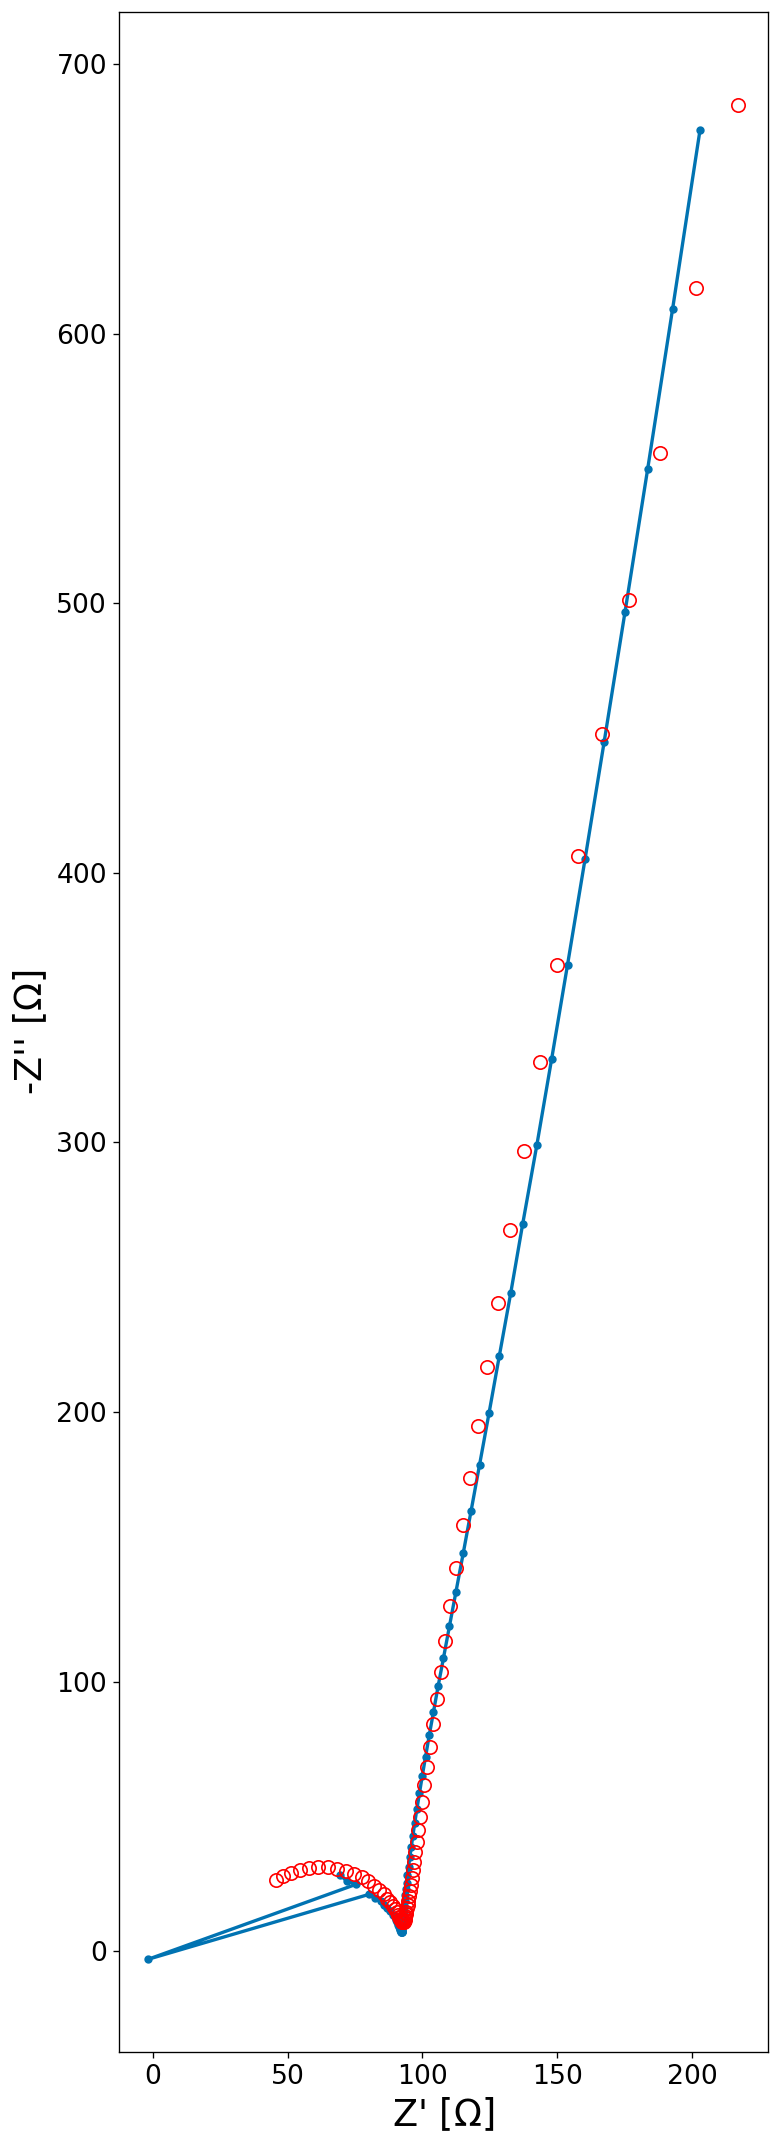

In [207]:
guesser(ex_mpt)

ERROR:  367232.4729744164
ERROR:  367232.4729744164
ERROR:  367232.4729744164
ERROR:  367232.294716229
ERROR:  367232.47289228794
ERROR:  367232.47297443065
ERROR:  367232.4729744163
ERROR:  367232.47296540707
ERROR:  367232.47297441826
ERROR:  367232.47295784444
ERROR:  27415549354974.035
ERROR:  11640220386.736345
ERROR:  10100017149071.24
ERROR:  27633024193712.777
ERROR:  1900141596196.895
ERROR:  29834917181.17654
ERROR:  279889.60676218505
ERROR:  279889.4489450618
ERROR:  279889.1266208681
ERROR:  279889.6068737669
ERROR:  279889.80231455335
ERROR:  279889.5977169444
ERROR:  279889.6045826052
ERROR:  279889.58913085604
ERROR:  255193.2776433243
ERROR:  255193.12579601872
ERROR:  255192.75816622993
ERROR:  255193.277796109
ERROR:  255193.30562876436
ERROR:  255193.2635978957
ERROR:  255193.27182418286
ERROR:  255193.2510921877
ERROR:  203325.8818833249
ERROR:  203325.7509864654
ERROR:  203325.41168497925
ERROR:  203325.88143710405
ERROR:  203325.88219270535
ERROR:  203325.8811239

ERROR:  1873.9481947072468
ERROR:  1873.9481946209457
ERROR:  1873.9481984442755
ERROR:  1827.7449412345452
ERROR:  1827.7449628550446
ERROR:  1827.7453673846182
ERROR:  1827.7976025309329
ERROR:  1827.7449385880864
ERROR:  1827.744937592174
ERROR:  1827.7449375350718
ERROR:  1827.7449412345452
ERROR:  1782.5588507633156
ERROR:  1782.5588713105437
ERROR:  1782.5592648230838
ERROR:  1782.6093594473384
ERROR:  1782.5588535326137
ERROR:  1782.5588472153165
ERROR:  1782.5588471853723
ERROR:  1782.5588507633156
ERROR:  1738.3639163764171
ERROR:  1738.3639358782066
ERROR:  1738.3643185624865
ERROR:  1738.4122926188438
ERROR:  1738.3639138445803
ERROR:  1738.3639129224546
ERROR:  1738.3639129177893
ERROR:  1738.3639163764171
ERROR:  1676.0843414632043
ERROR:  1676.0843582652656
ERROR:  1676.0847176123157
ERROR:  1676.1292242803552
ERROR:  1676.0843490839968
ERROR:  1676.0843382301828
ERROR:  1676.0843381956524
ERROR:  1676.0843414632043
ERROR:  1645.8764748600495
ERROR:  1645.8764874503286
ER

ERROR:  396.59259141370376
ERROR:  396.59259168498835
ERROR:  396.59259210213855
ERROR:  379.48001969877737
ERROR:  379.4800181804605
ERROR:  379.4800685160516
ERROR:  379.48012805077514
ERROR:  379.48002180228855
ERROR:  379.4800189338463
ERROR:  379.4800192655169
ERROR:  379.48001969877737
ERROR:  363.245902546458
ERROR:  363.24590108230444
ERROR:  363.2459491770124
ERROR:  363.2459840819741
ERROR:  363.2459006912535
ERROR:  363.24590169984225
ERROR:  363.2459020956341
ERROR:  363.245902546458
ERROR:  347.0297264883673
ERROR:  347.0297250340534
ERROR:  347.0297699142628
ERROR:  347.0297889057232
ERROR:  347.02972839640205
ERROR:  347.02972556766497
ERROR:  347.0297260297292
ERROR:  347.0297264883673
ERROR:  331.6640533223465
ERROR:  331.6640519235748
ERROR:  331.6640946821293
ERROR:  331.66409928198004
ERROR:  331.6640516100171
ERROR:  331.66405232223565
ERROR:  331.66405285460246
ERROR:  331.6640533223465
ERROR:  316.4164699623179
ERROR:  316.4164685632414
ERROR:  316.4165079951443


ERROR:  38.08754622398136
ERROR:  38.08753731786818
ERROR:  38.08754626281354
ERROR:  38.08754635318475
ERROR:  38.08754458160612
ERROR:  38.087547186263954
ERROR:  38.087546262813554
ERROR:  36.203412011008915
ERROR:  36.20341198600702
ERROR:  36.20340523737171
ERROR:  36.20341201100891
ERROR:  36.203411923420134
ERROR:  36.20341035888744
ERROR:  36.203412961649946
ERROR:  36.203412011008915
ERROR:  34.520650412327655
ERROR:  34.520650389107224
ERROR:  34.520643880145485
ERROR:  34.52065041232767
ERROR:  34.52065050124961
ERROR:  34.520648808254215
ERROR:  34.52065136706345
ERROR:  34.520650412327655
ERROR:  32.92852063658654
ERROR:  32.928520622298684
ERROR:  32.928515854897576
ERROR:  32.928520636586576
ERROR:  32.928520545861765
ERROR:  32.928519067685244
ERROR:  32.92852160712471
ERROR:  32.92852063658654
ERROR:  31.49941669802141
ERROR:  31.499416681973546
ERROR:  31.499411847447693
ERROR:  31.49941669802141
ERROR:  31.49941680110145
ERROR:  31.49941517891919
ERROR:  31.499417666

ERROR:  16.76031784087012
ERROR:  16.760317976935802
ERROR:  16.760332761901168
ERROR:  16.76031784087012
ERROR:  16.76031783263739
ERROR:  16.760317047966055
ERROR:  16.760319214471092
ERROR:  16.76031784087012
ERROR:  16.68713822997037
ERROR:  16.687138366464147
ERROR:  16.687153183787974
ERROR:  16.68713822997037
ERROR:  16.687138238483197
ERROR:  16.687137447524755
ERROR:  16.687139606512684
ERROR:  16.68713822997037
ERROR:  16.61907121072153
ERROR:  16.61907134788708
ERROR:  16.619086233857157
ERROR:  16.61907121072153
ERROR:  16.61907120272898
ERROR:  16.619070438313376
ERROR:  16.619072590507617
ERROR:  16.61907121072153
ERROR:  16.5536208089111
ERROR:  16.553620946614767
ERROR:  16.553635884548854
ERROR:  16.5536208089111
ERROR:  16.55362081700746
ERROR:  16.553620046385145
ERROR:  16.553622191866992
ERROR:  16.5536208089111
ERROR:  16.49157059476428
ERROR:  16.491570733057408
ERROR:  16.49158573176118
ERROR:  16.49157059476428
ERROR:  16.491570587281185
ERROR:  16.491569841879

ERROR:  15.039253706728813
ERROR:  15.039253303030277
ERROR:  15.03925517346012
ERROR:  15.039253706429593
ERROR:  14.992735308324958
ERROR:  14.992735457327653
ERROR:  14.992751459196644
ERROR:  14.992735308324958
ERROR:  14.99273530626269
ERROR:  14.992734925036165
ERROR:  14.992736779919305
ERROR:  14.992735308324958
ERROR:  14.973483176361363
ERROR:  14.978875297193577
ERROR:  14.97887544619451
ERROR:  14.978891437299806
ERROR:  14.978875297193577
ERROR:  14.978875298396078
ERROR:  14.978874918406424
ERROR:  14.9788767649237
ERROR:  14.978875297193577
ERROR:  14.972249669138636
ERROR:  14.972249818479074
ERROR:  14.972265851639206
ERROR:  14.972249669138636
ERROR:  14.972249668163377
ERROR:  14.972249294366456
ERROR:  14.97225113959544
ERROR:  14.972249669138636
ERROR:  14.96017412075009
ERROR:  14.960174270017578
ERROR:  14.960190290236897
ERROR:  14.96017412075009
ERROR:  14.960174121813541
ERROR:  14.960173751067439
ERROR:  14.960175591028781
ERROR:  14.96017412075009
ERROR:  14

ERROR:  14.711402959624817
ERROR:  14.711402741367559
ERROR:  14.711404445278694
ERROR:  14.711402961197646
ERROR:  14.70812396671992
ERROR:  14.708124117242262
ERROR:  14.708140215283187
ERROR:  14.70812396671992
ERROR:  14.70812396831382
ERROR:  14.708123749720237
ERROR:  14.708125450984676
ERROR:  14.70812396671992
ERROR:  14.70493107074366
ERROR:  14.704931221281138
ERROR:  14.70494732019014
ERROR:  14.70493107074366
ERROR:  14.704931069162393
ERROR:  14.704930856540317
ERROR:  14.704932555186256
ERROR:  14.70493107074366
ERROR:  14.701822329109623
ERROR:  14.701822479661462
ERROR:  14.701838579383578
ERROR:  14.701822329109623
ERROR:  14.701822330713728
ERROR:  14.701822117667312
ERROR:  14.701823813725301
ERROR:  14.701822329109623
ERROR:  14.698801072648338
ERROR:  14.69880122321482
ERROR:  14.698817323773467
ERROR:  14.698801072648338
ERROR:  14.698801071057968
ERROR:  14.698800863931766
ERROR:  14.698802557432618
ERROR:  14.698801072648338
ERROR:  14.695857708949866
ERROR:  14

No handles with labels found to put in legend.


 14.607104133303391
ERROR:  14.607102642511135
ERROR:  14.606448649231444
ERROR:  14.606448800373
ERROR:  14.60646494765028
ERROR:  14.606448649231444
ERROR:  14.606448648818791
ERROR:  14.606448569071278
ERROR:  14.606450139925458
ERROR:  14.606448649231444
ERROR:  14.606088936351918
ERROR:  14.606089087502877
ERROR:  14.606105235890592
ERROR:  14.606088936351918
ERROR:  14.606088936807755
ERROR:  14.606088857294386
ERROR:  14.606090427109415
ERROR:  14.606088936351918
ERROR:  14.60566988655211
ERROR:  14.60567003770306
ERROR:  14.605686185816412
ERROR:  14.60566988655211
ERROR:  14.60566988614325
ERROR:  14.605669808479737
ERROR:  14.605671377314609
ERROR:  14.60566988655211
ERROR:  14.605318789931781
ERROR:  14.605318941088958
ERROR:  14.605335089917507
ERROR:  14.605318789931781
ERROR:  14.605318790350625
ERROR:  14.605318712893496
ERROR:  14.605320280728781
ERROR:  14.605318789931781
ERROR:  14.604920177033673
ERROR:  14.604920328189333
ERROR:  14.604936476689899
ERROR:  14.604920

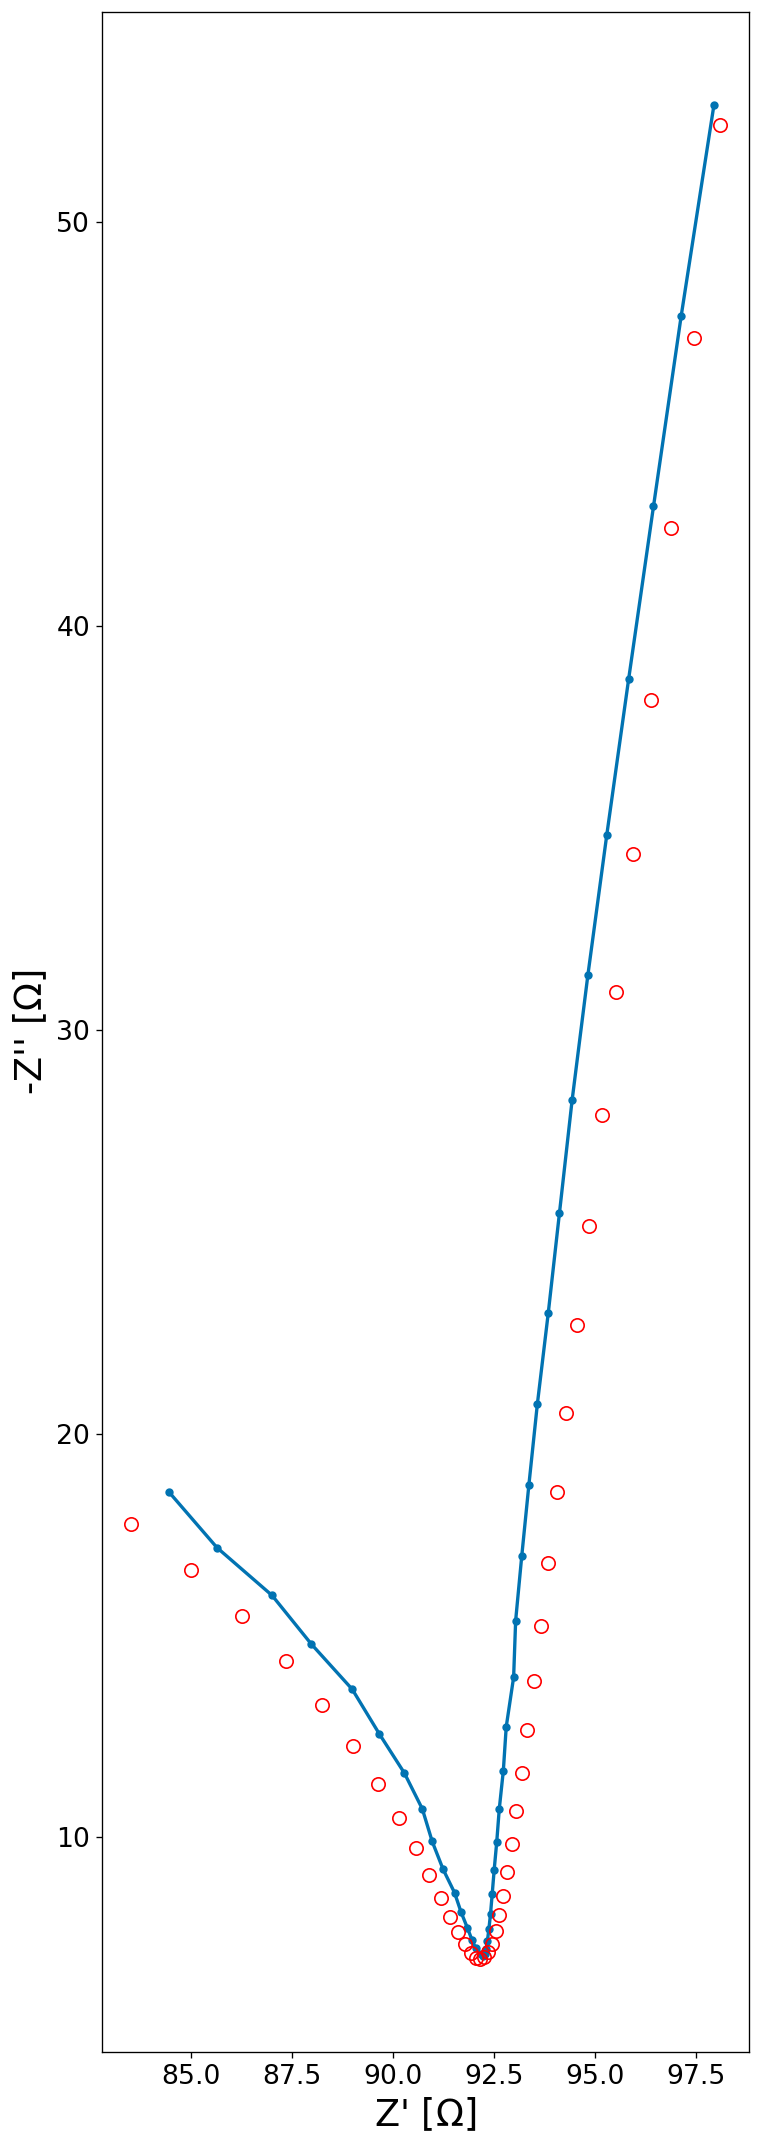

In [208]:
guesser(masked_mpt)